<a href="https://colab.research.google.com/github/alfandoo/E-Commerce/blob/main/E_Commerce_Sales_Analysis%2C_Segmentation%2C_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

*  Explore Brazilian e-commerce sales data to understand sales trends, popular products, and market dynamics.
*  Analyze customer behavior and seller performance through segmentation and performance evaluation.
*  Identify logistics and delivery patterns to find factors that influence customer satisfaction.
*  Build forecasting models to project sales and support business decision-making.


# Data Understanding

In [14]:
import pandas as pd
import numpy as np
import os

In [15]:
DATA_DIR = "/content/"

# ===========================
# Load Data
# ===========================
def load_csv(name):
    path = os.path.join(DATA_DIR, name)
    return pd.read_csv(path, low_memory=False)

orders            = load_csv("olist_orders_dataset.csv")
order_items       = load_csv("olist_order_items_dataset.csv")
payments          = load_csv("olist_order_payments_dataset.csv")
customers         = load_csv("olist_customers_dataset.csv")
products          = load_csv("olist_products_dataset.csv")
sellers           = load_csv("olist_sellers_dataset.csv")
geolocation       = load_csv("olist_geolocation_dataset.csv")
reviews           = load_csv("olist_order_reviews_dataset.csv")
product_category  = load_csv("product_category_name_translation.csv")

In [16]:
# Quick peeks
display(customers.head())
display(customers.info())

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

Customers – quick notes (from inspection)
- No missing values → all columns show full non-null counts (~99,441 rows).
- Potential duplicates:
• `customer_id` may repeat (a customer can place multiple orders).
• `customer_unique_id` should represent unique customers → unique count < total rows.
- Categorical columns: `customer_id`, `customer_unique_id`, `customer_city`, `customer_state`.
- Numeric column: `customer_zip_code_prefix`.

In [17]:
display(orders.head())
display(orders.info())
display(orders["order_status"].value_counts())

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Orders – quick notes
1) Missing values
   - `order_approved_at`: ~160 missing
   - `order_delivered_carrier_date`: ~1,783 missing
   - `order_delivered_customer_date`: ~2,965 missing
   → Expected for cancelled / undelivered orders.

2) Order status distribution
    - Dominated by **delivered** ≈ 96,478 (~97%)
    - Minor statuses such as `shipped`, `canceled`, `unavailable` total <3%
    - Rare statuses: `created` (5), `approved` (2) → possible noise.

3) Datetime format
    - All timestamp columns are strings (object); convert to datetime for duration/lag analysis.

In [18]:
display(order_items.head())
display(order_items.info())
display(order_items.nunique())

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

Order Items – quick notes
1) Uniques (`nunique`)
    - `order_id`: ~98,666 unique → many orders have multiple items (total rows ≈ 112,650).
    - `order_item_id`: max 21 → an order can include up to 21 items.
    - `product_id`: ~32,951 unique → high product variety.
    - `seller_id`: ~3,095 unique sellers.
    - `shipping_limit_date`: ~93,318 unique → wide spread of promised ship dates.
    - `price`: ~5,968 unique price points.
    - `freight_value`: ~6,999 unique freight values.

2) Relationships
    - Links **order → product → seller**.
    - Analysis ideas:
      • Best-selling products
      • Top sellers by volume/revenue
      • Average product price
      • Freight cost distribution

In [19]:
display(payments.head())
display(payments.nunique())
display(payments.info())
display(payments['payment_value'].describe())

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

 Payments – quick notes
1) Uniques
    - `order_id`: ~99,440 → aligns with unique orders in `orders`.
    - `payment_sequential`: up to 29 → some orders split into many payments.
    - `payment_type`: 5 types.
    - `payment_installments`: up to 24 installments.
    - `payment_value`: ~29,077 unique amounts.

2) `payment_value` distribution
    - Mean ≈ 154 BRL; Median = 100 BRL → **right-skewed**.
    - Some values are **0 BRL** → anomaly (voucher/test/refund).
    - Max ≈ 13,664 BRL → pricey items / outliers.


In [20]:
display(reviews.head())
display(reviews.info())
display(reviews.describe())

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

Reviews – quick notes
1) Rating distribution (`review_score`)
    - Average ≈ **4.1** → customers generally satisfied.
    - Median = **5** → skewed positive; still some 1–2 star negatives.

2) Missing text
    - `review_comment_title`: ~11% filled.
    - `review_comment_message`: ~41% filled.
    → Many reviews are star-only, limiting text analysis.

3) Datetime
    - `review_creation_date` & `review_answer_timestamp` are strings → convert to datetime for trend analysis.

In [21]:
display(products.head())
display(products.info())
display(products.describe())
products.isnull().sum()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Products – quick notes
1) Missing values
    - ~610 rows missing category/name_length/description_length/photo_qty (incomplete metadata).
    - ~2 rows missing physical attributes (weight/dimensions).

2) Numeric stats
    - Product name length: mean ≈ 48 chars; max 76.
    - Description length: mean ≈ 771 chars; max ~4000 (very long tails).
    - Photo count: median = 1; mean ≈ 2.2; up to 20 photos.
    - Weight (g):
      • Median: ~700 g
      • Mean: ~2,276 g → **skewed** by heavy outliers (up to ~40 kg)
      • Some weight = 0 → likely input errors
    - Dimensions (cm):
      • Median: 25 × 13 × 20
      • Very small values (e.g., 2 cm) → likely errors
      • Max height/width > 100 cm → large products (e.g., furniture)

In [22]:
display(product_category.head())
display(product_category.info())
display(product_category.describe())

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

Product Category Translation – quick notes
 - Lookup table mapping Portuguese → English category names.
   e.g., `beleza_saude` → `health_beauty`.
 - Typically joined to `products.product_category_name` for analysis/readability.
 - Because ~610 product categories are missing in `products`, post-join NaNs will remain
   → consider leaving as NaN or label as "unknown".

In [23]:
display(sellers.head())
display(sellers.info())
display(sellers["seller_state"].value_counts())

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

Sellers – quick notes
1) Sellers per state (`seller_state`)
    - SP (São Paulo) ≈ 1,849 sellers (~60% of total)
    - PR: ~349, MG: ~244, SC: ~190, RJ: ~171
    → Top 5 states (SP, PR, MG, SC, RJ) dominate the supply side.

2) Small states
    - Some states have only 1–2 sellers (e.g., AC, PI, MA, AM, PA)
    - Seller distribution is **uneven**, concentrated in the south/southeast.

3) Further analysis
    - Geographic distribution of sellers vs. customers → shipping implications (cost/delay).
    - Seller productivity → join with `order_items` to compute units sold per seller.
    - Revenue contribution by seller state.

In [24]:
# Aggregate by ZIP prefix to get mean coordinates and representative city/state
geolocation = (
    geolocation
    .groupby("geolocation_zip_code_prefix")
    .agg(
        geolocation_lat   = ("geolocation_lat", "mean"),
        geolocation_lng   = ("geolocation_lng", "mean"),
        geolocation_city  = ("geolocation_city", "first"),
        geolocation_state = ("geolocation_state", "first"),
    )
    .reset_index()
)

display(geolocation.info())
display(geolocation["geolocation_state"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


None

array(['SP', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'RN', 'AL', 'PB', 'CE',
       'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'AC', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'PR', 'SC', 'RS'], dtype=object)

Geolocation – quick notes
1) State coverage
    - 27 Brazilian states (SP, RJ, MG, RS, etc.) → nationally representative coverage.

2) Granularity
    - Only ZIP code prefixes (not full addresses).
    - Coordinates enable:
      • Heatmaps of customer/seller distribution
      • Distance analysis (seller ↔ customer)
      • Freight estimation (correlates with `freight_value` in `order_items`)

3) Joins
    - `geolocation_zip_code_prefix` joins to:
      • `customer_zip_code_prefix` (in **customers**)
      • `seller_zip_code_prefix` (in **sellers**)
    - Useful for geographic mapping of customers and sellers.

📊 Dataset Summary & Key Observations (Olist Brazilian E-Commerce)

---

1. Customers  
- **Rows**: ~99,441  
- **Key fields**: `customer_id`, `customer_unique_id`, `customer_zip_code_prefix`, `customer_city`, `customer_state`  
- **Notes**:  
  • `customer_id` may repeat (one customer can place multiple orders)  
  • `customer_unique_id` ≈ true unique customers  
  • No missing values  
  • Customers concentrated in **São Paulo (SP)**  

---

2. Orders  
- **Rows**: ~99,441  
- **Highlights**:  
  • ~97% are **delivered**  
  • Small shares of `canceled` / `unavailable`  
  • Timestamp columns need **datetime conversion**  
  • Missing timestamps expected for failed/canceled orders  

---

3. Order Items  
- **Rows**: ~112,650  
- **Highlights**:  
  • Up to **21 items** per order  
  • ~32,951 unique products, ~3,095 unique sellers  
  • Rich variation in `price` and `freight_value`  

---

4. Payments  
- **Rows**: ~103,886  
- **Highlights**:  
  • 5 payment types (mostly **credit_card**)  
  • Installments up to **24x**  
  • `payment_value` is **right-skewed**  
  • Some anomalies: **0 BRL payments**  

---

5. Reviews  
- **Rows**: ~99,224  
- **Highlights**:  
  • Average score ≈ **4.1** (median = 5) → mostly positive  
  • Negative tail exists (scores **1–2**)  
  • Limited text reviews (~40% messages, ~11% titles)  

---

6. Products  
- **Rows**: ~32,951  
- **Highlights**:  
  • 610 rows missing category/metadata  
  • Weight distribution skewed (0 g → 40 kg) → anomalies  
  • Dimension outliers; typical product: **700 g, 25×13×20 cm**  

---

7. Product Category Translation  
- **Rows**: 71  
- **Highlights**:  
  • Dictionary to map Portuguese → English  
  • Keep `"unknown"` label for unmapped categories  

---

8. Sellers  
- **Rows**: ~3,095  
- **Highlights**:  
  • ~60% of sellers located in **São Paulo (SP)**  
  • Long tail of states with only 1–2 sellers  
  • Strong geographic concentration  

---

9. Geolocation  
- **Rows**: ~19,015 (ZIP prefixes)  
- **Highlights**:  
  • Covers **27 Brazilian states** (nationally representative)  
  • Useful for mapping customers & sellers  
  • Enables distance-based logistics and freight analysis  

---


# 🧼 Data Cleaning

In [25]:
# -----------------------------
# Orders: convert timestamps
# -----------------------------
ORDER_TIME_COLS = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]

for col in ORDER_TIME_COLS:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col], errors="coerce")

In [26]:
# -----------------------------
# Orders: remove impossible timelines
# (keep canceled/undelivered, drop logically impossible rows)
# -----------------------------
invalid_orders = orders[
    (orders["order_approved_at"] < orders["order_purchase_timestamp"]) |
    (orders["order_delivered_carrier_date"] < orders["order_approved_at"]) |
    (orders["order_delivered_customer_date"] < orders["order_delivered_carrier_date"]) |
    (orders["order_estimated_delivery_date"] < orders["order_purchase_timestamp"])
].copy()

# Null delivered dates among invalids (just for inspection)
_ = invalid_orders["order_delivered_customer_date"].info()

# Remove invalid rows with non-null delivered timestamps
null_orders = invalid_orders[invalid_orders["order_delivered_customer_date"].isnull()]
invalid_orders = invalid_orders.drop(null_orders.index)
_ = invalid_orders.info()

<class 'pandas.core.series.Series'>
Index: 1382 entries, 15 to 99406
Series name: order_delivered_customer_date
Non-Null Count  Dtype         
--------------  -----         
1373 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1373 entries, 15 to 99406
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1373 non-null   object        
 1   customer_id                    1373 non-null   object        
 2   order_status                   1373 non-null   object        
 3   order_purchase_timestamp       1373 non-null   datetime64[ns]
 4   order_approved_at              1373 non-null   datetime64[ns]
 5   order_delivered_carrier_date   1373 non-null   datetime64[ns]
 6   order_delivered_customer_date  1373 non-null   datetime64[ns]
 7   order_estimated_delivery_date  1373 

In [13]:
# Drop those invalids from master orders
orders = orders.drop(invalid_orders.index).reset_index(drop=True)
_ = orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98068 entries, 0 to 98067
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98068 non-null  object        
 1   customer_id                    98068 non-null  object        
 2   order_status                   98068 non-null  object        
 3   order_purchase_timestamp       98068 non-null  datetime64[ns]
 4   order_approved_at              97908 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96285 non-null  datetime64[ns]
 6   order_delivered_customer_date  95103 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98068 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.0+ MB


 🧹 Data Cleaning – Orders (Notes)
 - All order timestamps converted to datetime.
 - Logically impossible shipping sequences removed.
 - Canceled/undelivered orders retained (only impossible sequences dropped).
 - Index reset after cleaning.


In [27]:
# -----------------------------
# Order Items: basic rules
# -----------------------------
print(order_items.shape[0])

# Keep strictly positive price; non-negative freight
order_items = order_items.loc[order_items["price"] > 0].copy()
order_items = order_items.loc[order_items["freight_value"] >= 0].copy()

# Rename + convert to datetime
if "shipping_limit_date" in order_items.columns:
    order_items = order_items.rename(columns={"shipping_limit_date": "shipping_deadline"})
    order_items["shipping_deadline"] = pd.to_datetime(order_items["shipping_deadline"], errors="coerce")

_ = order_items.info()

112650
<class 'pandas.core.frame.DataFrame'>
Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_id           112650 non-null  object        
 1   order_item_id      112650 non-null  int64         
 2   product_id         112650 non-null  object        
 3   seller_id          112650 non-null  object        
 4   shipping_deadline  112650 non-null  datetime64[ns]
 5   price              112650 non-null  float64       
 6   freight_value      112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.9+ MB


 🧹 Data Cleaning – Order Items (Notes)
 - Removed rows with non-positive price or negative freight.
 - Converted `shipping_deadline` to datetime (renamed from `shipping_limit_date`).

In [28]:
# -----------------------------
# Payments: normalize, remove "not_defined"
# -----------------------------
payments = payments.copy()
payments["payment_type"] = payments["payment_type"].replace("boleto", "bank_slip")

print(payments["payment_type"].value_counts())

payment_type
credit_card    76795
bank_slip      19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [29]:
# Orders with undefined payment type (typically canceled/not approved)
unknown_pay_order_ids = payments.loc[payments["payment_type"] == "not_defined", "order_id"].tolist()
unknown_orders = orders[orders["order_id"].isin(unknown_pay_order_ids)]
print(unknown_orders.shape[0])

3


In [30]:
# EDA excludes canceled/undefined payments
order_payments = payments[payments["payment_type"] != "not_defined"].copy()
orders = orders[~orders["order_id"].isin(unknown_pay_order_ids)].copy()
_ = order_payments.shape[0]

 🧹 Data Cleaning – Order Payments (Notes)
 - Standardized payment type names (`boleto` -> `bank_slip`).
 - Dropped `not_defined` payments (canceled/not approved), and corresponding orders for EDA focus.

In [31]:
# -----------------------------
# Reviews: timestamps, duplicates, suspicious links
# -----------------------------
REVIEW_TIME_COLS = ["review_creation_date", "review_answer_timestamp"]
for col in REVIEW_TIME_COLS:
    if col in reviews.columns:
        reviews[col] = pd.to_datetime(reviews[col], errors="coerce")

print(reviews["review_id"].isnull().sum())
_ = reviews.info()
_ = reviews[reviews["order_id"].duplicated()]  # quick check

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [32]:
# Check unusual multi-linking by review_id
_ = (
    reviews.groupby("review_id")
    .agg(order_id=("order_id", "nunique"), review_score=("review_score", "nunique"),
         review_creation_date=("review_creation_date", "nunique"))
    .sort_values(by="order_id", ascending=False)
)

# Example suspicious case (kept from your original logic)
fake_reviews = reviews[reviews["review_id"] == "ddc52555ca27b0fe67d5255147682d2d"]
fake_order_ids = fake_reviews["order_id"]
fake_customers = orders.loc[orders["order_id"].isin(fake_order_ids), "customer_id"]
_ = customers[customers["customer_id"].isin(fake_customers)]

# Drop duplicated review_ids (keep first)
before = reviews.shape[0]
order_reviews = reviews.drop_duplicates(subset=["review_id"], keep="first").copy()
after = order_reviews.shape[0]

print(f"Reviews before cleaning: {before}")
print(f"Removed {before - after} duplicate/fake reviews")
print(f"Remaining: {after}")

Reviews before cleaning: 99224
Removed 814 duplicate/fake reviews
Remaining: 98410


 🧹 Data Cleaning – Order Reviews (Notes)
 - Converted review timestamps to datetime.
 - Checked for missing/duplicate review IDs.
 - Flagged potential many-to-many anomalies; dropped duplicate `review_id`s to prevent bias.

In [33]:
# -----------------------------
# Products: fix typos, handle missing/invalid
# -----------------------------
products = products.copy()

# Fix column typos
products = products.rename(
    columns={
        "product_name_lenght": "product_name_length",
        "product_description_lenght": "product_description_length",
    }
)

# Drop rows with missing category (as per original approach)
missing_ratio = products["product_category_name"].isna().mean() * 100
print(f"Missing categories: {missing_ratio:.2f}%")
products = products.dropna(subset=["product_category_name"]).copy()
_ = products.info()

Missing categories: 1.85%
<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [34]:
# Median imputation for physical attributes
phys_cols = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
for col in phys_cols:
    if col in products.columns:
        products[col] = products[col].fillna(products[col].median())

# Remove non-positive physical attributes
products = products.loc[products["product_weight_g"] > 0].copy()
products = products.loc[
    (products["product_length_cm"] > 0) &
    (products["product_height_cm"] > 0) &
    (products["product_width_cm"]  > 0)
].copy()

_ = products.info()
display(products.nunique())

product_names_pt = products["product_category_name"].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 32337 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32337 non-null  object 
 1   product_category_name       32337 non-null  object 
 2   product_name_length         32337 non-null  float64
 3   product_description_length  32337 non-null  float64
 4   product_photos_qty          32337 non-null  float64
 5   product_weight_g            32337 non-null  float64
 6   product_length_cm           32337 non-null  float64
 7   product_height_cm           32337 non-null  float64
 8   product_width_cm            32337 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


product_id                    32337
product_category_name            73
product_name_length              66
product_description_length     2960
product_photos_qty               19
product_weight_g               2201
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

 🧹 Data Cleaning – Products (Notes)
 - Fixed misspelled column names.
 - Removed rows with missing product category.
 - Median-filled weight/dimensions; removed non-positive values.
 - Saved unique PT category names for later mapping.

In [35]:
# -----------------------------
# Category translation: ensure coverage
# -----------------------------
_ = product_category.info()
product_names_eng = product_category["product_category_name"].unique()

# Find categories in PT not present in the translation table
missing_names = set(product_names_pt) - set(product_category["product_category_name"])
print("Missing categories:", missing_names)

missing_names_df = products[products["product_category_name"].isin(missing_names)]
display(missing_names_df.head())

# Manually add missing translations (kept from your original logic)
new_rows = pd.DataFrame({
    "product_category_name": ["portateis_cozinha_e_preparadores_de_alimentos", "pc_gamer"],
    "product_category_name_english": ["portable_kitchen_and_food_preparers", "pc_gamer"],
})
product_category = pd.concat([product_category, new_rows], ignore_index=True)

# Ensure uniqueness after appending
product_category = product_category.drop_duplicates(subset=["product_category_name"]).reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Missing categories: {'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}


product_id  \
1628  0105b5323d24fc655f73052694dbbb3a   
5821  6fd83eb3e0799b775e4f946bd66657c0   
7325  5d923ead886c44b86845f69e50520c3e   
7478  6727051471a0fc4a0e7737b57bff2549   
8819  bed164d9d628cf0593003389c535c6e0   

                              product_category_name  product_name_length  \
1628                                       pc_gamer                 59.0   
5821  portateis_cozinha_e_preparadores_de_alimentos                 52.0   
7325  portateis_cozinha_e_preparadores_de_alimentos                 58.0   
7478                                       pc_gamer                 60.0   
8819  portateis_cozinha_e_preparadores_de_alimentos                 54.0   

      product_description_length  product_photos_qty  product_weight_g  \
1628                       621.0                 4.0            2839.0   
5821                       280.0                 1.0            1200.0   
7325                       284.0                 1.0            1200.0   
7478                      1532.0                 3.0             650.0   
8819                       382.0                 2.0             850.0   

      product_length_cm  product_height_cm  product_width_cm  
1628               19.0               16.0              18.0  
5821               25.0               33.0              25.0  
7325               25.0               33.0              25.0  
7478               16.0               22.0              20.0  
8819               30.0               21.0              22.0

 🧹 Data Cleaning – Product Category Translation (Notes)
 - Compared PT categories against the EN translation table.
 - Added missing translations manually.
 - Ensured no duplicate category keys remain.

In [36]:
# -----------------------------
# Sellers: normalize city names
# -----------------------------
import unicodedata

def strip_accents(text: str) -> str:
    s = unicodedata.normalize("NFKD", str(text))
    return "".join(c for c in s if not unicodedata.combining(c))

_ = sellers.info()
print(sellers["seller_id"].isnull().sum())
print(sellers["seller_id"].duplicated().sum())
_ = sellers[sellers["seller_id"].duplicated(keep=False)]

# Normalize city names
sellers = sellers.copy()
sellers["seller_city"] = (
    sellers["seller_city"]
    .astype(str)
    .str.lower()
    .str.strip()
    .map(strip_accents)
)

print(sellers["seller_city"].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
0
0
2486


In [37]:
# Inspect singleton cities (optional)
single_entry_cities = sellers["seller_city"].value_counts()
single_entry_cities = single_entry_cities[single_entry_cities == 1]
_ = sorted(single_entry_cities.index)

# Fix common typos/variants
city_rename = {
    "rio de janeiro": "rio de janeiro",
    "sao miguel": "sao miguel d'oeste",
    "sao pau": "sao paulo",
}
for wrong, correct in city_rename.items():
    mask = sellers["seller_city"].str.contains(wrong, case=False, na=False)
    sellers.loc[mask, "seller_city"] = correct

print(sellers["seller_state"].value_counts())

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


 🧹 Data Cleaning – Sellers (Notes)
 - Verified `seller_id` nulls/duplicates (none expected).
 - Normalized city names: lowercased, trimmed, accent-stripped.
 - Fixed common typos via manual mapping.
 - Checked `seller_state` distribution for anomalies.

# 🔧 Wrangle the Data

With the datasets cleaned and standardized, we now:
 - Reshape if needed (pivot/melt),
 - Merge the core tables (orders, items, customers, sellers, products, etc.),
 - Filter/aggregate/group to build features and answer business questions.
 This ensures a unified, analysis-ready table for deeper EDA and modeling.

In [38]:
# ---------------------------
# 1) Customers + Geolocation
# ---------------------------
customers_geo = (
    customers.merge(
        geolocation,
        how="left",
        left_on="customer_zip_code_prefix",
        right_on="geolocation_zip_code_prefix",
    )
    .sort_values(by="customer_zip_code_prefix")
    .ffill()  # forward-fill gaps after sorting
)
print("customers_geo shape:", customers_geo.shape)
display(customers_geo.head())

customers_geo shape: (99441, 10)


customer_id                customer_unique_id  \
23914  7ae2a9337aa4bc799723511faa1d6830  0c1a20644f0dc126c3eaff8dbc1bd12c   
23990  ee9b73e88afb4904ee2322cfc89cf638  095e7c124c5c1ccb1eb9f731152eae6a   
11747  a09edf8c1e842e94805a206b3d73eed5  968f6d2f674977d88a4b445a5117ccd8   
81634  15d7dbcd027b5b24866db33e2b819021  ddab5650ba76e2fa2d7e25ed3343bd92   
92799  6e4eb34e7f4d526a82726712aa17c02b  ded4351942c7fc292b88e5b090af2b46   

       customer_zip_code_prefix customer_city customer_state  \
23914                      1003     sao paulo             SP   
23990                      1004     sao paulo             SP   
11747                      1004     sao paulo             SP   
81634                      1005     sao paulo             SP   
92799                      1005     sao paulo             SP   

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
23914                       1003.0       -23.548994       -46.635731   
23990                       1004.0       -23.549799       -46.634757   
11747                       1004.0       -23.549799       -46.634757   
81634                       1005.0       -23.549456       -46.636733   
92799                       1005.0       -23.549456       -46.636733   

      geolocation_city geolocation_state  
23914        sao paulo                SP  
23990        sao paulo                SP  
11747        sao paulo                SP  
81634        sao paulo                SP  
92799        sao paulo                SP

In [39]:
# ---------------------------
# 2) Orders + Items + Payments + Reviews + Products + Categories + Sellers
# ---------------------------
orders_all = (
    orders
      .merge(order_items,       how="left", on="order_id", validate="1:m")
      .merge(order_payments,    how="left", on="order_id")
      .merge(order_reviews,     how="left", on="order_id")
      .merge(products,          how="left", on="product_id")
      .merge(product_category,  how="left", on="product_category_name")
      .merge(sellers,           how="left", on="seller_id")
)
print("orders_all shape:", orders_all.shape)
display(orders_all.head())

orders_all shape: (118760, 36)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18            1.0   
1                    2017-10-18            1.0   
2                    2017-10-18            1.0   
3                    2018-08-13            1.0   
4                    2018-09-04            1.0   

                         product_id  ... product_description_length  \
0  87285b34884572647811a353c7ac498a  ...                      268.0   
1  87285b34884572647811a353c7ac498a  ...                      268.0   
2  87285b34884572647811a353c7ac498a  ...                      268.0   
3  595fac2a385ac33a80bd5114aec74eb8  ...                      178.0   
4  aa4383b373c6aca5d8797843e5594415  ...                      232.0   

  product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                4.0             500.0               19.0                8.0   
1                4.0             500.0               19.0                8.0   
2                4.0             500.0               19.0                8.0   
3                1.0             400.0               19.0               13.0   
4                1.0             420.0               24.0               19.0   

  product_width_cm  product_category_name_english  seller_zip_code_prefix  \
0             13.0                     housewares                  9350.0   
1             13.0                     housewares                  9350.0   
2             13.0                     housewares                  9350.0   
3             19.0                      perfumery                 31570.0   
4             21.0                           auto                 14840.0   

      seller_city  seller_state  
0            maua            SP  
1            maua            SP  
2            maua            SP  
3  belo horizonte            SP  
4         guariba            SP  

[5 rows x 36 columns]

In [42]:
# ---------------------------
# 3) Final unified dataset
# ---------------------------
commerce = customers.merge(orders_all, how="inner", on="customer_id")
print("\nFinal commerce shape:", commerce.shape)
display(commerce.head())
display(commerce.info())


Final commerce shape: (118760, 40)


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...   
1 2018-01-12 20:58:32          2018-01-15 17:14:59  ...   
2 2018-05-20 16:19:10          2018-06-11 14:31:00  ...   
3 2018-03-13 17:29:19          2018-03-27 23:22:42  ...   
4 2018-07-29 10:10:09          2018-07-30 15:16:00  ...   

  product_description_length product_photos_qty  product_weight_g  \
0                     1141.0                1.0            8683.0   
1                     1002.0                3.0           10150.0   
2                      955.0                1.0            8267.0   
3                     1066.0                1.0           12160.0   
4                      407.0                1.0            5200.0   

  product_length_cm product_height_cm product_width_cm  \
0              54.0              64.0             31.0   
1              89.0              15.0             40.0   
2              52.0              52.0             17.0   
3              56.0              51.0             28.0   
4              45.0              15.0             35.0   

   product_category_name_english  seller_zip_code_prefix      seller_city  \
0               office_furniture                  8577.0  itaquaquecetuba   
1                     housewares                 88303.0           itajai   
2               office_furniture                  8577.0  itaquaquecetuba   
3               office_furniture                  8577.0  itaquaquecetuba   
4                   home_confort                 14940.0         ibitinga   

  seller_state  
0           SP  
1           SC  
2           SP  
3           SP  
4           SP  

[5 rows x 40 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118760 entries, 0 to 118759
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118760 non-null  object        
 1   customer_unique_id             118760 non-null  object        
 2   customer_zip_code_prefix       118760 non-null  int64         
 3   customer_city                  118760 non-null  object        
 4   customer_state                 118760 non-null  object        
 5   order_id                       118760 non-null  object        
 6   order_status                   118760 non-null  object        
 7   order_purchase_timestamp       118760 non-null  datetime64[ns]
 8   order_approved_at              118587 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116688 non-null  datetime64[ns]
 10  order_delivered_customer_date  115360 non-null  datetime64[ns]
 11  

None

In [41]:
# ---------------------------
# 4) Quality & consistency checks
# ---------------------------

# Duplicates
dup_count = commerce.duplicated().sum()
print("\nDuplicate rows:", dup_count)

# Nulls (top offenders)
null_summary = commerce.isnull().sum().sort_values(ascending=False)
print("\nColumns with missing values (nonzero only):")
print(null_summary[null_summary > 0].head(20))

# Row consistency
print("\nOrders before merge:", orders.shape[0])
print("Orders after merge (non-null status):", commerce["order_status"].notna().sum())

print("Unique customers before merge:", customers["customer_unique_id"].nunique())
print("Unique customers after merge:", commerce["customer_unique_id"].nunique())

# Sanity checks on key fields
print("\nUnique sellers:", commerce["seller_id"].nunique())
print("Unique product categories (EN):", commerce["product_category_name_english"].nunique())
print("Unique payment types:", commerce["payment_type"].nunique())


Duplicate rows: 0

Columns with missing values (nonzero only):
review_comment_title             104831
review_comment_message            68900
order_delivered_customer_date      3400
product_description_length         2542
product_length_cm                  2542
product_photos_qty                 2542
product_height_cm                  2542
product_category_name              2542
product_weight_g                   2542
product_name_length                2542
product_width_cm                   2542
product_category_name_english      2542
order_delivered_carrier_date       2072
review_answer_timestamp            1598
review_score                       1598
review_id                          1598
review_creation_date               1598
product_id                          827
shipping_deadline                   827
seller_id                           827
dtype: int64

Orders before merge: 99438
Orders after merge (non-null status): 118760
Unique customers before merge: 96096
Unique custom

In [43]:
# ---------------------------
# 5) Descriptive statistics
# ---------------------------
num_desc = commerce.describe(include=[np.number]).T
display(num_desc)

# ---------------------------
# 6) Categorical distributions (top 5)
# ---------------------------
for col in ["order_status", "payment_type", "product_category_name_english"]:
    print(f"\nTop values for {col}:")
    print(commerce[col].value_counts().head())

count          mean           std      min  \
customer_zip_code_prefix    118760.0  35025.825690  29818.792021  1003.00   
order_item_id               117933.0      1.196459      0.699725     1.00   
price                       117933.0    120.739703    184.316122     0.85   
freight_value               117933.0     20.038349     15.849707     0.00   
payment_sequential          118757.0      1.094731      0.730468     1.00   
payment_installments        118757.0      2.940189      2.776770     0.00   
payment_value               118757.0    172.838316    268.105522     0.00   
review_score                117162.0      4.017924      1.398795     1.00   
product_name_length         116218.0     48.767411     10.035519     5.00   
product_description_length  116218.0    786.379382    652.652204     4.00   
product_photos_qty          116218.0      2.206526      1.718625     1.00   
product_weight_g            116218.0   2117.032921   3784.888349     2.00   
product_length_cm           116218.0     30.315192     16.222772     7.00   
product_height_cm           116218.0     16.652033     13.476924     2.00   
product_width_cm            116218.0     23.113098     11.755220     6.00   
seller_zip_code_prefix      117933.0  24441.447186  27571.579951  1001.00   

                                 25%       50%       75%       max  
customer_zip_code_prefix    11250.00  24240.00  58432.25  99990.00  
order_item_id                   1.00      1.00      1.00     21.00  
price                          39.90     74.90    134.90   6735.00  
freight_value                  13.08     16.29     21.19    409.68  
payment_sequential              1.00      1.00      1.00     29.00  
payment_installments            1.00      2.00      4.00     24.00  
payment_value                  60.85    108.19    189.22  13664.08  
review_score                    4.00      5.00      5.00      5.00  
product_name_length            42.00     52.00     57.00     76.00  
product_description_length    346.00    601.00    985.00   3992.00  
product_photos_qty              1.00      1.00      3.00     20.00  
product_weight_g              300.00    700.00   1800.00  40425.00  
product_length_cm              18.00     25.00     38.00    105.00  
product_height_cm               8.00     13.00     20.00    105.00  
product_width_cm               15.00     20.00     30.00    118.00  
seller_zip_code_prefix       6429.00  13660.00  27972.00  99730.00


Top values for order_status:
order_status
delivered      115361
shipped          1250
canceled          742
unavailable       650
processing        376
Name: count, dtype: int64

Top values for payment_type:
payment_type
credit_card    87517
bank_slip      23098
voucher         6440
debit_card      1702
Name: count, dtype: int64

Top values for product_category_name_english:
product_category_name_english
bed_bath_table           11910
health_beauty             9991
sports_leisure            8971
furniture_decor           8774
computers_accessories     8110
Name: count, dtype: int64


# 📊 Exploratory Data Analysis

📦 Orders & Sales Analysis

1. Most Common Order Statuses
- Pertanyaan: *What are the most common order statuses?*  
- Visualisasi: **Bar Chart** distribusi `order_status`  
- Insight: Mayoritas order → *delivered*, sedangkan status minor (canceled, unavailable, dsb.) relatif kecil  

---

2. Sales Trend Over Time
- Pertanyaan: *How do sales trend over time?*  
- Visualisasi: **Time Series Chart** total penjualan per hari/bulan (`order_purchase_timestamp`)  
- Insight: Bisa terlihat pola pertumbuhan, penurunan, atau kejadian musiman  

---

3. Seasonality (Days/Months with Highest Sales)
- Pertanyaan: *Which days of the week or months have the highest sales?*  
- Visualisasi: **Bar Chart / Heatmap**  
  • Penjualan per hari dalam seminggu  
  • Penjualan per bulan  
- Insight: Identifikasi efek musiman atau promosi (misalnya akhir tahun, Black Friday, dsb.)  


In [ ]:
commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117110 entries, 0 to 117109
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117110 non-null  object        
 1   customer_unique_id             117110 non-null  object        
 2   customer_zip_code_prefix       117110 non-null  int64         
 3   customer_city                  117110 non-null  object        
 4   customer_state                 117110 non-null  object        
 5   order_id                       117110 non-null  object        
 6   order_status                   117110 non-null  object        
 7   order_purchase_timestamp       117110 non-null  datetime64[ns]
 8   order_approved_at              116937 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115038 non-null  datetime64[ns]
 10  order_delivered_customer_date  113710 non-null  datetime64[ns]
 11  

In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

sns.set(style="whitegrid")


import warnings

warnings.filterwarnings("ignore")

In [ ]:
order_status_counts = commerce.groupby("order_status")["order_status"].count().reset_index(name="count")

commerce["order_purchase_day"] = commerce["order_purchase_timestamp"].dt.to_period("D").dt.to_timestamp()
commerce["order_purchase_month"] = commerce["order_purchase_timestamp"].dt.to_period("M").dt.to_timestamp()

orders_daily = commerce.groupby("order_purchase_day").size().reset_index(name="count")
orders_monthly = commerce.groupby("order_purchase_month").size().reset_index(name="count")

orders_daily.info()
orders_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_purchase_day  634 non-null    datetime64[ns]
 1   count               634 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_purchase_month  25 non-null     datetime64[ns]
 1   count                 25 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 532.0 bytes


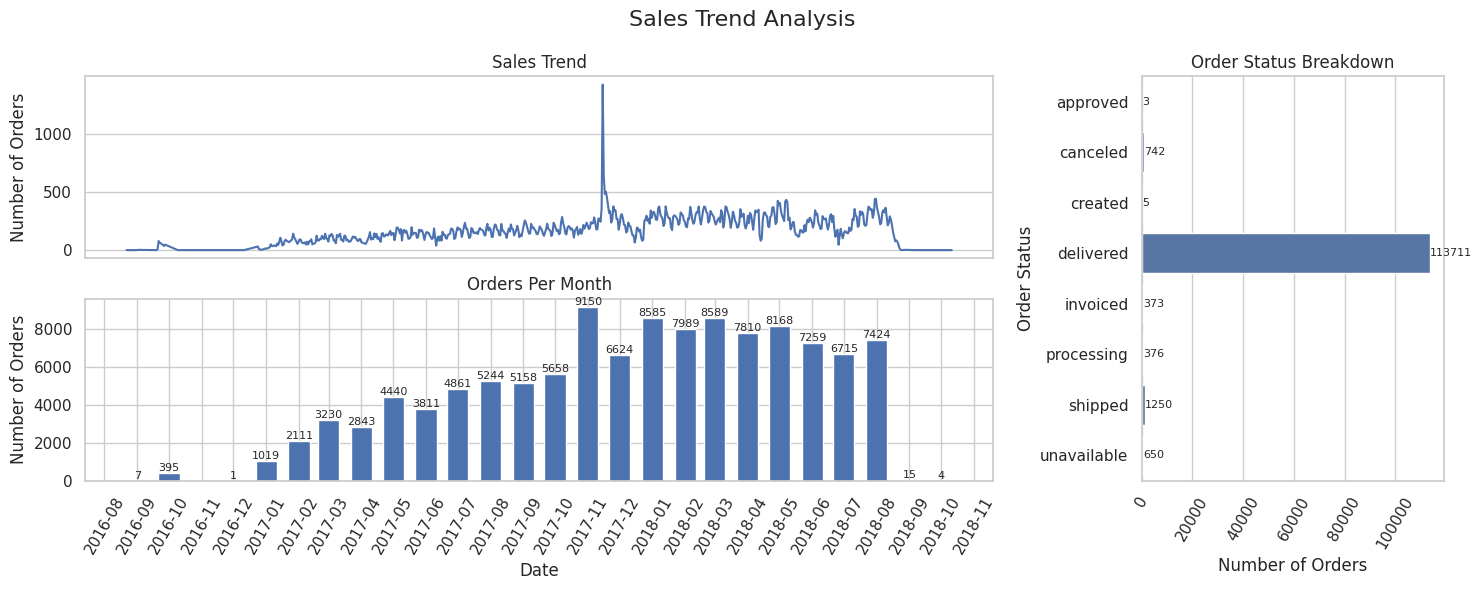

In [ ]:
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1])
axes = []
axes.append(fig.add_subplot(gs[0, 0]))
axes.append(fig.add_subplot(gs[1, 0]))
axes.append(fig.add_subplot(gs[:, 1]))

# Daily Orders Lineplot
sns.lineplot(data=orders_daily, x="order_purchase_day", y="count", ax=axes[0])
# axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[0].xaxis.set_visible(False)
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_title("Sales Trend")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Number of Orders")

# Monthly orders barplot
axes[1].bar(orders_monthly["order_purchase_month"], orders_monthly["count"], width=20)
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].tick_params(axis="x", rotation=60)
for bar in axes[1].containers[0]:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',
                 ha='center', va='bottom', fontsize=8)
axes[1].set_title("Orders Per Month")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Number of Orders")


# Order status horizontal barplot
sns.barplot(data=order_status_counts, y="order_status", x="count", ax=axes[2])
axes[2].tick_params(axis="x", rotation=60)
for bar in axes[2].containers[0]:
    axes[2].text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2,  # Adjust x and y positions for labels
            str(int(bar.get_width())),
            ha='left', va='center', fontsize=8)
axes[2].set_title("Order Status Breakdown")
axes[2].set_xlabel("Number of Orders")
axes[2].set_ylabel("Order Status")


fig.suptitle("Sales Trend Analysis", fontsize=16)
plt.tight_layout()
plt.show()

📊 Sales Trend Analysis

Kami menganalisis penjualan dari **Agustus 2016 – November 2018** pada berbagai skala waktu dan status pesanan.

---

📅 Daily & Monthly Trends
- Penjualan meningkat stabil sepanjang **2017**, dengan puncak pada **November 2017** (kemungkinan efek *holiday season* / **Black Friday**)  
- Setelah pertengahan 2018 terlihat penurunan, namun kemungkinan besar karena data yang **belum lengkap**  
- **Hari kerja** menunjukkan volume penjualan lebih tinggi dibandingkan akhir pekan  

---

📦 Order Status Breakdown
- Sebagian besar pesanan (~**99.9%**) berhasil **delivered**  
- Hanya sekitar **750 pesanan dibatalkan** → menunjukkan **reliabilitas fulfillment tinggi**  
- Sebagian kecil masih berstatus *shipped* atau *in transit*  

---

🗝️ Overall Insights
- Platform menunjukkan **pertumbuhan kuat** dengan puncak musiman (liburan / promosi)  
- Tingkat pembatalan sangat rendah → indikasi operasi e-commerce yang **sehat & efisien**  


In [ ]:
commerce["order_day_name"] = commerce["order_purchase_timestamp"].dt.day_name()
commerce["order_month"] = commerce["order_purchase_timestamp"].dt.month_name()
commerce["order_day_of_week"] = commerce["order_purchase_timestamp"].dt.dayofweek

weekday_counts = commerce["order_day_name"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index(name="count")

month_counts = commerce["order_month"].value_counts().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]).reset_index(name="count")

weekday_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_day_name  7 non-null      object
 1   count           7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


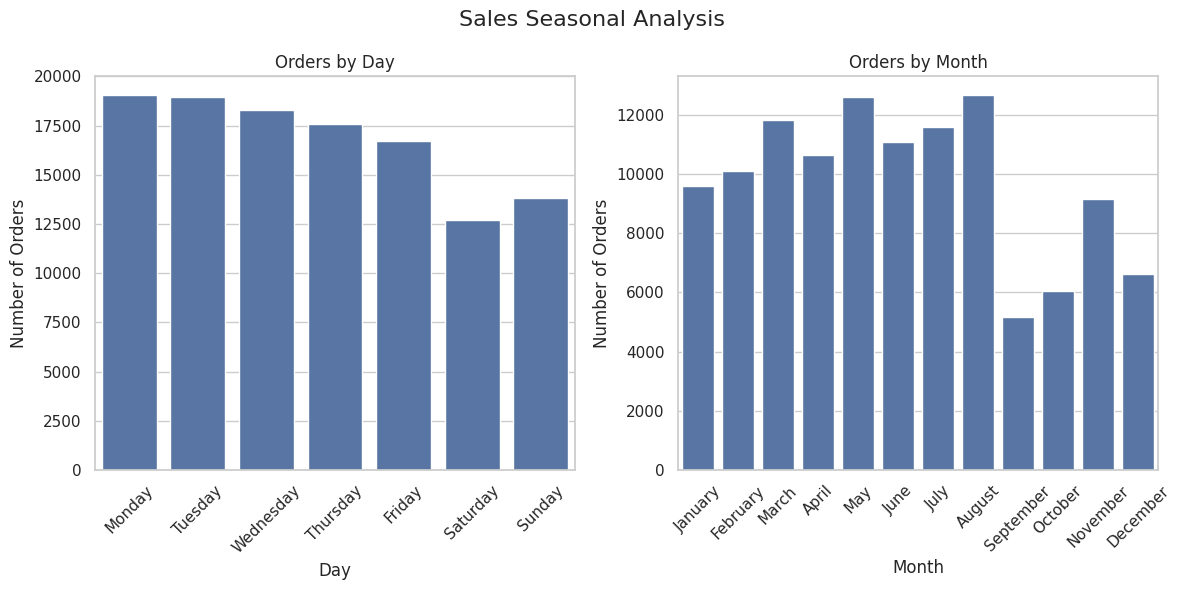

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=weekday_counts, x="order_day_name", y="count", ax=axes[0])
axes[0].set_title("Orders by Day")
axes[0].set_xlabel("Day")
axes[0].set_ylabel("Number of Orders")
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(data=month_counts, x="order_month", y="count", ax=axes[1])
axes[1].set_title("Orders by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Orders")
axes[1].tick_params(axis="x", rotation=45)

fig.suptitle("Sales Seasonal Analysis", fontsize=16)
plt.tight_layout()
plt.show()

📆 Seasonal Sales Analysis

Untuk memahami pola belanja pelanggan, analisis dilakukan berdasarkan **hari dalam minggu** dan **bulan dalam tahun**.

---

📅 Orders by Day of Week
- Mayoritas pembelian terjadi saat **hari kerja**  
- Ada penurunan signifikan di **akhir pekan**  
- Hal ini menunjukkan pelanggan cenderung lebih aktif belanja online pada hari kerja dibanding akhir pekan  

---

📅 Orders by Month
- Tren order meningkat dari **Januari hingga Juli**  
- Setelah itu terlihat penurunan, tetapi kemungkinan besar disebabkan oleh **data yang tidak lengkap** di akhir periode (truncated)  
- Hal ini perlu diverifikasi ulang untuk memastikan validitas tren  

---

📊 Key Takeaways
- Pola belanja **weekday-driven** cukup kuat  
- Indikasi adanya **isu kualitas data** di bulan-bulan terakhir → harus ditinjau kembali sebelum menarik kesimpulan final  


💳 Payments Analysis

---

1. Most Popular Payment Types
- Pertanyaan: *Which payment types are most popular?*  
- Visualisasi: **Pie Chart / Bar Chart** distribusi `payment_type`  
- Insight: Mayoritas pembayaran dilakukan via **credit_card**, diikuti metode lain seperti *boleto*, *voucher*, dll.  

---

2. Installments vs Payment Value
- Pertanyaan: *Do customers who pay in installments spend more?*  
- Analisis: Bandingkan **`payment_value`** berdasarkan jumlah **`payment_installments`**  
- Insight:  
  • Order dengan cicilan cenderung punya **nilai pembayaran lebih tinggi** dibanding sekali bayar  
  • Cicilan panjang (misalnya >6x) biasanya terkait produk bernilai besar  


In [ ]:
payment_type_count = commerce.groupby("payment_type").agg(
    count=("price","count"),
    price=("price", "mean")
).reset_index()

payment_type_price = commerce.groupby("payment_installments").agg(
    count=("price","count"),
    price=("price", "mean")
).reset_index()

payment_type_count.head()
payment_type_price.head()

payment_installments  count       price
0                   0.0      2   41.690000
1                   1.0  57941   91.227887
2                   2.0  13547   97.845166
3                   3.0  11609  108.295903
4                   4.0   7875  126.045163

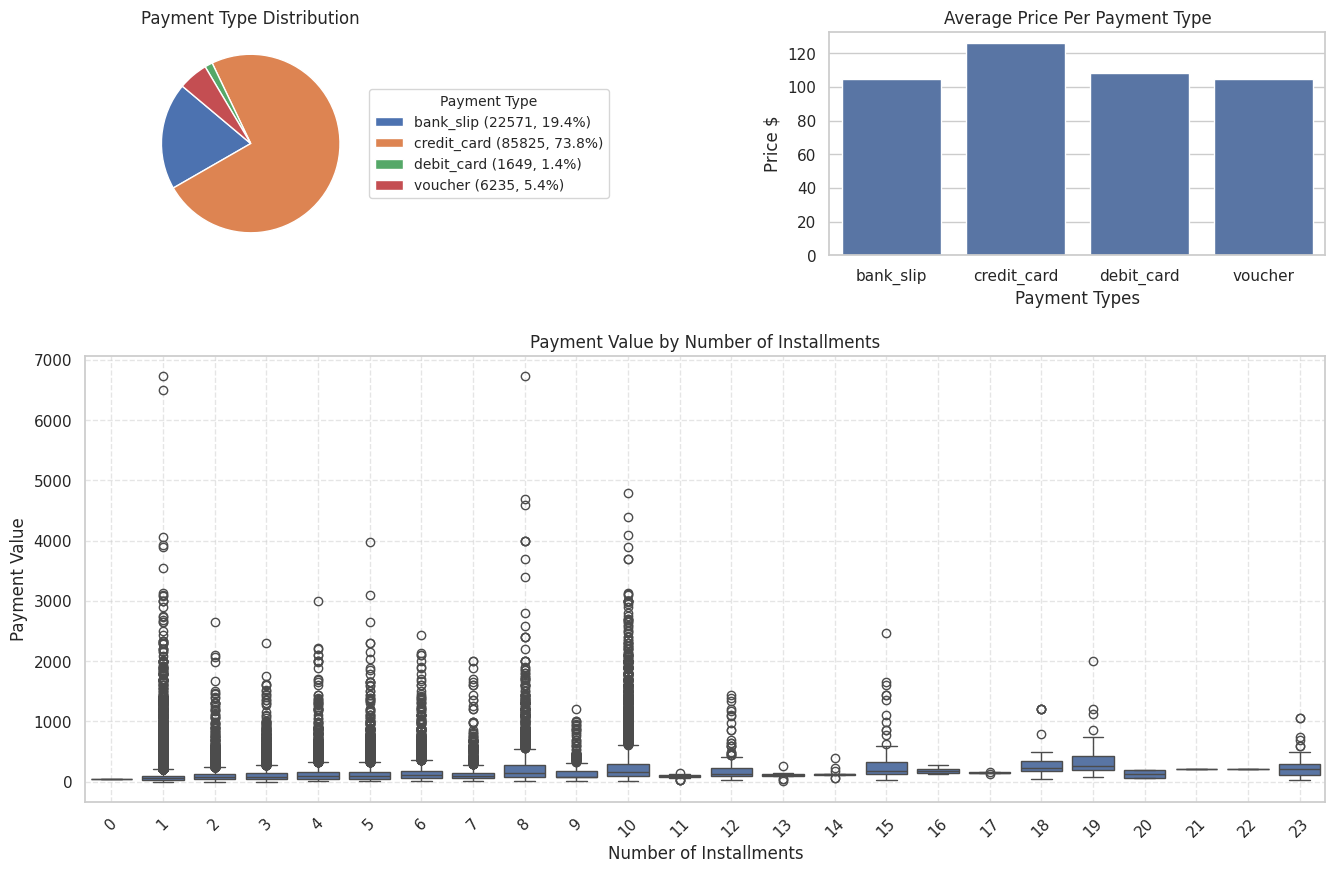

In [ ]:
total = payment_type_count["count"].sum()
labels = [
    f"{ptype} ({count}, {count / total:.1%})"
    for ptype, count in zip(payment_type_count["payment_type"], payment_type_count["count"])
]

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 3], height_ratios=[1,2], wspace=1, hspace=0.3)
axes = []
axes.append(fig.add_subplot(gs[0, 0]))
axes.append(fig.add_subplot(gs[0, 1]))
axes.append(fig.add_subplot(gs[1, :]))

wedges, texts = axes[0].pie(payment_type_count["count"], startangle=140, wedgeprops={'edgecolor': 'white'})
axes[0].legend(wedges, labels, title="Payment Type", loc="center left", bbox_to_anchor=(1, 0.5),
              fontsize='small', title_fontsize='small')
axes[0].set_title("Payment Type Distribution")

sns.barplot(data=payment_type_count, x="payment_type", y="price", ax=axes[1])
axes[1].set_title("Average Price Per Payment Type")
axes[1].set_xlabel("Payment Types")
axes[1].set_ylabel("Price $")

sns.boxplot(data=commerce, x='payment_installments', y='price',ax=axes[2])
axes[2].set_title('Payment Value by Number of Installments')
axes[2].set_xlabel('Number of Installments')
axes[2].set_ylabel('Payment Value')
axes[2].tick_params(axis="x", rotation=45)
axes[2].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


💳 Payments Analysis Insights

---

📌 Payment Method Preferences
- Mayoritas pelanggan menggunakan **credit card (73.8%)**  
- Diikuti oleh:  
  • **Bank slips (boleto)**: 19.4%  
  • **Vouchers**: 5.4%  
  • **Debit cards**: 1.4%  
- Rata-rata transaksi dengan **credit card** ~25% lebih tinggi dibanding metode lain → menunjukkan pembelian bernilai besar lebih sering dilakukan dengan kartu kredit  

---

📌 Installment Behavior
- Semakin tinggi jumlah **installments**, semakin tinggi pula **median payment value**  
- Artinya, pembelian dengan nilai besar cenderung dibayar dengan **cicilan**  
- Pada cicilan rendah (1–2x), terdapat banyak **outlier** → sebagian besar berasal dari volume besar transaksi kecil sekali bayar  


 👥 Customer Analysis

---

1. Customer Distribution
- **Pertanyaan**: *Which states or cities have the most customers?*  
- **Visualisasi**:  
  • Choropleth map → distribusi pelanggan per state (misalnya berdasarkan `customer_state`)  
  • Bar chart → top cities dengan jumlah pelanggan terbanyak  
- **Insight**: Pelanggan terkonsentrasi di **São Paulo (SP)** dan beberapa kota besar lain, sedangkan area minor hanya memiliki sedikit pelanggan  

---

2. Location Impact on Delivery & Satisfaction
- **Pertanyaan**: *Do customer locations affect delivery time or review scores?*  
- **Analisis**:  
  • Bandingkan **delivery time / delays** berdasarkan region/state  
  • Bandingkan **review_score** rata-rata per region  
- **Insight**:  
  • Lokasi jauh dari pusat seller (misalnya utara/utara timur Brazil) → cenderung memiliki **waktu pengiriman lebih lama**  
  • Hal ini dapat berdampak pada **review_score lebih rendah** di beberapa wilayah  


In [ ]:
state_customers = commerce.groupby('customer_state').agg(
    count=("customer_state", "count")
).reset_index()
state_customers.head()

customer_state  count
0             AC     92
1             AL    459
2             AM    172
3             AP     84
4             BA   4026

In [ ]:
# Load GeoJSON of Brazilian states
gdf = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")

# Map full state names to acronyms
state_abbrev = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}

gdf['uf'] = gdf['name'].map(state_abbrev)

geo_state_customers = gdf.merge(state_customers, left_on='uf', right_on="customer_state")

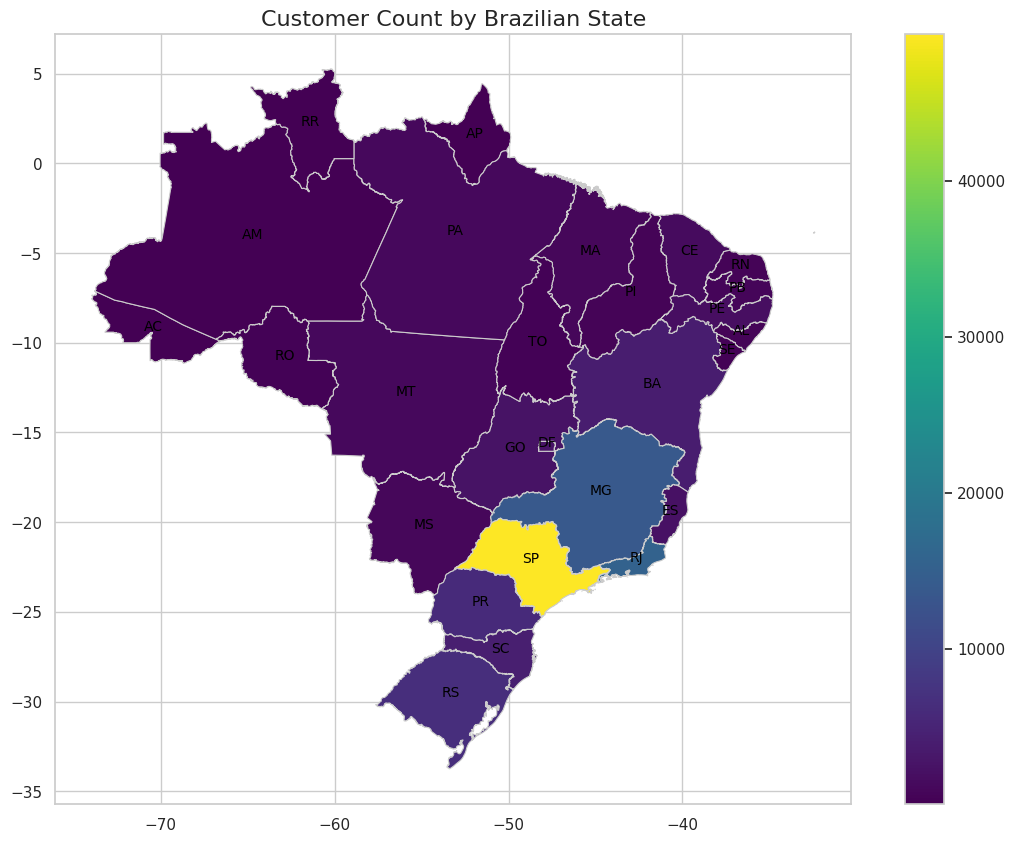

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

geo_state_customers.plot(column='count',
            cmap='viridis',
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True)

for idx, row in geo_state_customers.iterrows():
    plt.annotate(
        text=row['uf'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        ha='center',
        fontsize=10,
        color='black'
    )

plt.title('Customer Count by Brazilian State', fontsize=16)
plt.axis('on')
plt.show()

In [ ]:
commerce['deliver_delay_days'] = (
    commerce['order_delivered_customer_date'] - commerce['order_estimated_delivery_date']
).dt.days
commerce['deliver_delay_days'].fillna(commerce['deliver_delay_days'].max(), inplace=True)
commerce['deliver_delay_days'].head()

0   -11.0
1    -8.0
2     1.0
3   -13.0
4    -6.0
Name: deliver_delay_days, dtype: float64

In [ ]:
state_reviews = commerce.groupby('customer_state').agg(
    review_score=("review_score", "mean")
).reset_index()

state_reviews.head()

customer_state  review_score
0             AC      4.120879
1             AL      3.741722
2             AM      4.076923
3             AP      4.240964
4             BA      3.805872

In [ ]:
def bucket_delay(days):
    if pd.isna(days):
        return 'Not Delivered'
    elif days < -3:
        return 'Very Early'
    elif days < 0:
        return 'Early'
    elif days == 0:
        return 'On Time'
    elif days <= 3:
        return 'Slightly Late'
    elif days <= 7:
        return 'Late'
    else:
        return 'Very Late'

commerce['delay_bucket'] = commerce['deliver_delay_days'].apply(bucket_delay)

avg_reviews = commerce.groupby('delay_bucket')['review_score'].mean().reset_index()

bucket_order = ['Very Early', 'Early', 'On Time', 'Slightly Late', 'Late', 'Very Late', 'Not Delivered']

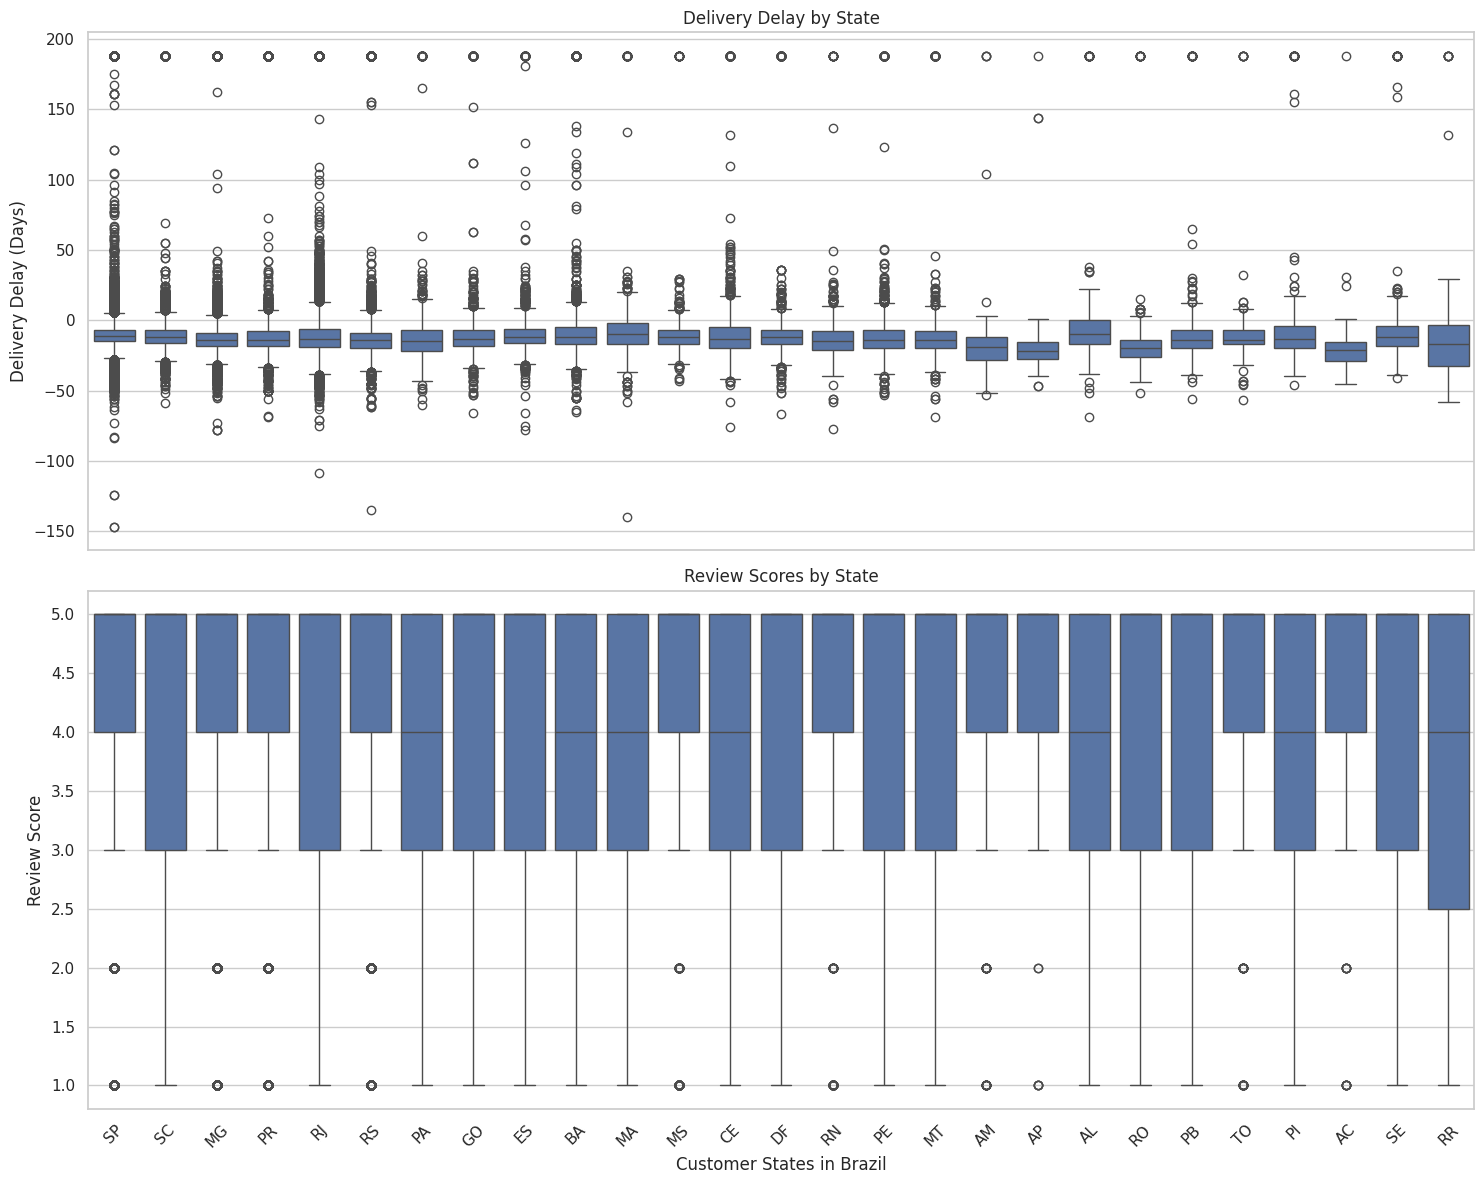

In [ ]:
# Boxplot: Delivery delay by state
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
sns.boxplot(data=commerce, x='customer_state', y='deliver_delay_days', ax=axes[0])
# axes[0].tick_params(axis="x", rotation=45)
axes[0].xaxis.set_visible(False)
axes[0].set_title('Delivery Delay by State')
axes[0].set_xlabel("Customer States in Brazil")
axes[0].set_ylabel("Delivery Delay (Days)")

sns.boxplot(data=commerce, x='customer_state', y='review_score', ax=axes[1])
axes[1].tick_params(axis="x", rotation=45)
# axes[0].xaxis.set_visible(False)
axes[1].set_title('Review Scores by State')
axes[1].set_xlabel("Customer States in Brazil")
axes[1].set_ylabel("Review Score")


plt.tight_layout()
plt.show()

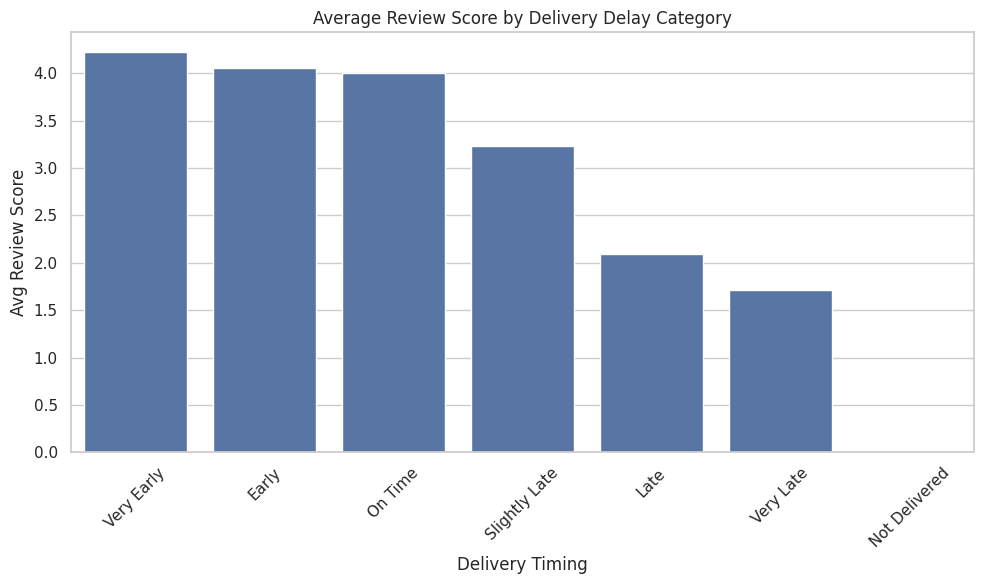

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_reviews, x='delay_bucket', y='review_score', order=bucket_order)
plt.title('Average Review Score by Delivery Delay Category')
plt.ylabel('Avg Review Score')
plt.xlabel('Delivery Timing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

👥 Customer Analysis Insights

---

📌 Customer Distribution
- Mayoritas pelanggan terkonsentrasi di **Brazil bagian Tenggara**, khususnya di:  
  • **São Paulo (SP)**  
  • **Rio de Janeiro (RJ)**  
  • **Minas Gerais (MG)**  
- Konsentrasi regional ini penting untuk **optimasi logistik** dan **targeted marketing**  

---

📌 Delivery Performance by Region
- Keterlambatan pengiriman bervariasi antar state  
- Namun, **tidak ada satu region pun yang konsisten paling buruk**  
- Faktor geografis kurang berpengaruh dibanding kategori waktu pengiriman dalam menjelaskan kepuasan pelanggan  

---

📌 Delivery Delays vs Customer Reviews
- **Review score menurun seiring bertambahnya keterlambatan pengiriman**  
- Pengiriman **tepat waktu atau lebih cepat** → skor tertinggi  
- Pengiriman **sangat terlambat** → penurunan tajam pada kepuasan  

---

🗝️ Final Takeaway
- **Geografi** menjelaskan distribusi pelanggan  
- **Timing pengiriman** menjelaskan kepuasan pelanggan  
- Fokus utama bisnis: **minimalkan keterlambatan** untuk menjaga customer experience & review score  


📦 Product Analysis

---

1. Best-Selling Product Categories
- **Pertanyaan**: *Which product categories are most sold?*  
- **Visualisasi**: **Bar Chart** jumlah produk terjual per kategori (`product_category_name`)  
- **Insight**: Identifikasi kategori terpopuler → berguna untuk inventory management & strategi pemasaran  

---

2. Product Category & Customer Feedback
- **Pertanyaan**: *Do certain categories have higher review scores or return rates?*  
- **Analisis**:  
  • Hitung **average review_score** per kategori produk  
  • Jika ada data retur/canceled, bandingkan juga **return/cancel rate** per kategori  
- **Insight**:  
  • Beberapa kategori mungkin mendapat ulasan lebih tinggi (misalnya elektronik kecil, buku)  
  • Kategori lain bisa memiliki skor lebih rendah / return rate lebih tinggi (misalnya furniture, produk besar dengan risiko pengiriman rusak)  


In [ ]:
product_df = commerce.groupby("product_category_name_english").agg(
    count=("product_category_name_english", "count"),
    review_score=("review_score", "mean")
).sort_values(by="count", ascending=False).head(20)

product_df.head()

count  review_score
product_category_name_english                     
bed_bath_table                 11731      3.892347
health_beauty                   9818      4.131498
sports_leisure                  8872      4.104842
furniture_decor                 8665      3.919036
computers_accessories           8011      3.938858

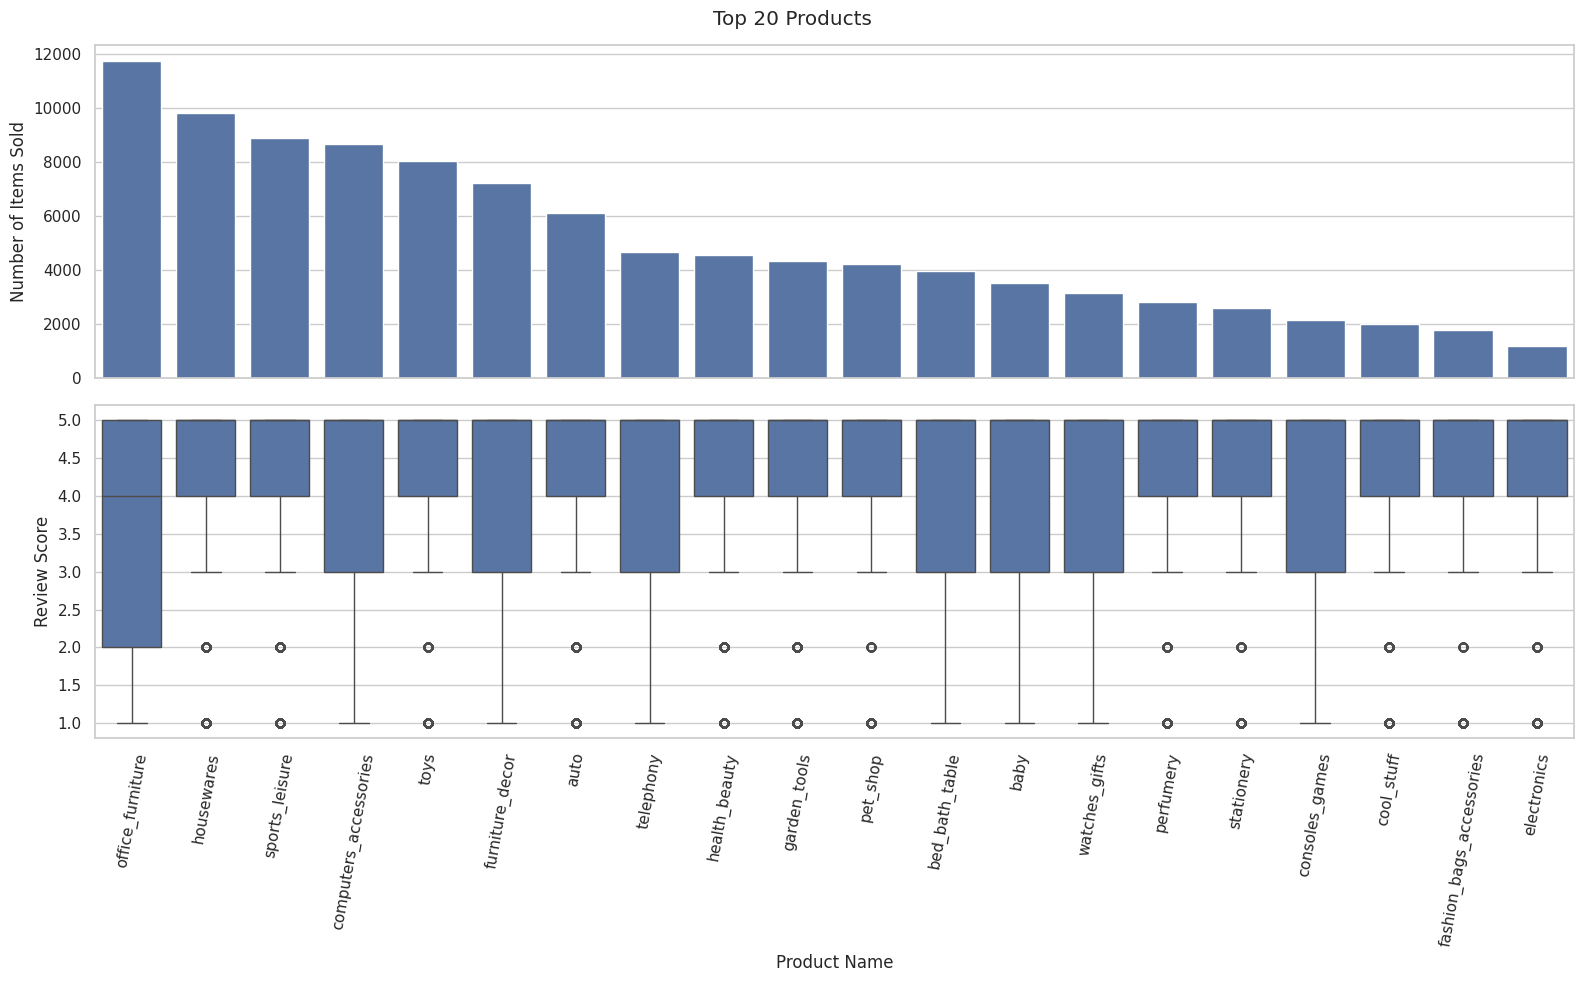

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(16,10))
plt.subplots_adjust(hspace=0.4)
sns.barplot(data=product_df, x=product_df.index, y="count", ax=axes[0])
# axes[0].tick_params(axis="x", rotation=80)
# axes[0].set_xlabel("Product Name")
axes[0].xaxis.set_visible(False)
axes[0].set_ylabel("Number of Items Sold")

sns.boxplot(data=commerce[commerce['product_category_name_english'].isin(product_df.index)],
            x="product_category_name_english", y="review_score", ax=axes[1])

axes[1].tick_params(axis="x", rotation=80)
axes[1].set_xlabel("Product Name")
axes[1].set_ylabel("Review Score")

fig.suptitle("Top 20 Products")
plt.tight_layout()
plt.show()

Product Analysis Insights

---

🛒 Top-Selling Categories
- Sebagian besar penjualan berasal dari:  
  • **Office furniture**  
  • **Home furniture**  
  • **Housewares**  
  • **Sports & leisure**  
  • **Computer accessories**  
  • **Toys**  
- Kategori ini mendominasi pembelian, mencerminkan kebutuhan **rumah tangga** sekaligus permintaan **lifestyle & electronics**  

---

⭐ Customer Satisfaction by Category
- Produk **furniture** cenderung memiliki median review score = **4** → stabil, cukup memuaskan  
- **Housewares, toys, dan sports/leisure** menunjukkan skor review lebih tinggi → kepuasan pelanggan lebih kuat  
- Perbedaan antar kategori menegaskan bahwa **jenis produk memengaruhi pengalaman pelanggan**  

---

🗝️ Final Takeaway
- **Household & lifestyle products** menjadi pendorong utama penjualan, dengan banyak kategori menunjukkan review positif  
- Fokus ke:  
  • **Monitoring kategori underperforming** untuk perbaikan  
  • **Menguatkan kategori high-scoring** untuk meningkatkan **retensi & trust pelanggan**  


🚚 Delivery & Logistics Analysis

---

1. Delivery Duration
- **Pertanyaan**: *How long does delivery typically take?*  
- **Analisis**: Hitung selisih antara **`order_delivered_customer_date`** dan **`order_purchase_timestamp`**  
- **Insight**: Memberikan gambaran **durasi rata-rata pengiriman** (misalnya median = X hari, rata-rata = Y hari)  

---

2. Delivery Delays
- **Pertanyaan**: *Are there delays between estimated and actual delivery?*  
- **Visualisasi**: **Histogram** atau **bar chart** dari perbedaan:  
  **`order_delivered_customer_date - order_estimated_delivery_date`**  
- **Insight**:  
  • Nilai positif → keterlambatan (late delivery)  
  • Nilai negatif → pengiriman lebih cepat dari estimasi  
  • Distribusi bisa menunjukkan seberapa sering pengiriman **on-time**, **early**, atau **delayed**  


In [ ]:
display(commerce[commerce['seller_state'].isin(['AC', 'AM'])])

#AC and AM removed due to insufficient data volume
commerce = commerce[~commerce['seller_state'].isin(['AC', 'AM'])]

seller_states = commerce.groupby("seller_state").agg(
    count=("seller_state", "count"),
    median=("deliver_delay_days", "median")
).reset_index()
seller_states.head()

customer_id                customer_unique_id  \
22314   957f8e082185574de25992dc659ebbc0  07d5b1f9bdd053347f0213187b343ac9   
40643   9d313f559eb6ce11ff81d6402f472763  bb2f08afc6554dac6cad068e40145cbc   
53240   9cae1ebde4a8d7f03a92da657abdb51c  4d210caec5d9a335920c4a33e8afe467   
111633  d5efb94fdd7fe8e0ba70c7580088acae  aaf7ed8313a90b1735dd28ab46546b30   

        customer_zip_code_prefix customer_city customer_state  \
22314                       3531     sao paulo             SP   
40643                      65200      pinheiro             MA   
53240                      33010   santa luzia             MG   
111633                     57073        maceio             AL   

                                order_id order_status  \
22314   d3c8851a6651eeff2f73b0e011ac45d0   processing   
40643   686c0ba20be3837a5041edbc39d3f9ae    delivered   
53240   ac1436b9efc2d8508c1abf9e4dca5709    delivered   
111633  d573a47c29466bb2e4e46aef0ff04f23    delivered   

       order_purchase_timestamp   order_approved_at  \
22314       2016-10-05 22:44:13 2016-10-06 15:51:05   
40643       2017-03-12 20:54:08 2017-03-12 20:54:08   
53240       2017-03-15 14:28:24 2017-03-15 14:28:24   
111633      2017-02-03 01:06:06 2017-02-03 01:15:11   

       order_delivered_carrier_date  ... seller_zip_code_prefix seller_city  \
22314                           NaT  ...                69900.0  rio branco   
40643           2017-03-17 14:10:50  ...                69005.0      manaus   
53240           2017-03-17 14:10:48  ...                69005.0      manaus   
111633          2017-02-06 15:04:37  ...                69005.0      manaus   

        seller_state order_purchase_day order_purchase_month order_day_name  \
22314             AC         2016-10-05           2016-10-01      Wednesday   
40643             AM         2017-03-12           2017-03-01         Sunday   
53240             AM         2017-03-15           2017-03-01      Wednesday   
111633            AM         2017-02-03           2017-02-01         Friday   

        order_month  order_day_of_week  deliver_delay_days delay_bucket  
22314       October                  2               188.0    Very Late  
40643         March                  6                 0.0      On Time  
53240         March                  2               -11.0   Very Early  
111633     February                  4                38.0    Very Late  

[4 rows x 47 columns]

seller_state  count  median
0           BA    694   -13.0
1           CE    102   -14.0
2           DF    936   -13.0
3           ES    389   -14.0
4           GO    544   -14.0

In [ ]:
# Load GeoJSON of Brazilian states
gdf = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")

# Map full state names to acronyms
state_abbrev = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}

gdf['uf'] = gdf['name'].map(state_abbrev)

geo_state_sellers = gdf.merge(seller_states, left_on='uf', right_on="seller_state")

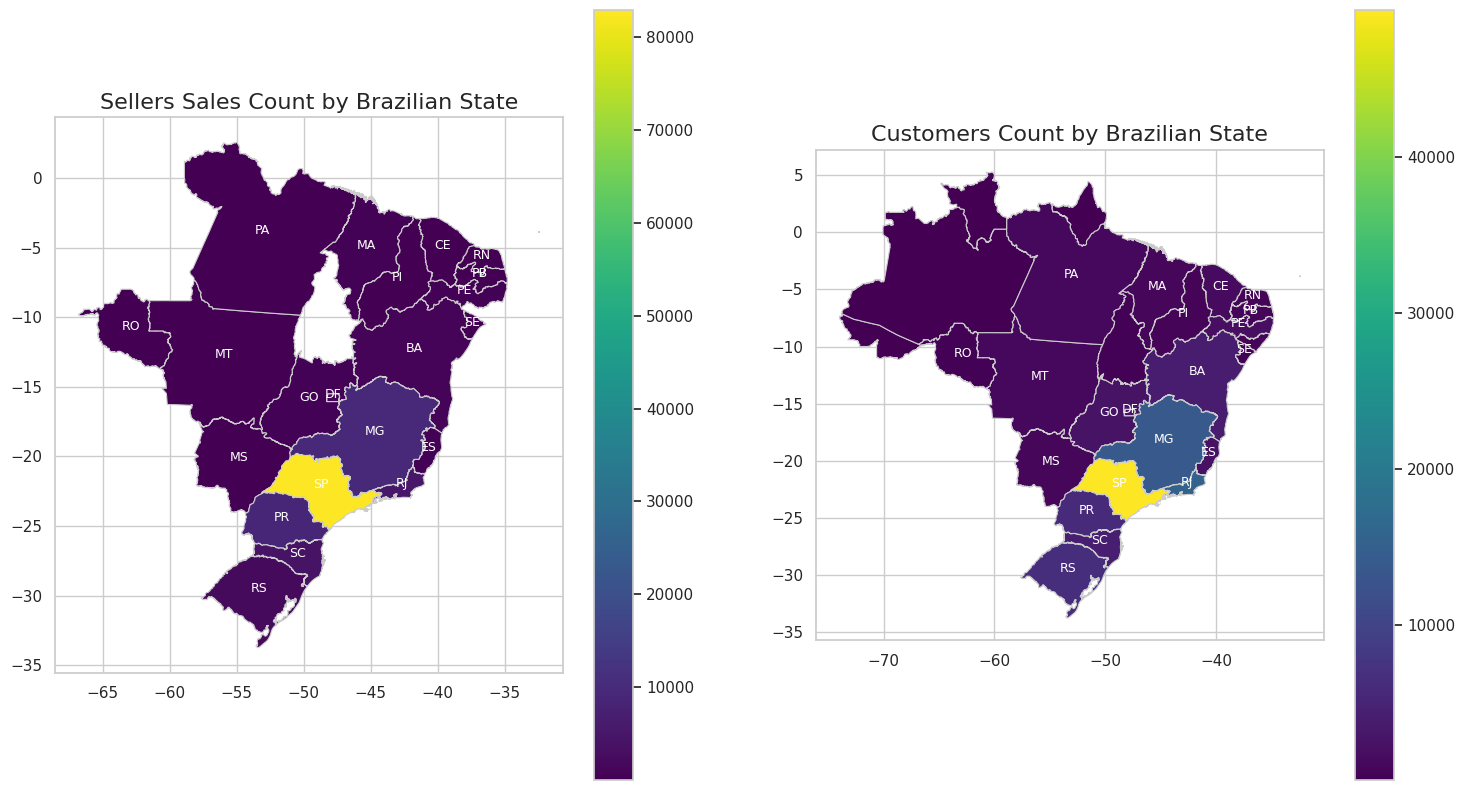

In [ ]:
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(1, 2)
axes = []
axes.append(fig.add_subplot(gs[0, 0]))
axes.append(fig.add_subplot(gs[0, 1]))


geo_state_sellers.plot(column='count',
            cmap='viridis',
            linewidth=0.8,
            ax=axes[0],
            edgecolor='0.8',
            legend=True)

geo_state_customers.plot(column='count',
            cmap='viridis',
            linewidth=0.8,
            ax=axes[1],
            edgecolor='0.8',
            legend=True)

for ax in axes[:2]:
    for idx, row in geo_state_sellers.iterrows():
        ax.annotate(
            text=row['uf'],
            xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
            ha='center',
            fontsize=9,
            color='white'
        )

axes[0].set_title('Sellers Sales Count by Brazilian State', fontsize=16)
axes[1].set_title('Customers Count by Brazilian State', fontsize=16)

plt.axis('on')
plt.show()

Text(0, 0.5, 'Delay (Days)')

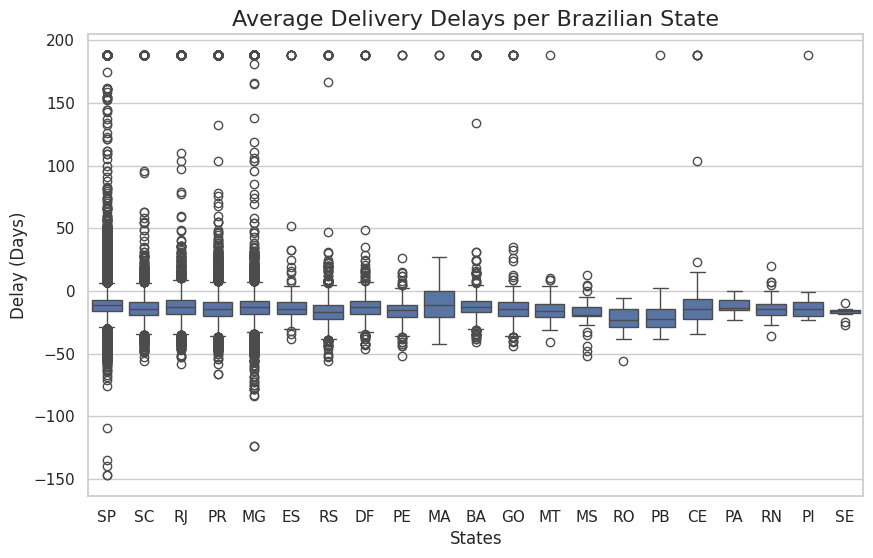

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=commerce, x="seller_state", y="deliver_delay_days")
plt.title('Average Delivery Delays per Brazilian State', fontsize=16)
plt.xlabel('States')
plt.ylabel('Delay (Days)')

Text(0.5, 0, 'Delivery Delay (Days)')

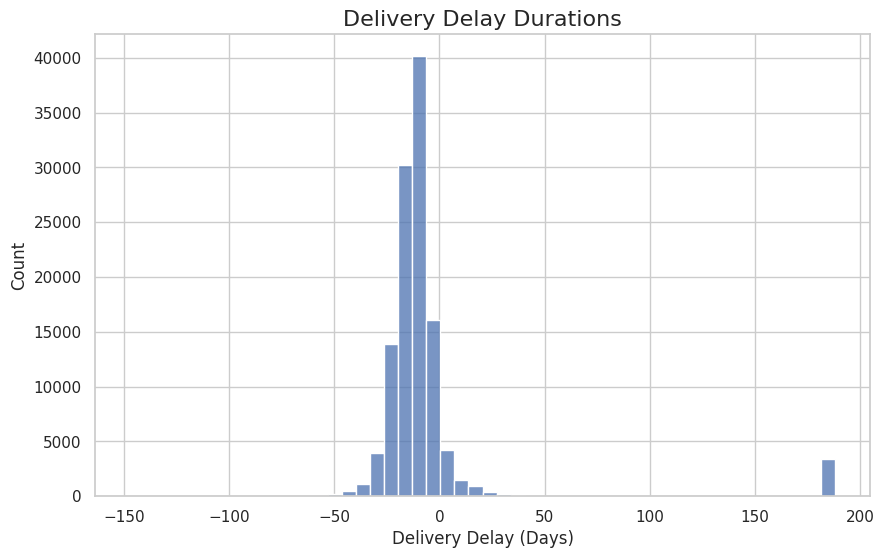

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=commerce, x="deliver_delay_days", bins=50)
plt.title("Delivery Delay Durations", fontsize=16)
plt.xlabel("Delivery Delay (Days)")

🚚 Delivery & Logistics Insights

---

📌 Seller & Customer Geography
- Penjual (**sellers**) dan pelanggan (**customers**) terkonsentrasi di state yang sama  
- Hal ini mendukung **efisiensi logistik berbasis kedekatan geografis**  

---

📌 Delivery Delays
- **Median delivery delay bernilai negatif** di sebagian besar state → pesanan sering tiba **lebih cepat dari estimasi**  
- Namun, terdapat **outlier ekstrem** di beberapa state → pesanan sangat terlambat dibanding estimasi  

---

🗝️ Takeaway
- Secara keseluruhan, **kinerja pengiriman kuat** dengan mayoritas pesanan tiba lebih awal  
- Meski begitu, adanya **long-tail delays** menunjukkan perlunya **monitoring khusus di region tertentu** untuk menjaga konsistensi kualitas layanan  


📊 E-Commerce EDA Summary

Periode analisis: **Agustus 2016 – November 2018**  
Hasil menunjukkan platform e-commerce dengan **pertumbuhan kuat**, **operasi sehat**, dan pola perilaku pelanggan yang jelas.  

---

🛒 Sales & Seasonality
- Order meningkat stabil sepanjang **2017**, dengan puncak di **November 2017** (musim liburan / Black Friday)  
- Penjualan lebih tinggi pada **hari kerja** dibanding akhir pekan → belanja online lebih banyak dilakukan saat weekdays  
- Penurunan setelah pertengahan 2018 kemungkinan karena **data tidak lengkap**, bukan penurunan permintaan  
- ~**99.9%** order berhasil dikirim dengan tingkat pembatalan sangat rendah  

---

💳 Payments
- Metode pembayaran:  
  • **Credit card** mendominasi (**74%**)  
  • **Bank slips (boleto)**: 19%  
  • **Vouchers**: 5%  
  • **Debit**: 1%  
- Pembelian besar sering dibayar dengan **cicilan**, memiliki median value lebih tinggi  
- Transaksi kecil sekali bayar → lebih banyak outlier pada distribusi pembayaran  

---

👥 Customers & Geography
- Mayoritas pelanggan berada di **Brazil Tenggara**, terutama:  
  • São Paulo (SP)  
  • Rio de Janeiro (RJ)  
  • Minas Gerais (MG)  
- Konsentrasi regional ini menunjukkan peluang untuk **efisiensi logistik** dan **targeted marketing**  

---

📦 Products & Reviews
- Kategori terlaris: **furniture, housewares, sports/leisure, computer accessories, toys**  
- **Furniture** → median review = 4 (cukup stabil)  
- **Housewares, toys, sports/leisure** → review lebih tinggi, kepuasan pelanggan lebih kuat  
- Jenis produk berpengaruh langsung pada **customer experience**  

---

🚚 Delivery & Logistics
- Seller dan customer sering berada di state yang sama → mendukung pengiriman cepat  
- Median waktu pengiriman **lebih cepat dari estimasi**, meskipun ada outlier keterlambatan ekstrem di beberapa region  
- **Review score turun tajam** saat terjadi keterlambatan → delivery time terbukti sebagai **faktor utama kepuasan pelanggan**  

---




# 🧪 Hypothesis Testing Framework

---

## 1. Formulate Hypotheses
- **Null Hypothesis (H₀):** Tidak ada perbedaan/efek signifikan  
- **Alternative Hypothesis (H₁):** Ada perbedaan/efek signifikan  

*Contoh:*  
H₀: Rata-rata review score sama untuk semua kategori produk  
H₁: Rata-rata review score berbeda antar kategori produk  

---

## 2. Choose Appropriate Statistical Test
- **T-test (independent samples):** membandingkan rata-rata dua grup (contoh: review score antara pembelian dengan cicilan vs tanpa cicilan)  
- **Chi-square test:** menguji hubungan antar variabel kategorikal (contoh: payment_type vs order_status)  
- **ANOVA:** membandingkan rata-rata lebih dari dua grup (contoh: rata-rata review score per kategori produk)  
- **Correlation test (Pearson/Spearman):** melihat asosiasi antar variabel numerik (contoh: delivery_time vs review_score)  

---

## 3. Check Assumptions
- **Normality:** gunakan Shapiro-Wilk / Kolmogorov-Smirnov test, atau visualisasi histogram/QQ-plot  
- **Equal variances:** gunakan Levene’s test atau Bartlett’s test  
- Jika asumsi tidak terpenuhi → gunakan **uji non-parametrik** (Mann-Whitney U, Kruskal-Wallis, dsb.)  

---

## 4. Interpret Results
- **P-value:**  
  • p < 0.05 → tolak H₀ (ada perbedaan signifikan)  
  • p ≥ 0.05 → gagal tolak H₀ (tidak cukup bukti adanya perbedaan)  
- **Confidence Interval (CI):**  
  • Memberikan rentang estimasi efek/perbedaan  
  • Jika CI tidak mencakup 0 → perbedaan signifikan  

---

## 5. Report Findings & Business Implications
- Jelaskan hasil dalam **bahasa bisnis**  
  • Contoh: "Pelanggan dengan cicilan membayar rata-rata 25% lebih besar dibanding pelanggan tanpa cicilan (p < 0.01)."  
- Kaitkan dengan **strategi**: pricing, marketing, logistics, customer satisfaction  


In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, kruskal

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

💡 Hypothesis Test: Review Score vs Delivery Delays  

- Null Hypothesis (H₀): Delivery delays do not affect review scores  
- Alternative Hypothesis (H₁): Delivery delays do affect review scores  
- Type I Error (α): Kesimpulan bahwa delay memengaruhi skor review padahal sebenarnya tidak  
- Type II Error (β): Gagal mendeteksi pengaruh delay padahal sebenarnya ada  
- Appropriate Tests: Linear Regression (`review_score ~ delivery_delay_days`) untuk hubungan numerik sederhana; Mann–Whitney U Test untuk perbandingan grup (on-time vs late) jika data tidak normal  
- Significance Level: α = 0.05 → p < 0.05 tolak H₀, p ≥ 0.05 gagal tolak H₀  


In [ ]:
delay_review = commerce[["deliver_delay_days", "review_score"]].dropna().reset_index()
delay_review["is_late"] = delay_review["deliver_delay_days"] > 0

X = delay_review["deliver_delay_days"]
y = delay_review["review_score"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                 1.393e+04
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        08:17:01   Log-Likelihood:            -1.9622e+05
No. Observations:              115519   AIC:                         3.924e+05
Df Residuals:                  115517   BIC:                         3.925e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9296      0

In [ ]:
late = delay_review.loc[delay_review["is_late"], "review_score"].to_numpy()
on_time = delay_review.loc[~delay_review["is_late"], "review_score"].to_numpy()

print(f"Late deliveries: {len(late)}, On time deliveries: {len(on_time)}")
print(f"Late deliveries mean={late.mean()}, median={np.median(late)}")
print(f"On time deliveries mean={on_time.mean()}, median={np.median(on_time)}")

Late deliveries: 10498, On time deliveries: 105021
Late deliveries mean=2.0915412459516096, median=1.0
On time deliveries mean=4.208139324516049, median=5.0


In [ ]:
stat, p_u = mannwhitneyu(on_time, late, alternative="two-sided")
print("Mann–Whitney U:", stat, "p-value:", p_u)

Mann–Whitney U: 913483973.5 p-value: 0.0


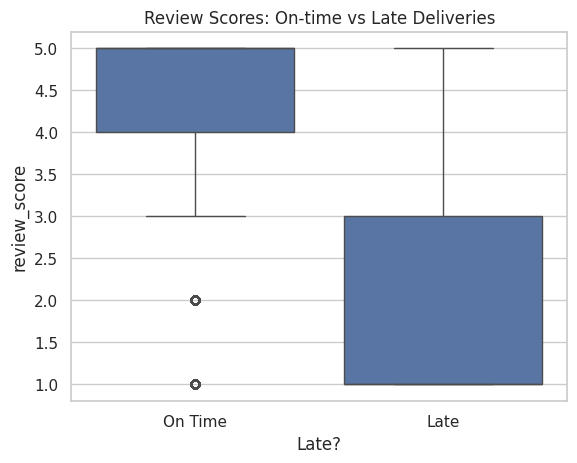

In [ ]:
sns.boxplot(data=delay_review,
            x="is_late",
            y="review_score")

plt.xticks([0,1], ["On Time", "Late"])
plt.xlabel("Late?")
plt.title("Review Scores: On-time vs Late Deliveries")
plt.show()

In [ ]:
alpha = 0.05
decision_reg = "REJECT H0 (delay impacts reviews)" if model.pvalues["deliver_delay_days"] < alpha else "FAIL TO REJECT H0"
decision_u = "REJECT H0 (scores differ)" if p_u < alpha else "FAIL TO REJECT H0"

print(f"\nDecision at α={alpha}:")
print(f"  Linear Regression: {decision_reg}")
print(f"  Mann–Whitney U: {decision_u}")


Decision at α=0.05:
  Linear Regression: REJECT H0 (delay impacts reviews)
  Mann–Whitney U: REJECT H0 (scores differ)


📊 Review Score vs Delivery Delays – Results  

- Late deliveries: 10,498 orders → Mean = 2.09, Median = 1.0  
- On-time deliveries: 105,021 orders → Mean = 4.21, Median = 5.0  
- Linear Regression: setiap tambahan 1 hari delay → rata-rata review score turun 0.013 poin (p < 0.001). Delay menjelaskan ~11% variasi skor review → faktor lain juga berperan besar.  
- Mann–Whitney U Test: U = 913,483,973.5, p < 0.001 → perbedaan skor review antara on-time vs late delivery signifikan.  
- Conclusion: Delivery delays berdampak negatif jelas terhadap skor review. Bisnis sebaiknya meminimalkan keterlambatan untuk menjaga kepuasan dan rating pelanggan.  


---
📊 Hypothesis Test: Delays vs Customer Locations  

- Null Hypothesis (H₀): Delivery delays are the same across all customer locations  
- Alternative Hypothesis (H₁): Delivery delays differ significantly across customer locations  
- Type I Error (α): Menyimpulkan bahwa delay berbeda antar lokasi padahal sebenarnya sama  
- Type II Error (β): Gagal mendeteksi perbedaan delay padahal sebenarnya ada  
- Appropriate Test: One-way ANOVA jika distribusi delay ~ normal dengan varians serupa; Kruskal–Wallis H-test jika asumsi ANOVA tidak terpenuhi  
- Post-hoc: Jika hasil signifikan, lanjutkan dengan perbandingan berpasangan (misalnya Dunn’s test atau Mann–Whitney U dengan koreksi multiple-testing) untuk mengetahui lokasi mana yang berbeda  
- Significance Level: α = 0.05 → p < 0.05 berarti tolak H₀ (delay berbeda signifikan antar lokasi)  


In [ ]:
df = commerce[["customer_state", "deliver_delay_days"]].dropna().copy()

low, high = df["deliver_delay_days"].quantile([0.01, 0.99])
df["delay_clip"] = df["deliver_delay_days"].clip(lower=low, upper=high)

df["is_late"] = df["deliver_delay_days"] > 0

state_counts = df["customer_state"].value_counts()
keep_states = state_counts[state_counts >= 200].index
df = df[df["customer_state"].isin(keep_states)].copy()

df["customer_state"] = df["customer_state"].astype("category")
df.head()

customer_state  deliver_delay_days  delay_clip  is_late
0             SP               -11.0       -11.0    False
1             SP                -8.0        -8.0    False
2             SP                 1.0         1.0     True
3             SP               -13.0       -13.0    False
4             SP                -6.0        -6.0    False

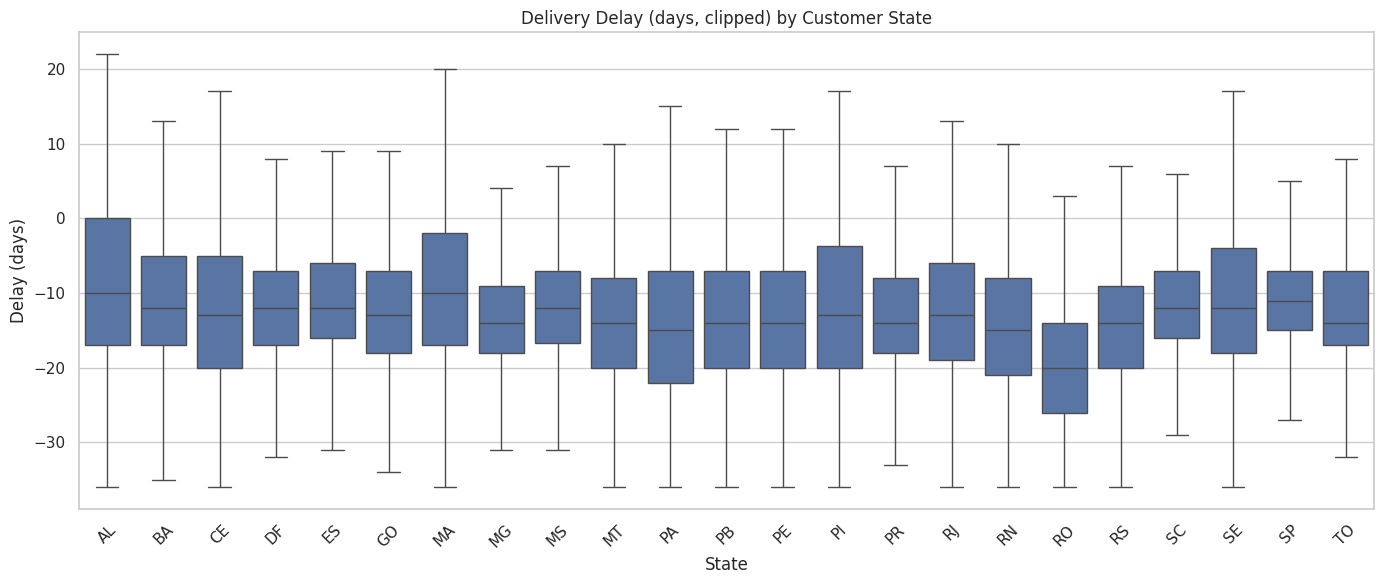

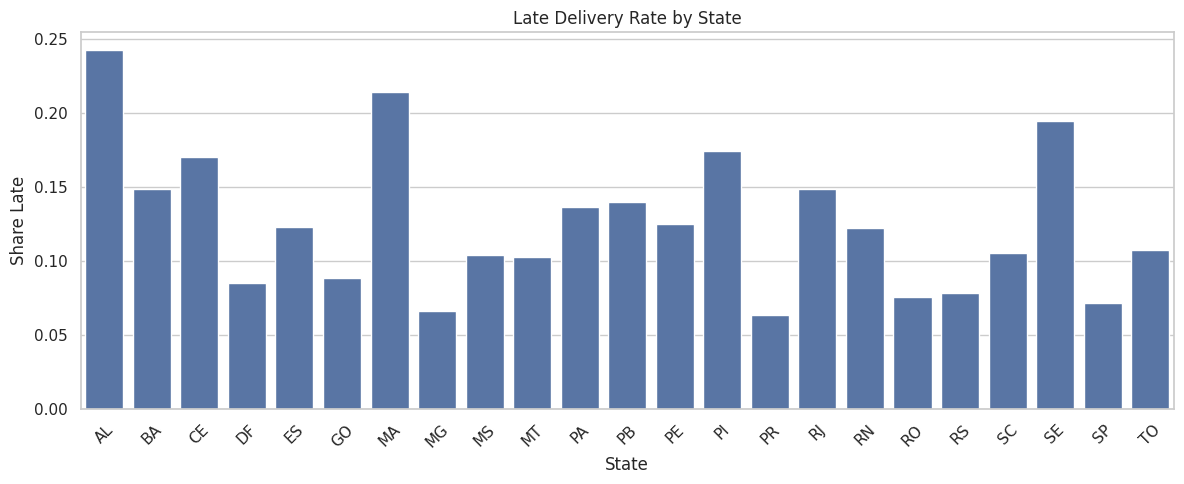

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="customer_state", y="delay_clip", showfliers=False)
plt.title("Delivery Delay (days, clipped) by Customer State")
plt.xlabel("State"); plt.ylabel("Delay (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

late_rate = df.groupby("customer_state")["is_late"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=late_rate.index, y=late_rate.values)
plt.title("Late Delivery Rate by State")
plt.ylabel("Share Late"); plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
groups = [g["deliver_delay_days"].values for _, g in df.groupby("customer_state")]
H_stat, p_kw = kruskal(*groups)

# Approximate effect size (eta-squared) for Kruskal–Wallis: η² ≈ (H - k + 1) / (n - k)
k = df["customer_state"].nunique()
n = len(df)
eta2_kw = max(0, (H_stat - k + 1) / (n - k))

print(f"Kruskal–Wallis: H={H_stat:.1f}, p={p_kw:.3g}, k={k}, n={n}, eta^2≈{eta2_kw:.3f}")

Kruskal–Wallis: H=2645.2, p=0, k=23, n=116707, eta^2≈0.022


In [ ]:
model = ols("deliver_delay_days ~ C(customer_state)", data=df).fit(cov_type="HC1")
anova = anova_lm(model, typ=2)  # global test on state dummies

print(anova)
print("\nModel F p-value (state effect):", anova["PR(>F)"].iloc[0])
print("\nAdj R^2:", model.rsquared_adj)

                         sum_sq        df          F        PR(>F)
C(customer_state)  3.720768e+05      22.0  13.820479  2.187648e-51
Residual           1.427901e+08  116684.0        NaN           NaN

Model F p-value (state effect): 2.1876478664431214e-51

Adj R^2: 0.002301192883324088


In [ ]:
alpha = 0.05
decision_kw = "REJECT H0 (delays differ by state)" if p_kw < alpha else "FAIL TO REJECT H0"

# For OLS ANOVA p-value:
p_anova = anova["PR(>F)"].iloc[0]
decision_ols = "REJECT H0 (state has effect)" if p_anova < alpha else "FAIL TO REJECT H0"

print(f"\nDecision at α={alpha}:")
print(f"  Kruskal–Wallis: {decision_kw}")
print(f"  OLS ANOVA:      {decision_ols}")


Decision at α=0.05:
  Kruskal–Wallis: REJECT H0 (delays differ by state)
  OLS ANOVA:      REJECT H0 (state has effect)


📊 Delays vs Customer Locations – Results  

- Kruskal–Wallis test: H = 2645.2, p < 0.001, k = 23, n = 116,707, η² ≈ 0.022  
- One-way ANOVA (OLS): F(22, 116684) = 13.82, p < 0.001, Adjusted R² = 0.0023 (~0.2% variance explained)  
- Decision (α = 0.05):  
  • Kruskal–Wallis → REJECT H₀ → delays berbeda signifikan antar state  
  • ANOVA → REJECT H₀ → state berpengaruh signifikan terhadap delays  
- Interpretation: Perbedaan antar lokasi memang signifikan, tapi **efeknya sangat kecil** (η² ≈ 0.022; Adj R² ≈ 0.23%). Artinya signifikansi terutama muncul karena ukuran sampel yang sangat besar. Faktor lain seperti efisiensi logistik, waktu penanganan seller, dan jarak ke distribution center kemungkinan lebih dominan dalam menjelaskan variasi delay.  


---
📊 Hypothesis Test: Sales Volume vs Weekdays & Weekends  

- Null Hypothesis (H₀): Sales volumes are the same between weekdays and weekends  
- Alternative Hypothesis (H₁): Sales volumes differ significantly between weekdays and weekends  
- Type I Error (α): Menyimpulkan ada perbedaan sales padahal sebenarnya sama  
- Type II Error (β): Gagal mendeteksi perbedaan sales padahal sebenarnya ada  
- Appropriate Test: Independent t-test jika distribusi sales normal; Mann–Whitney U test jika asumsi normalitas tidak terpenuhi  
- Significance Level: α = 0.05 → p < 0.05 tolak H₀, p ≥ 0.05 gagal tolak H₀  


In [ ]:
commerce["is_weekday"] = commerce["order_day_of_week"] < 5
day_df = (
        commerce.groupby(["order_purchase_timestamp", "is_weekday"])
        .size()
        .rename("items_sold")
        .reset_index())
day_df.head()

order_purchase_timestamp  is_weekday  items_sold
0      2016-09-04 21:15:19       False           2
1      2016-09-05 00:15:34        True           1
2      2016-09-13 15:24:19        True           1
3      2016-09-15 12:16:38        True           3
4      2016-10-02 22:07:52       False           1

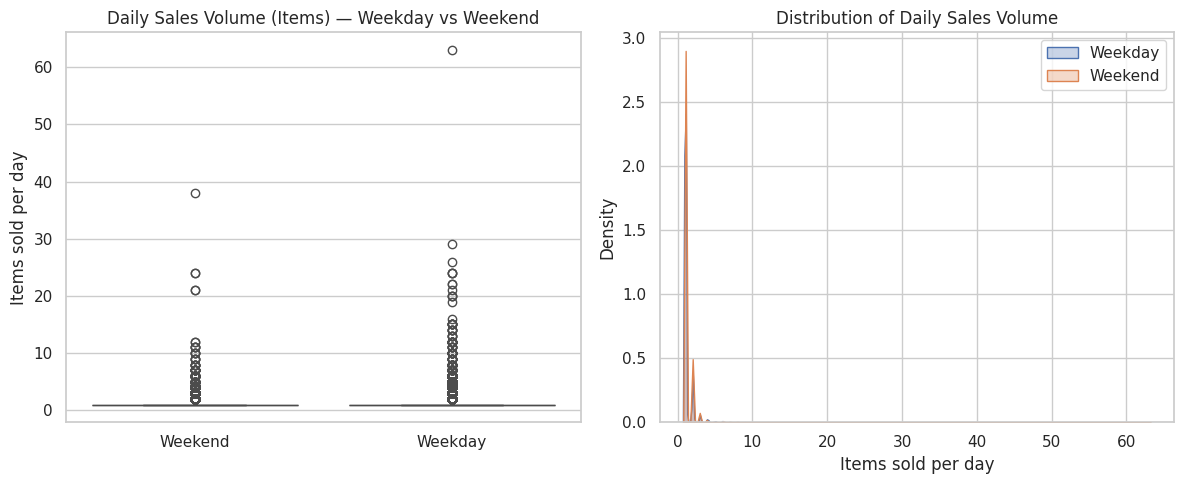

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(
    data=day_df.replace({"is_weekday": {True: "Weekday", False: "Weekend"}}),
    x="is_weekday", y="items_sold", ax=ax[0]
)
ax[0].set_title("Daily Sales Volume (Items) — Weekday vs Weekend")
ax[0].set_xlabel("")
ax[0].set_ylabel("Items sold per day")

sns.kdeplot(data=day_df[~day_df["is_weekday"]]["items_sold"], ax=ax[1], label="Weekday", fill=True, alpha=.3)
sns.kdeplot(data=day_df[ day_df["is_weekday"]]["items_sold"], ax=ax[1], label="Weekend", fill=True, alpha=.3)
ax[1].set_title("Distribution of Daily Sales Volume")
ax[1].set_xlabel("Items sold per day")
ax[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
weekdays = day_df.loc[day_df["is_weekday"], "items_sold"].to_numpy()
weekend = day_df.loc[~day_df["is_weekday"], "items_sold"].to_numpy()

print(f"Weekday days: {len(weekdays)}, Weekend days: {len(weekend)}")
print(f"Weekday mean={weekdays.mean()}, median={np.median(weekdays)}")
print(f"Weekend mean={weekend.mean()}, median={np.median(weekend)}")

Weekday days: 75117, Weekend days: 22386
Weekday mean=1.2061051426441418, median=1.0
Weekend mean=1.184088269454123, median=1.0


In [ ]:
# Welch's t-test (robust to unequal variances)
t_stat, p_t = ttest_ind(weekdays, weekend, equal_var=False)
print(f"Welch t-test: t={t_stat:.3f}, p-value={p_t:.4g}")

# Mann–Whitney U (non-parametric, distribution-free)
u_stat, p_u = mannwhitneyu(weekdays, weekend, alternative="two-sided")
print(f"Mann–Whitney U: U={u_stat:.0f}, p-value={p_u:.4g}")

Welch t-test: t=3.967, p-value=7.289e-05
Mann–Whitney U: U=850906438, p-value=3.129e-06


In [ ]:
alpha = 0.05
decision_t = "REJECT H0 (means differ)" if p_t < alpha else "FAIL TO REJECT H0"
decision_u = "REJECT H0 (distributions differ)" if p_u < alpha else "FAIL TO REJECT H0"

print(f"\nDecision at α={alpha}:")
print(f"  Welch t-test: {decision_t}")
print(f"  Mann–Whitney: {decision_u}")


Decision at α=0.05:
  Welch t-test: REJECT H0 (means differ)
  Mann–Whitney: REJECT H0 (distributions differ)


📊 Sales Volume vs Weekdays & Weekends – Results  

- Weekday Orders: 75,117  
- Weekend Orders: 22,386  
- Weekday mean = 1.21 | median = 1.0  
- Weekend mean = 1.18 | median = 1.0  
- Hypothesis Decision (α = 0.05):  
  • Welch’s t-test → Reject H₀ → rata-rata sales volume berbeda signifikan antara weekdays dan weekends  
  • Mann–Whitney U test → Reject H₀ → distribusi sales volume berbeda signifikan antara weekdays dan weekends  
- Conclusion: Kedua uji (parametrik & non-parametrik) sama-sama menunjukkan bahwa volume penjualan **tidak sama** antara weekdays dan weekends  
- Insight: Fokuskan iklan & stok di hari kerja, tapi tetap lakukan eksperimen promosi di akhir pekan untuk menyeimbangkan permintaan  


# Segmentation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
ORD_OK = orders.query("order_status == 'delivered'").copy()

In [ ]:
# --- Agregasi order_items ke level order_id ---
order_val = (
    order_items
    .assign(item_value=lambda d: d["price"] + d["freight_value"])  # GMV item + freight
    .groupby("order_id", as_index=False)
    .agg(
        items=("order_item_id","count"),
        revenue=("item_value","sum"),
        prod_cnt=("product_id","nunique"),
        mean_price=("price","mean"),
        mean_freight=("freight_value","mean")
    )
)

# --- Join ke orders delivered ---
ord_join = (
    ORD_OK[["order_id","customer_id","order_purchase_timestamp"]]
    .merge(order_val, on="order_id", how="left")
)

# --- Map ke customer_unique_id (stable identifier) ---
cust_key = customers[["customer_id","customer_unique_id"]].drop_duplicates()
ord_join = ord_join.merge(cust_key, on="customer_id", how="left")

ord_join["order_date"] = ord_join["order_purchase_timestamp"].dt.normalize()

# Quality checks
print("Orders delivered:", len(ORD_OK))
print("Orders with revenue:", ord_join["revenue"].notna().sum())
print("Unique customers:", ord_join["customer_unique_id"].nunique())

ord_join.head()

Orders delivered: 95105
Orders with revenue: 95105
Unique customers: 92047


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_purchase_timestamp  items  revenue  prod_cnt  mean_price  \
0      2017-10-02 10:56:33      1    38.71         1       29.99   
1      2018-07-24 20:41:37      1   141.46         1      118.70   
2      2018-08-08 08:38:49      1   179.12         1      159.90   
3      2017-11-18 19:28:06      1    72.20         1       45.00   
4      2018-02-13 21:18:39      1    28.62         1       19.90   

   mean_freight                customer_unique_id order_date  
0          8.72  7c396fd4830fd04220f754e42b4e5bff 2017-10-02  
1         22.76  af07308b275d755c9edb36a90c618231 2018-07-24  
2         19.22  3a653a41f6f9fc3d2a113cf8398680e8 2018-08-08  
3         27.20  7c142cf63193a1473d2e66489a9ae977 2017-11-18  
4          8.72  72632f0f9dd73dfee390c9b22eb56dd6 2018-02-13

In [ ]:
# Anchor tanggal untuk recency (pakai max order_date di dataset)
snapshot_date = ord_join["order_date"].max() + pd.Timedelta(days=1)

rfm = (
    ord_join.groupby("customer_unique_id")
    .agg(
        recency_days = ("order_date", lambda s: (snapshot_date - s.max()).days),
        frequency   = ("order_id", "nunique"),
        monetary    = ("revenue", "sum")
    )
    .reset_index()
)

# Safety: drop pelanggan tanpa revenue (jika ada)
rfm = rfm[rfm["monetary"].fillna(0) > 0].copy()

rfm.describe()

recency_days     frequency      monetary
count  92047.000000  92047.000000  92047.000000
mean     240.383456      1.033222    165.263810
std      152.377048      0.208681    226.710228
min        1.000000      1.000000      9.590000
25%      117.000000      1.000000     63.000000
50%      222.000000      1.000000    107.780000
75%      349.000000      1.000000    182.555000
max      714.000000     15.000000  13664.080000

In [ ]:
# Fungsi helper scoring dengan qcut; handle ties/duplicates
def qscore(series, q=5, reverse=False):
    # tambahkan jitter kecil untuk menghindari bin edge ties
    jitter = (np.random.RandomState(42).randn(len(series)) * 1e-9)
    s = series.values + jitter
    qcut = pd.qcut(s, q, labels=False, duplicates="drop") + 1  # 1..q
    if reverse:
        qcut = (q + 1) - qcut
    return qcut.astype(int)

rfm["R_score"] = qscore(rfm["recency_days"], q=5, reverse=True)   # recency kecil = skor tinggi
rfm["F_score"] = qscore(rfm["frequency"], q=5, reverse=False)
rfm["M_score"] = qscore(rfm["monetary"], q=5, reverse=False)
rfm["RFM_sum"] = rfm[["R_score","F_score","M_score"]].sum(axis=1)

# Aturan label sederhana
def rfm_label(row):
    r,f,m = row["R_score"], row["F_score"], row["M_score"]
    if r>=4 and f>=4 and m>=4:
        return "Champions"
    if r>=4 and f>=3:
        return "Loyal"
    if r>=3 and f>=2 and m>=2:
        return "Potential Loyalist"
    if r<=2 and f>=3 and m>=3:
        return "At Risk"
    if r<=2 and f<=2 and m<=2:
        return "Hibernating"
    if r>=4 and f==1:
        return "New Customers"
    return "Others"

rfm["Segment"] = rfm.apply(rfm_label, axis=1)
rfm.head(10)

customer_unique_id  recency_days  frequency  monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2           112          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f           115          1     27.19   
2  0000f46a3911fa3c0805444483337064           538          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078           322          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255           289          1    196.89   
5  0004bd2a26a76fe21f786e4fbd80607f           147          1    166.98   
6  00050ab1314c0e55a6ca13cf7181fecf           132          1     35.38   
7  00053a61a98854899e70ed204dd4bafe           183          1    419.18   
8  0005e1862207bf6ccc02e4228effd9a0           544          1    150.12   
9  0005ef4cd20d2893f0d9fbd94d3c0d97           171          1    129.76   

   R_score  F_score  M_score  RFM_sum             Segment  
0        4        4        4       12           Champions  
1        4        3        1        8               Loyal  
2        1        4        2        7              Others  
3        2        5        1        8              Others  
4        2        2        4        8              Others  
5        4        2        4       10  Potential Loyalist  
6        4        5        1       10               Loyal  
7        3        4        5       12  Potential Loyalist  
8        1        2        4        7              Others  
9        4        4        3       11               Loyal

customers       avg_R     avg_F       avg_M     revenue  \
Segment                                                                       
Potential Loyalist      17517  179.673574  1.036536  189.800581  3324736.78   
Others                  25609  334.713616  1.003397  126.348786  3235666.07   
At Risk                 13072  395.026010  1.073516  247.147534  3230712.57   
Champions                6466   93.216208  1.178163  312.708184  2021971.12   
Loyal                   15665   93.091669  1.013916  116.672004  1827666.95   
New Customers            7472   93.768870  1.000000  163.706384  1223214.10   
Hibernating              6246  397.392731  1.000000   55.726912   348070.29   

                    revenue_share  
Segment                            
Potential Loyalist       0.218560  
Others                   0.212704  
At Risk                  0.212379  
Champions                0.132919  
Loyal                    0.120146  
New Customers            0.080411  
Hibernating              0.022881

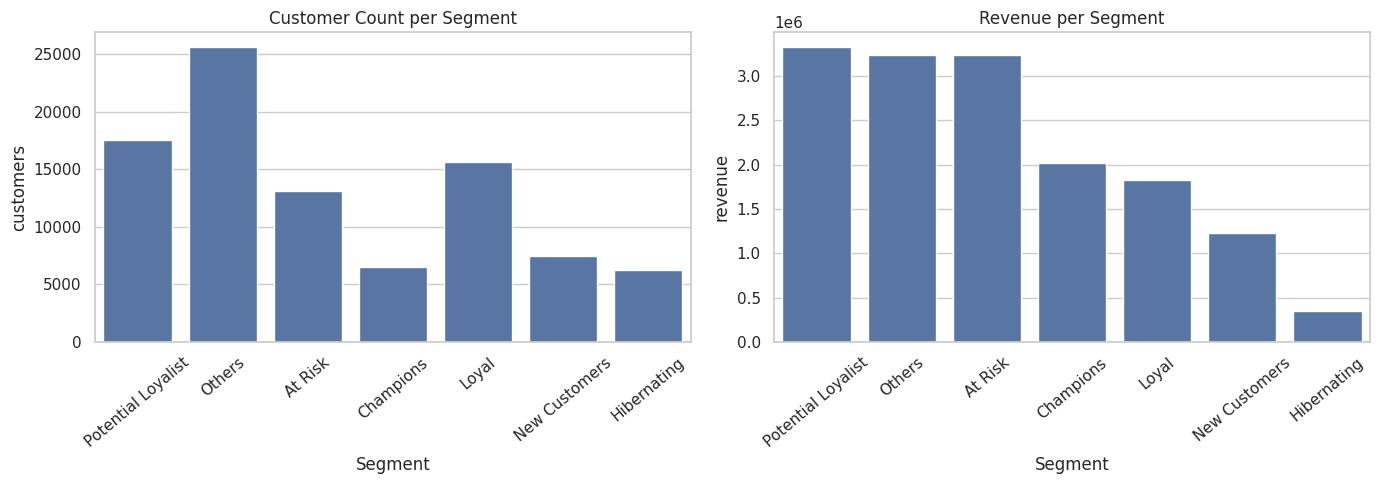

In [ ]:
seg_summary = (
    rfm
    .groupby("Segment")
    .agg(
        customers=("customer_unique_id","count"),
        avg_R=("recency_days","mean"),
        avg_F=("frequency","mean"),
        avg_M=("monetary","mean"),
        revenue=("monetary","sum")
    )
    .sort_values("revenue", ascending=False)
)

seg_summary["revenue_share"] = seg_summary["revenue"] / seg_summary["revenue"].sum()
display(seg_summary)

# Visual
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.barplot(x=seg_summary.index, y="customers", data=seg_summary.reset_index(), ax=ax[0])
ax[0].set_title("Customer Count per Segment"); ax[0].tick_params(axis="x", rotation=40)

sns.barplot(x=seg_summary.index, y="revenue", data=seg_summary.reset_index(), ax=ax[1])
ax[1].set_title("Revenue per Segment"); ax[1].tick_params(axis="x", rotation=40)
plt.tight_layout()
plt.show()

In [ ]:
segment_actions = {
    "Champions":           "VIP perks, early access, premium bundles, referral program.",
    "Loyal":               "Points multiplier, cross-sell kategori terkait, subscription.",
    "Potential Loyalist":  "Welcome + first-purchase coupon, edukasi produk, bundling.",
    "At Risk":             "Win-back: voucher personal, reach-out CS, free return.",
    "Hibernating":         "Re-activation: promo besar, seasonal campaign, push notif.",
    "New Customers":       "Onboarding email series, voucher repeat, rekomendasi produk.",
    "Others":              "Eksperimen A/B: diskon vs free shipping untuk re-order."
}
pd.DataFrame.from_dict(segment_actions, orient="index", columns=["Recommended Plays"])


Recommended Plays
Champions           VIP perks, early access, premium bundles, refe...
Loyal               Points multiplier, cross-sell kategori terkait...
Potential Loyalist  Welcome + first-purchase coupon, edukasi produ...
At Risk             Win-back: voucher personal, reach-out CS, free...
Hibernating         Re-activation: promo besar, seasonal campaign,...
New Customers       Onboarding email series, voucher repeat, rekom...
Others              Eksperimen A/B: diskon vs free shipping untuk ...

In [ ]:
# Customer Clustering (K-Means)
# Siapkan fitur untuk clustering
X = rfm[["recency_days","frequency","monetary"]].copy()
X["frequency_log1p"] = np.log1p(X["frequency"])
X["monetary_log1p"]  = np.log1p(X["monetary"])
X_clu = X[["recency_days","frequency_log1p","monetary_log1p"]].copy()

scaler = StandardScaler()
Xz = scaler.fit_transform(X_clu)

# Cari k via silhouette sederhana (k=2..7)
scores = []
for k in range(2,8):
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    lab = km.fit_predict(Xz)
    sil = silhouette_score(Xz, lab)
    scores.append((k, sil))
scores

[(2, np.float64(0.7088323216633121)),
 (3, np.float64(0.3557190445489072)),
 (4, np.float64(0.36850729988492203)),
 (5, np.float64(0.35296706244445514)),
 (6, np.float64(0.34358433584838544)),
 (7, np.float64(0.3566874673949072))]

In [ ]:
# Pilih k terbaik (silhouette tertinggi)
best_k = sorted(scores, key=lambda x: x[1], reverse=True)[0][0]
best_k

2

In [ ]:
# Fit final model
kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
rfm["cluster"] = kmeans.fit_predict(Xz)

# Profil klaster
cluster_profile = (
    rfm
    .groupby("cluster")
    .agg(
        customers=("customer_unique_id","count"),
        recency_days=("recency_days","median"),
        frequency=("frequency","median"),
        monetary=("monetary","median"),
        revenue=("monetary","sum")
    )
    .sort_values("revenue", ascending=False)
)
cluster_profile["revenue_share"] = cluster_profile["revenue"] / cluster_profile["revenue"].sum()
display(cluster_profile)

customers  recency_days  frequency  monetary      revenue  \
cluster                                                              
1            89302         223.0        1.0    105.38  14365529.86   
0             2745         203.0        2.0    225.51    846508.02   

         revenue_share  
cluster                 
1             0.944353  
0             0.055647

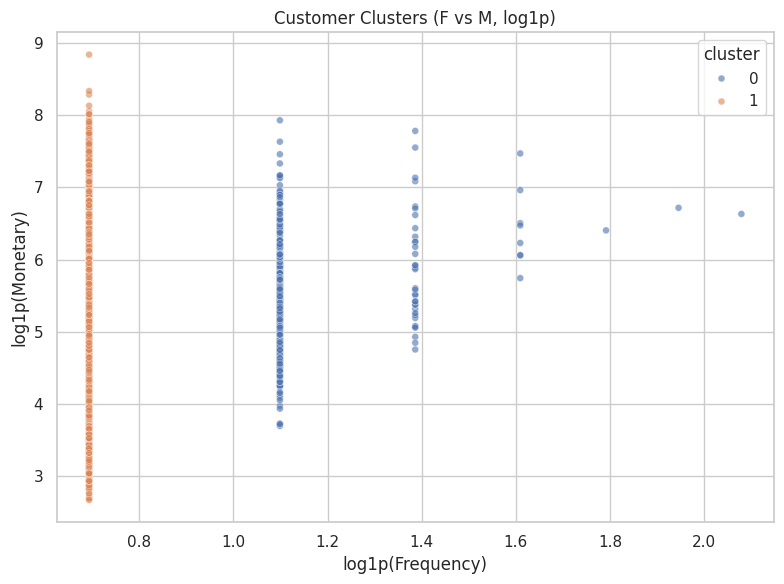

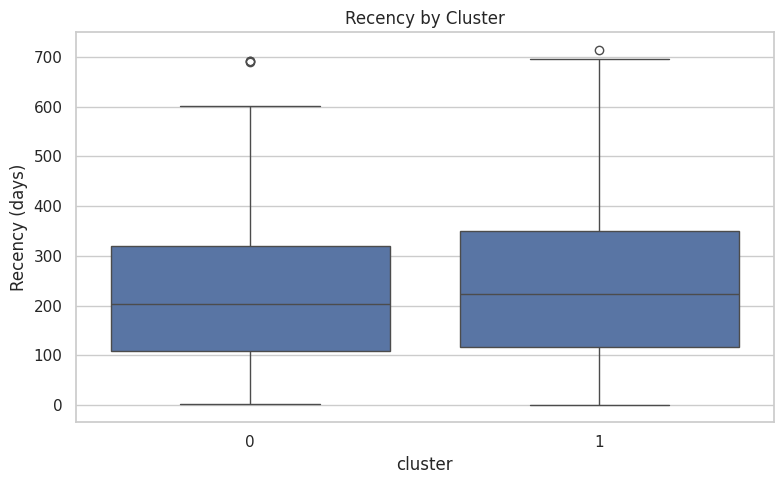

In [ ]:
# Scatter F vs M berwarna cluster (pakai log skala utk sebaran enak)
plot_df = rfm.copy()
plot_df["F_log1p"] = np.log1p(plot_df["frequency"])
plot_df["M_log1p"] = np.log1p(plot_df["monetary"])

plt.figure(figsize=(8,6))
sns.scatterplot(data=plot_df.sample(min(15000, len(plot_df)), random_state=42),
                x="F_log1p", y="M_log1p", hue="cluster", alpha=0.6, s=25)
plt.title("Customer Clusters (F vs M, log1p)")
plt.xlabel("log1p(Frequency)"); plt.ylabel("log1p(Monetary)")
plt.legend(title="cluster")
plt.tight_layout(); plt.show()

# Distribusi recency per cluster
plt.figure(figsize=(8,5))
sns.boxplot(data=rfm, x="cluster", y="recency_days")
plt.title("Recency by Cluster"); plt.ylabel("Recency (days)")
plt.tight_layout(); plt.show()

In [ ]:
# Contoh penamaan otomatis sederhana
def cluster_persona(row):
    r,f,m = row["recency_days"], row["frequency"], row["monetary"]
    # aturan kasar berbasis median (silakan refine)
    if r < rfm["recency_days"].median() and f > rfm["frequency"].median() and m > rfm["monetary"].median():
        return "High-Value Active"
    if r < rfm["recency_days"].median() and f <= rfm["frequency"].median():
        return "New/Active Low-F"
    if r >= rfm["recency_days"].median() and f > rfm["frequency"].median():
        return "Seasonal Loyal"
    return "Dormant/Low-Value"

rfm["persona"] = rfm.apply(cluster_persona, axis=1)

persona_view = (
    rfm.groupby(["cluster","persona"])
       .agg(customers=("customer_unique_id","count"),
            revenue=("monetary","sum"),
            avg_R=("recency_days","mean"),
            avg_F=("frequency","mean"),
            avg_M=("monetary","mean"))
       .sort_values(["cluster","revenue"], ascending=[True, False])
)
display(persona_view)

customers     revenue       avg_R     avg_F  \
cluster persona                                                          
0       High-Value Active       1340   458527.53  115.116418  2.159701   
        Seasonal Loyal          1241   374512.91  353.832393  2.078969   
        Dormant/Low-Value        164    13467.58  113.512195  2.006098   
1       New/Active Low-F       44425  7184534.23  114.209814  1.000000   
        Dormant/Low-Value      44877  7180995.63  366.353076  1.000000   

                                avg_M  
cluster persona                        
0       High-Value Active  342.184724  
        Seasonal Loyal     301.783167  
        Dormant/Low-Value   82.119390  
1       New/Active Low-F   161.722774  
        Dormant/Low-Value  160.015055

In [ ]:
# ---------------------------------------------------------------------
# 1) Build order-level value, then map to customer_unique_id
# ---------------------------------------------------------------------
order_val = (
    order_items
    .assign(item_value=lambda d: d["price"] + d["freight_value"])
    .groupby("order_id", as_index=False)
    .agg(
        items=("order_item_id","count"),
        revenue=("item_value","sum"),
        prod_cnt=("product_id","nunique"),
        mean_price=("price","mean"),
        mean_freight=("freight_value","mean")
    )
)

ord_join = (
    ORD_OK[["order_id","customer_id","order_purchase_timestamp"]]
    .merge(order_val, on="order_id", how="left")
)

cust_key = customers[["customer_id","customer_unique_id"]].drop_duplicates()
ord_join = ord_join.merge(cust_key, on="customer_id", how="left")

ord_join["order_date"]  = ord_join["order_purchase_timestamp"].dt.normalize()
ord_join["order_month"] = ord_join["order_date"].dt.to_period("M").dt.to_timestamp()

In [ ]:
# ---------------------------------------------------------------------
# 2) Build COHORT table (first purchase month per customer)
# ---------------------------------------------------------------------
first_purchase = (
    ord_join.groupby("customer_unique_id")["order_date"]
            .min().rename("first_date").reset_index()
)

cohort = ord_join.merge(first_purchase, on="customer_unique_id", how="left")
cohort["cohort_month"] = cohort["first_date"].dt.to_period("M").dt.to_timestamp()
cohort["order_month"]  = cohort["order_month"].dt.to_period("M").dt.to_timestamp()

# umur cohort (bulan)
cohort["age"] = (
    (cohort["order_month"].dt.year  - cohort["cohort_month"].dt.year ) * 12 +
    (cohort["order_month"].dt.month - cohort["cohort_month"].dt.month)
)
cohort = cohort[cohort["age"] >= 0].copy()

In [ ]:
# ---------------------------------------------------------------------
# 3) Attach RFM Segment & Payment utama (per order)
# ---------------------------------------------------------------------
# (a) RFM Segment (jika belum ada, fallback "Unknown")
if "rfm" in globals():
    rfm_min = rfm[["customer_unique_id","Segment"]].copy()
else:
    rfm_min = pd.DataFrame({"customer_unique_id": cohort["customer_unique_id"].unique(),
                            "Segment": "Unknown"})
cohort_rfm = cohort.merge(rfm_min, on="customer_unique_id", how="left")
cohort_rfm["Segment"] = cohort_rfm["Segment"].fillna("Unknown")

# (b) Payment utama per order: ambil baris payment_value terbesar
pay_main = (order_payments.sort_values(["order_id","payment_value"], ascending=[True,False])
            .drop_duplicates("order_id")[["order_id","payment_type"]])
cohort_rfm = cohort_rfm.merge(pay_main, on="order_id", how="left")
cohort_rfm["payment_type"] = cohort_rfm["payment_type"].fillna("unknown")


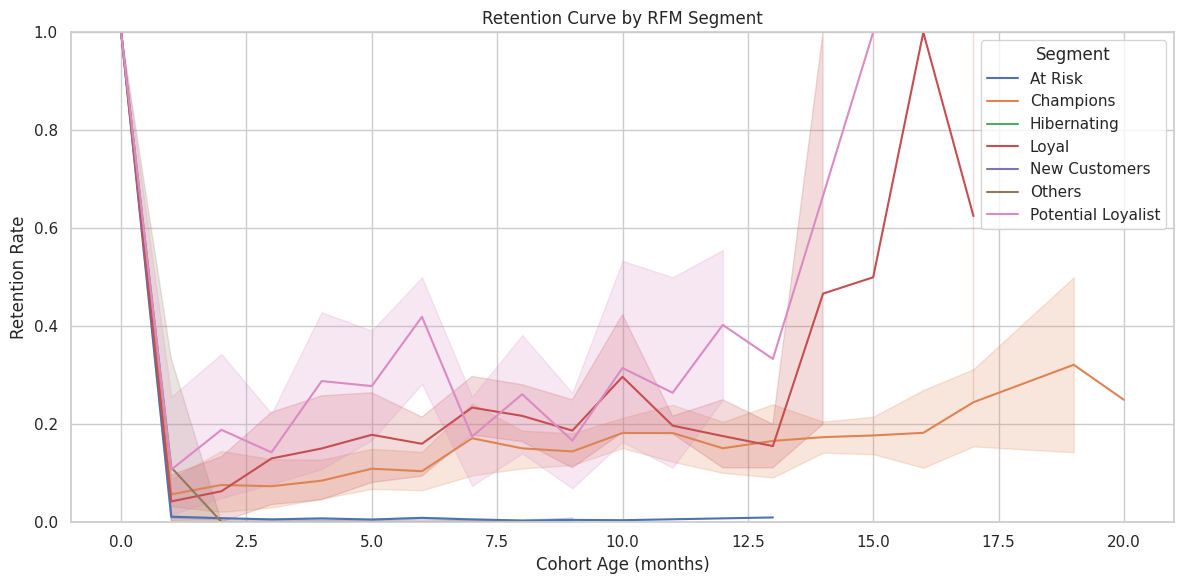

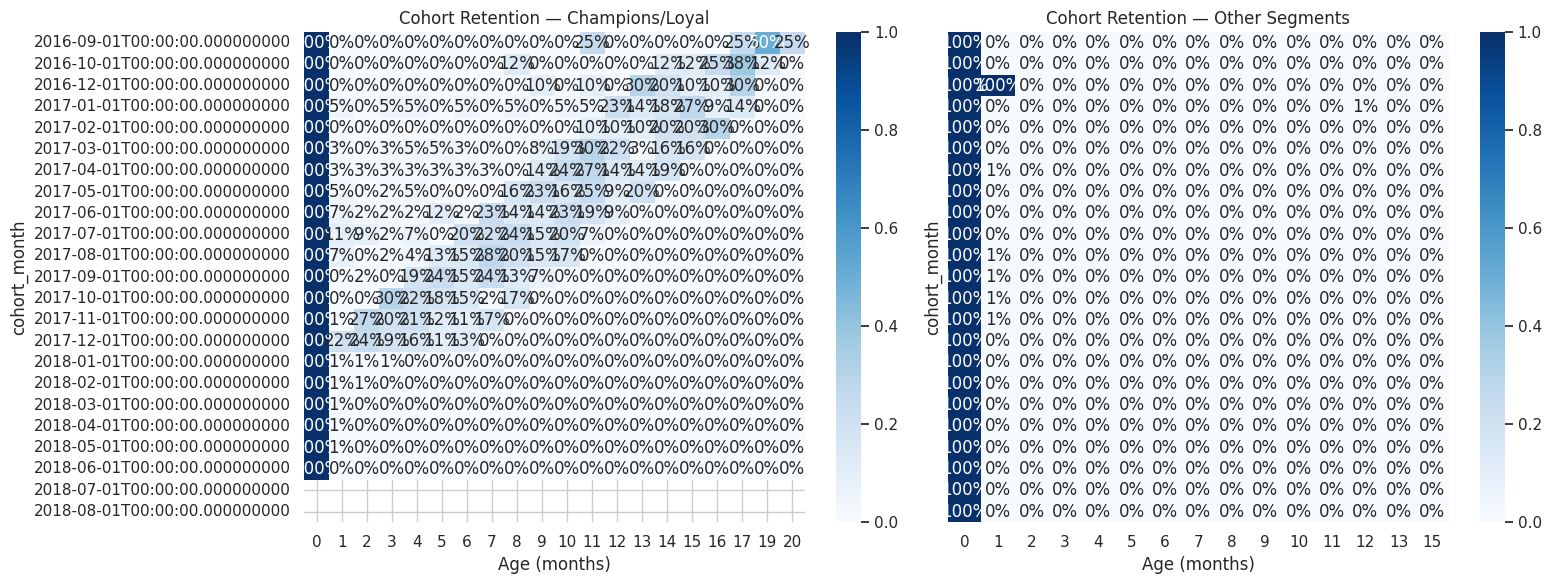

In [ ]:
# ---------------------------------------------------------------------
# 4) COHORT x RFM SEGMENT: retention by age
# ---------------------------------------------------------------------
rfm_cohort = (cohort_rfm
              .groupby(["Segment","cohort_month","age"])["customer_unique_id"]
              .nunique()
              .reset_index(name="custs"))

base_seg = (rfm_cohort[rfm_cohort["age"]==0]
            [["Segment","cohort_month","custs"]]
            .rename(columns={"custs":"cohort_size"}))

rfm_ret = rfm_cohort.merge(base_seg, on=["Segment","cohort_month"], how="left")
rfm_ret["retention"] = rfm_ret["custs"] / rfm_ret["cohort_size"]
rfm_ret = rfm_ret[rfm_ret["cohort_size"].notna()].copy()

# --- Plot: retention curve per Segment (mean across cohorts) ---
plt.figure(figsize=(12,6))
sns.lineplot(data=rfm_ret, x="age", y="retention", hue="Segment", estimator="mean")
plt.title("Retention Curve by RFM Segment")
plt.xlabel("Cohort Age (months)"); plt.ylabel("Retention Rate"); plt.ylim(0,1)
plt.tight_layout(); plt.show()

# --- Heatmap: contoh fokus Champions vs Others ---
cohort_rfm["Seg2"] = np.where(cohort_rfm["Segment"].isin(["Champions","Loyal"]),
                              "Champions/Loyal", "Other")
seg2_counts = (cohort_rfm
               .groupby(["Seg2","cohort_month","age"])["customer_unique_id"]
               .nunique().reset_index(name="custs"))
seg2_base = (seg2_counts[seg2_counts["age"]==0]
             [["Seg2","cohort_month","custs"]].rename(columns={"custs":"cohort_size"}))
seg2_ret = seg2_counts.merge(seg2_base, on=["Seg2","cohort_month"], how="left")
seg2_ret["retention"] = seg2_ret["custs"] / seg2_ret["cohort_size"]
seg2_ret = seg2_ret[seg2_ret["cohort_size"].notna()].copy()

# pivot to age columns for heatmap
heat_champ = (seg2_ret[seg2_ret["Seg2"]=="Champions/Loyal"]
              .pivot(index="cohort_month", columns="age", values="retention")
              .fillna(0.0))
heat_others = (seg2_ret[seg2_ret["Seg2"]=="Other"]
               .pivot(index="cohort_month", columns="age", values="retention")
               .fillna(0.0))

fig, axes = plt.subplots(1,2, figsize=(16,6), sharey=True)
sns.heatmap(heat_champ, annot=True, fmt=".0%", cmap="Blues", ax=axes[0])
axes[0].set_title("Cohort Retention — Champions/Loyal"); axes[0].set_xlabel("Age (months)")
sns.heatmap(heat_others, annot=True, fmt=".0%", cmap="Blues", ax=axes[1])
axes[1].set_title("Cohort Retention — Other Segments"); axes[1].set_xlabel("Age (months)")
plt.tight_layout(); plt.show()


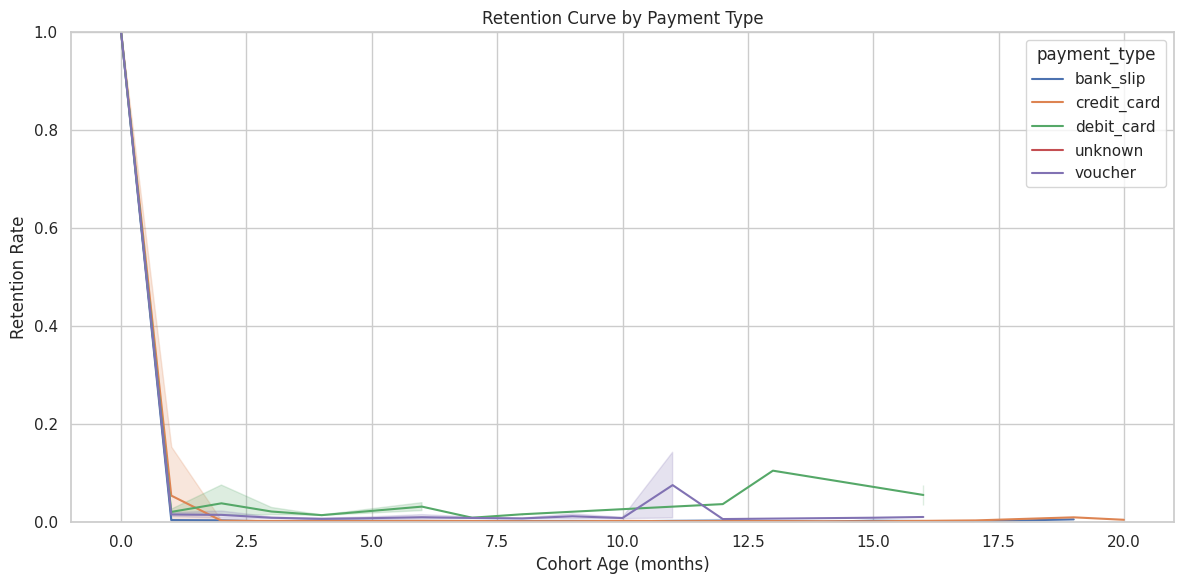

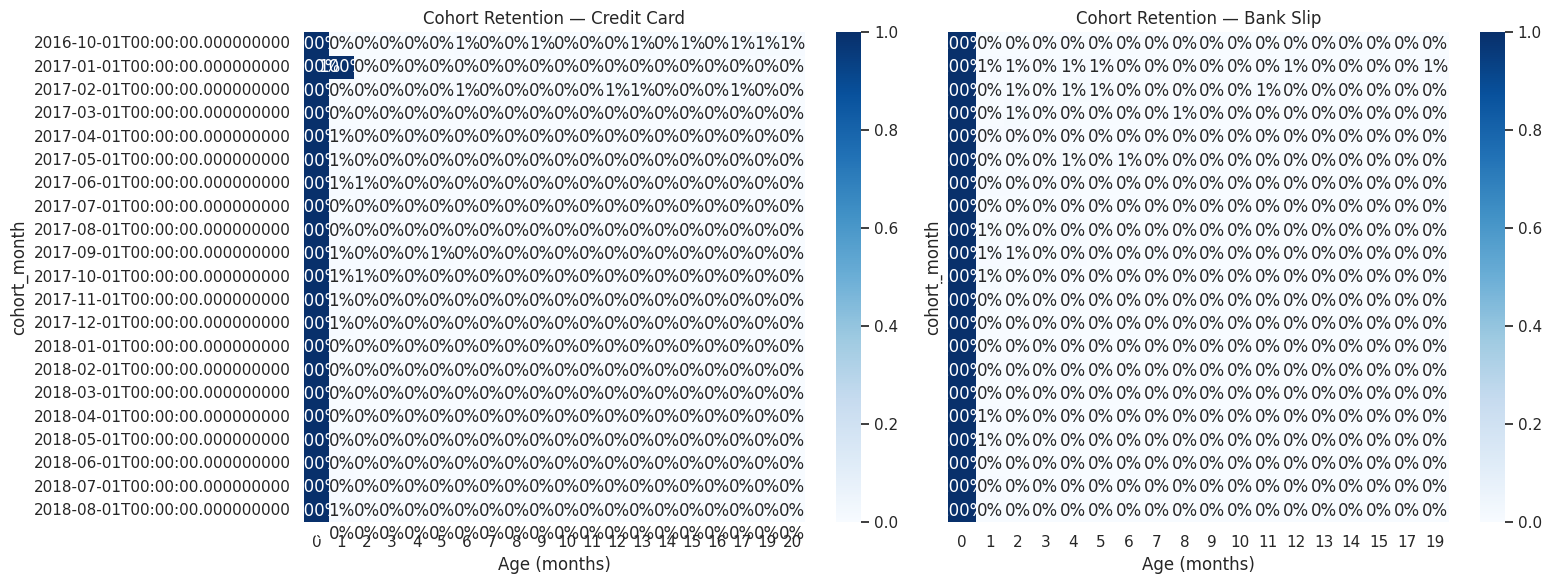

In [ ]:
# ---------------------------------------------------------------------
# 5) COHORT x PAYMENT TYPE: retention by age
# ---------------------------------------------------------------------
pay_cohort = (cohort_rfm
              .groupby(["payment_type","cohort_month","age"])["customer_unique_id"]
              .nunique()
              .reset_index(name="custs"))

base_pay = (pay_cohort[pay_cohort["age"]==0]
            [["payment_type","cohort_month","custs"]]
            .rename(columns={"custs":"cohort_size"}))

pay_ret = pay_cohort.merge(base_pay, on=["payment_type","cohort_month"], how="left")
pay_ret["retention"] = pay_ret["custs"] / pay_ret["cohort_size"]
pay_ret = pay_ret[pay_ret["cohort_size"].notna()].copy()

# --- Plot: retention curve per payment type ---
plt.figure(figsize=(12,6))
sns.lineplot(data=pay_ret, x="age", y="retention", hue="payment_type", estimator="mean")
plt.title("Retention Curve by Payment Type")
plt.xlabel("Cohort Age (months)"); plt.ylabel("Retention Rate"); plt.ylim(0,1)
plt.tight_layout(); plt.show()

# --- Heatmap: fokus Credit card vs bank_slip (boleto) ---
pay2 = pay_ret[pay_ret["payment_type"].isin(["credit_card","bank_slip"])].copy()
heat_cc = (pay2[pay2["payment_type"]=="credit_card"]
           .pivot(index="cohort_month", columns="age", values="retention")
           .fillna(0.0))
heat_bol = (pay2[pay2["payment_type"]=="bank_slip"]
            .pivot(index="cohort_month", columns="age", values="retention")
            .fillna(0.0))

fig, axes = plt.subplots(1,2, figsize=(16,6), sharey=True)
sns.heatmap(heat_cc, annot=True, fmt=".0%", cmap="Blues", ax=axes[0])
axes[0].set_title("Cohort Retention — Credit Card"); axes[0].set_xlabel("Age (months)")
sns.heatmap(heat_bol, annot=True, fmt=".0%", cmap="Blues", ax=axes[1])
axes[1].set_title("Cohort Retention — Bank Slip"); axes[1].set_xlabel("Age (months)")
plt.tight_layout(); plt.show()

In [ ]:
# ---------------------------------------------------------------------
# 6) Quick KPIs & Exports
# ---------------------------------------------------------------------
# repeat buyers share (global)
repeat_share = (ord_join.groupby("customer_unique_id")["order_id"].nunique() > 1).mean()
print(f"Repeat buyers share: {repeat_share:.2%}")

Repeat buyers share: 2.98%


In [ ]:
# Export tabel rfm dan mapping segmen
rfm_out = rfm[["customer_unique_id","recency_days","frequency","monetary",
               "R_score","F_score","M_score","RFM_sum","Segment","cluster","persona"]].copy()
rfm_out.to_csv("/content/rfm_segments.csv", index=False)

seg_summary.reset_index().to_csv("/content/segment_summary.csv", index=False)
cluster_profile.reset_index().to_csv("/content/cluster_profile.csv", index=False)

print("Saved: /content/rfm_segments.csv, /content/segment_summary.csv, /content/cluster_profile.csv")


Saved: /content/rfm_segments.csv, /content/segment_summary.csv, /content/cluster_profile.csv


# Forecasting

In [ ]:
pip install calmap

In [ ]:
%%capture
!pip install -U pip setuptools wheel cython
!pip install "numpy<2.0" "pandas<2.2" "scipy<1.13" "scikit-learn<1.4" "statsmodels<0.15"
!pip install "pmdarima==2.0.4"

# restart kernel agar C-extensions match header NumPy yg baru dipasang
import IPython
IPython.Application.instance().kernel.do_shutdown(True)


In [ ]:
# Import Libraries
import datetime
import os
import random
import re
from itertools import cycle, product

import calmap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from IPython.display import display
from keras.layers import LSTM, Dense
from keras import Sequential
from keras.backend import clear_session
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from pmdarima.arima import ARIMA as pmdARIMA
from pmdarima.arima import ADFTest, KPSSTest, auto_arima
from pmdarima.utils import diff_inv
from scipy.special import boxcox1p, inv_boxcox1p
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL
from tensorflow.keras.optimizers import Adam
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [ ]:
full_history = pd.to_datetime(orders['order_purchase_timestamp']).dt.date
start = full_history.min()
end = full_history.max()
idx = pd.date_range(start, end, normalize=True)
full_history = (
    full_history
    .value_counts(sort=False)
    .sort_index()
    .reindex(idx, fill_value=0)
)

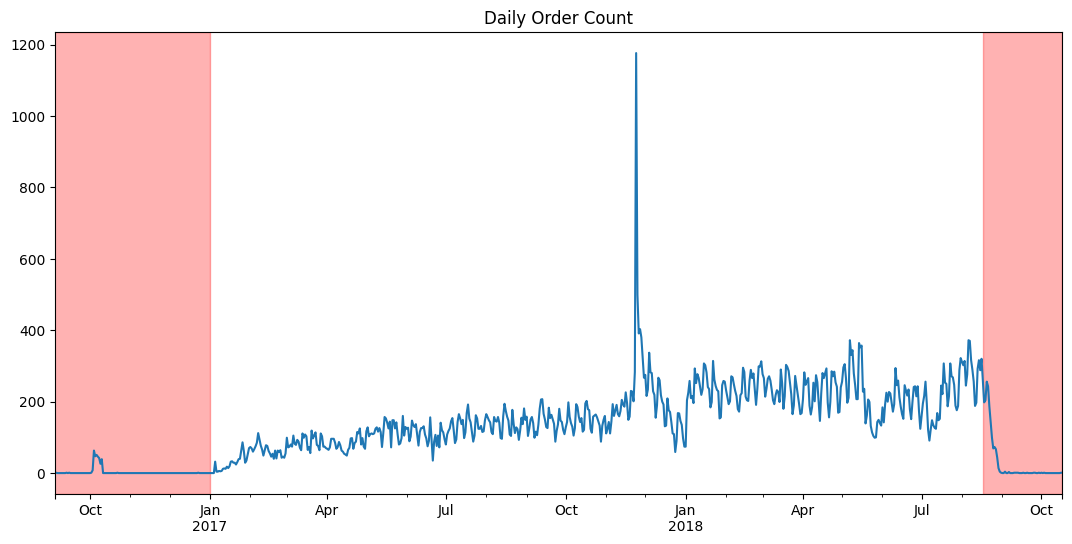

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
full_history.plot(ax=ax)
ax.axvspan(datetime.date(2016, 9, 1), datetime.date(2017, 1, 1), color='red', alpha=0.3)
ax.axvspan(datetime.date(2018, 8, 17), datetime.date(2018, 10, 17), color='red', alpha=0.3)
ax.set_title('Daily Order Count')
plt.show()

In [ ]:
# Remove outliers
history = full_history[datetime.date(2017, 1, 1): datetime.date(2018, 8, 17)]
pred_period = pd.date_range(datetime.date(2018, 8, 17), datetime.date(2018, 10, 17))

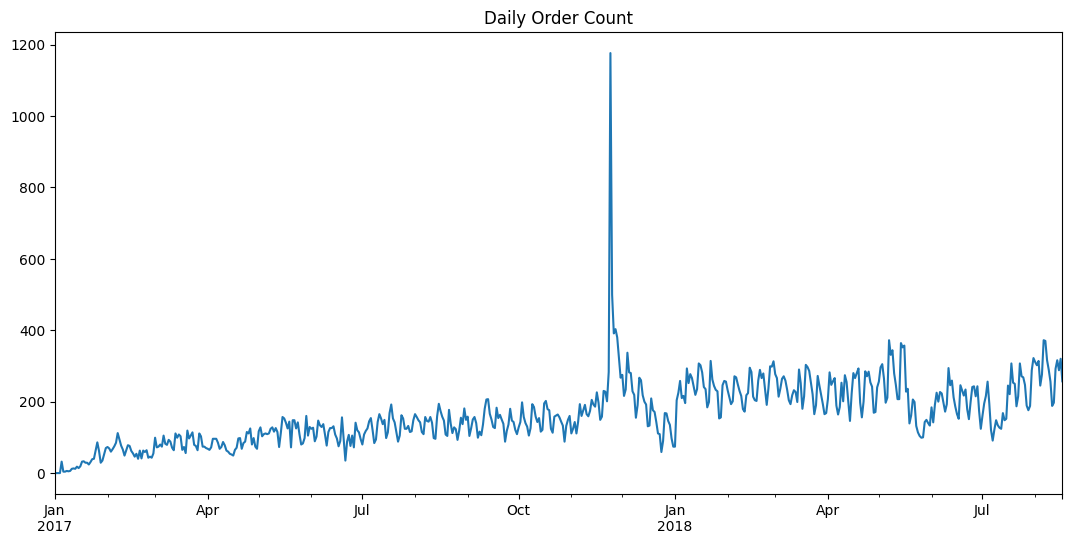

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
history.plot(ax=ax)
ax.set_title('Daily Order Count')
plt.show()

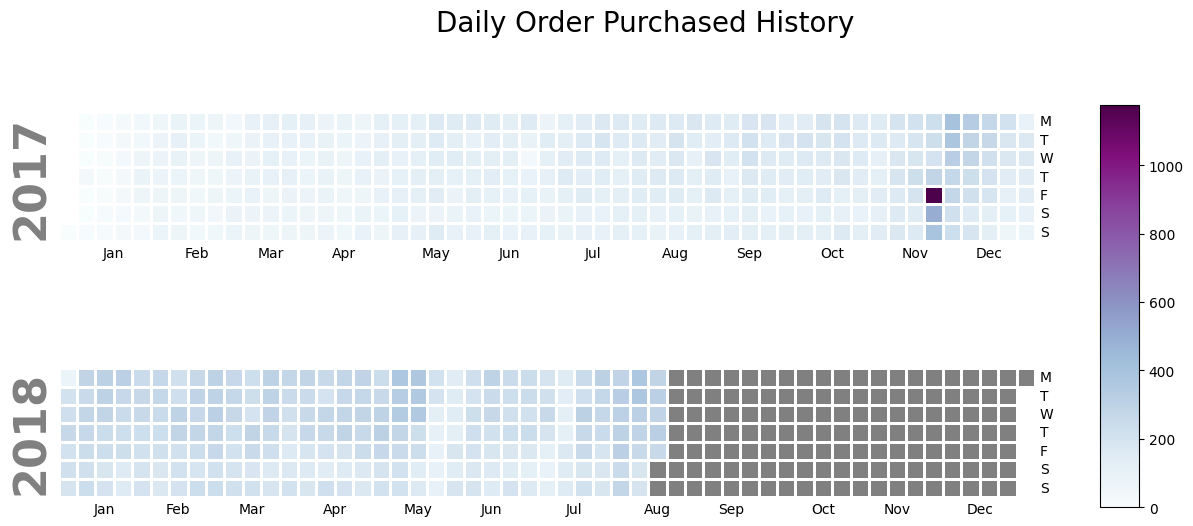

In [ ]:
fig, caxs = calmap.calendarplot(history, daylabels='MTWTFSS', fillcolor='grey', cmap='BuPu', fig_kws=dict(figsize=(13, 6)))
fig.suptitle('Daily Order Purchased History', fontsize=20)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.67])
fig.colorbar(caxs[0].get_children()[1], cax=cbar_ax)

plt.show()

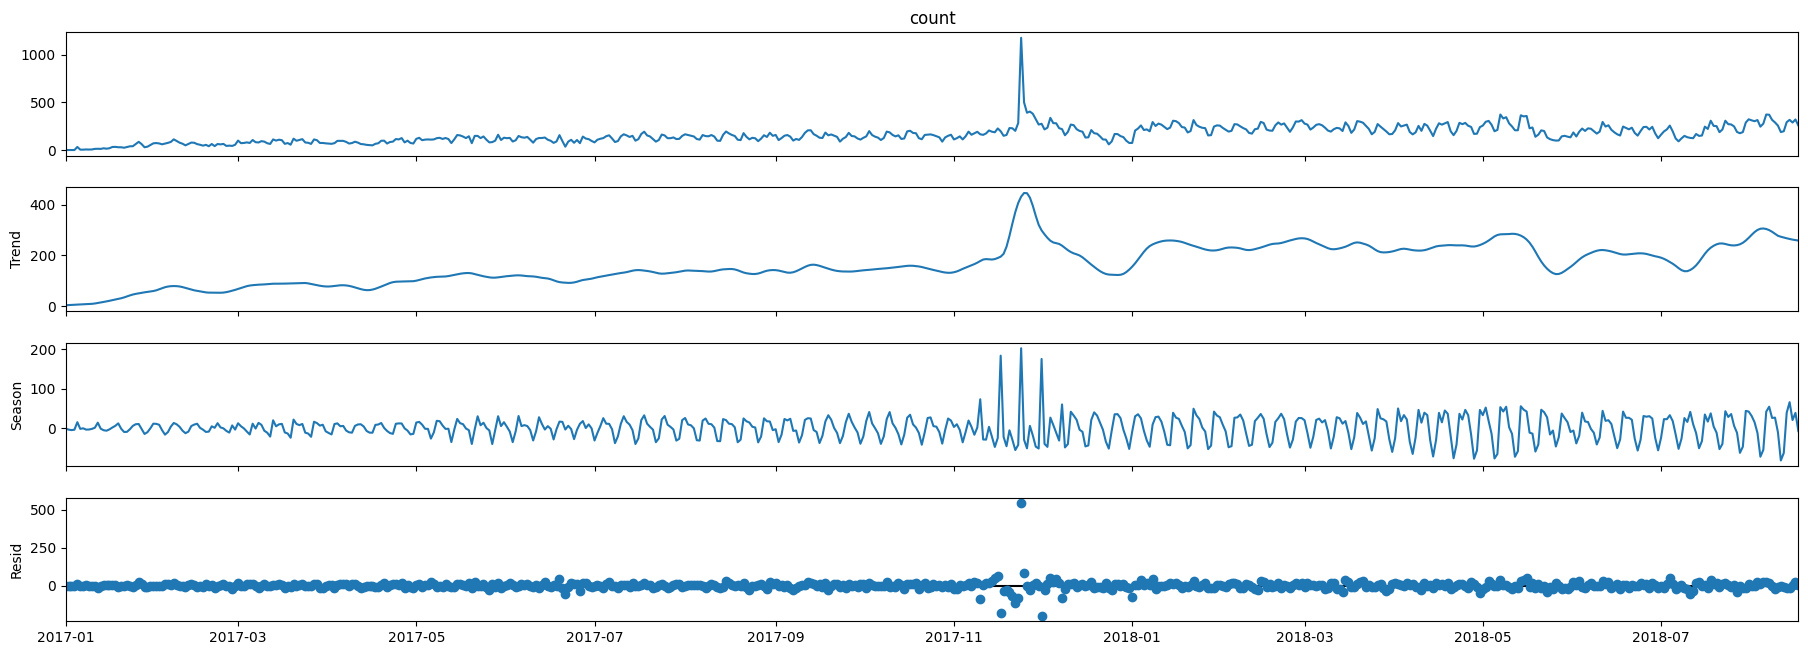

In [ ]:
stl = STL(history)
stl_res = stl.fit()
fig = stl_res.plot()
fig.set_size_inches((20, 7))
plt.show()

In [ ]:
tscv = TimeSeriesSplit(max_train_size=pred_period.shape[0], test_size=pred_period.shape[0])

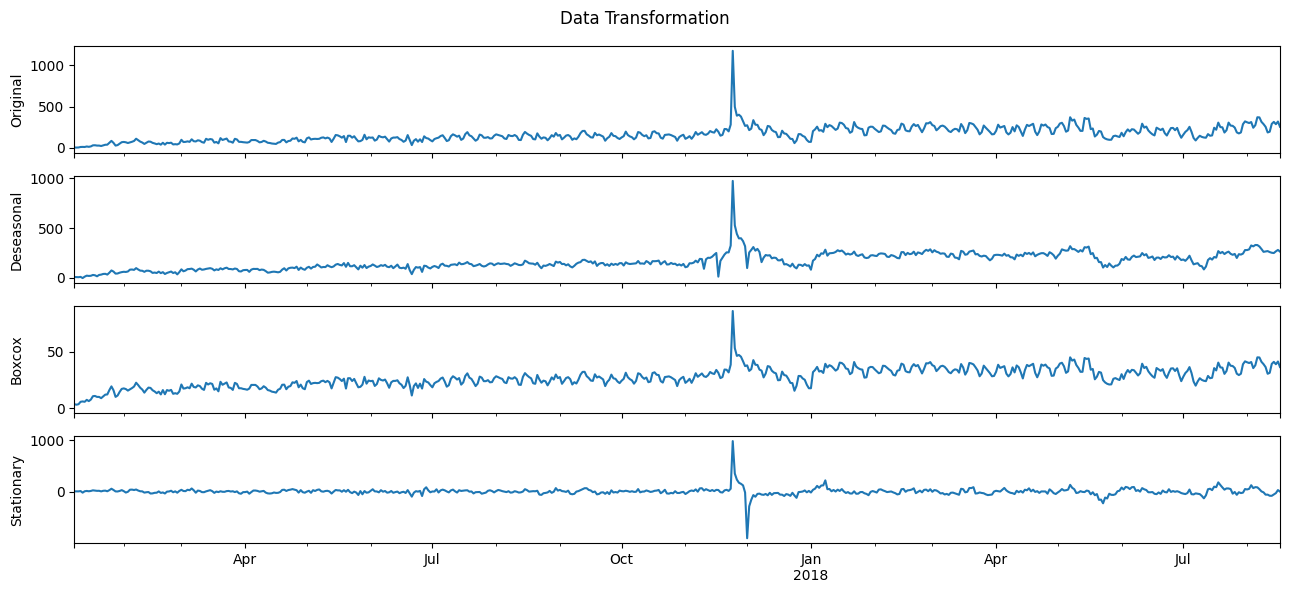

In [ ]:
stl = STL(history)
res = stl.fit()
deseasonal = res.observed - res.seasonal

bc_history, lmbda = boxcox(history+1)
bc_history = pd.Series(bc_history, index=history.index)

diff_history = history.diff(7).dropna()
xi = history.iloc[:7]

fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(13,6))
history.plot(ax=axs[0])
axs[0].set_ylabel('Original')
deseasonal.plot(ax=axs[1])
axs[1].set_ylabel('Deseasonal')
bc_history.plot(ax=axs[2])
axs[2].set_ylabel('Boxcox')
diff_history.plot(ax=axs[3])
axs[3].set_ylabel('Stationary')
fig.align_ylabels()
fig.suptitle('Data Transformation')
plt.tight_layout()
plt.show()

In [ ]:
def diff_inv_fix(x_diff, xi, lags=7):
    '''
    Quick fix for diff_inv
    pls refer: https://github.com/alkaline-ml/pmdarima/issues/410
    '''
    total_len = len(x_diff)+len(xi)
    ix = pd.date_range(xi.index[0], periods=total_len)
    inv = diff_inv(x_diff,lags, xi=xi) + np.fromiter(cycle(xi), count=total_len, dtype=float)
    inv = pd.Series(inv, index=ix, name='order_purchase_timestamp')
    return inv

# Checking Inverse Differencing is equivalent to original history data
(diff_inv_fix(diff_history, xi, 7) == history).all()

True

In [ ]:
adf = ADFTest()
adf.should_diff(history)

(0.01, False)

In [ ]:
adf.should_diff(diff_history)

(0.01, False)

In [ ]:
kpss = KPSSTest()
kpss.should_diff(history)

(0.01, True)

In [ ]:
kpss.should_diff(diff_history)

(0.1, False)

In [ ]:
result = pd.DataFrame(columns=['algo', 'mse'])
def record(algo, mse):
    global result
    new = pd.DataFrame(dict(algo=algo, mse=mse), index=[0])
    result = pd.concat([result, new], ignore_index=True)
    display(result)

In [ ]:
def plot(index, pred, mse, title, fig=None, ax=None):
    global history
    empty_fig = fig is None
    if empty_fig:
        fig, ax = plt.subplots(figsize=(13, 6))
        ax.set_title(title + ': Last Fold CV In-Sample Forecasting')
    else:
        ax.set_title(title)
        models = ['', 'STL', 'Boxcox', 'Seasonal Diff']
        ylabels = ['Original', 'Deseasonal', 'Boxcox', 'Stationary']
        for model, ylabel in zip(models, ylabels):
            if re.sub(r'[^\+]+(\s\+\s)?([^\+]+)?$', r'\g<2>', title) == model:
                ax.set_ylabel(ylabel)
    patch_ = mpatches.Patch(color='white', label=f'MSE: {np.mean(mse):.1e}')
    L1 = ax.legend(handles=[patch_], loc='upper left', fancybox=True, framealpha=0.7,  handlelength=0)
    ax.add_artist(L1)
    sns.lineplot(x=history.index, y=history, label='true', ax=ax)
    sns.lineplot(x=index, y=pred, label='pred', ax=ax)
    ax.axvline(x=index[0], color='red')
    ax.legend(loc='upper right')
    if empty_fig:
        plt.show()
    else:
        return fig

In [ ]:
figs, axs = plt.subplots(nrows=4, sharex=True, figsize=(13,6))
figs.suptitle('Last Fold CV In-Sample Forecasting')
figs.tight_layout()
plt.close()

In [ ]:
# Deep Learning Setup
MAX_EPOCHS = 25
N_FEATURES = 7
SEED = 1234

/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])
/tmp/ipython-input-744393265.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = forecast
/tmp/ipython-input-744393265.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = forecast
/tmp/ipython-input-744393265.py:17: DeprecationWarning: Conver

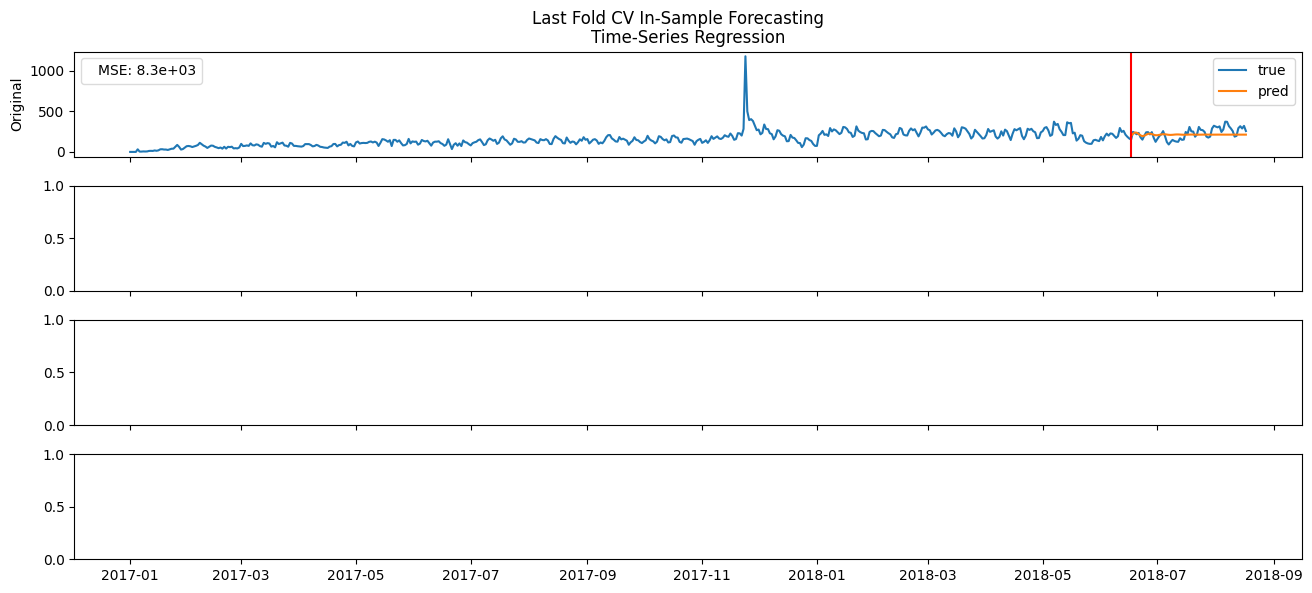

In [ ]:
title = 'Time-Series Regression'
data = history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, y_test = data.iloc[train_id], data.iloc[test_id]
    gen = TimeseriesGenerator(train, train, length=N_FEATURES, batch_size=1000)
    X_train = gen[0][0]
    y_train = gen[0][1]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    X_pred = y_train[-N_FEATURES:].reshape(1,-1)
    y_pred = np.empty(y_test.shape[0])
    for i in range(len(y_pred)):
        forecast = lr.predict(X_pred)
        X_pred = np.delete(X_pred, 0, 1)
        X_pred = np.concatenate((X_pred, forecast.reshape(-1,1)), 1)
        y_pred[i] = forecast
    mse.append(mean_squared_error(y_test, y_pred))
plot(y_test.index, y_pred, mse, title, figs, axs[0])

In [ ]:
record(algo=title, mse=np.mean(mse))

/tmp/ipython-input-3567498828.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, new], ignore_index=True)


algo          mse
0  Time-Series Regression  8334.514194

/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])
/tmp/ipython-input-624037130.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = forecast
/tmp/ipython-input-624037130.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = forecast
/tmp/ipython-input-624037130.py:17: DeprecationWarning: Conver

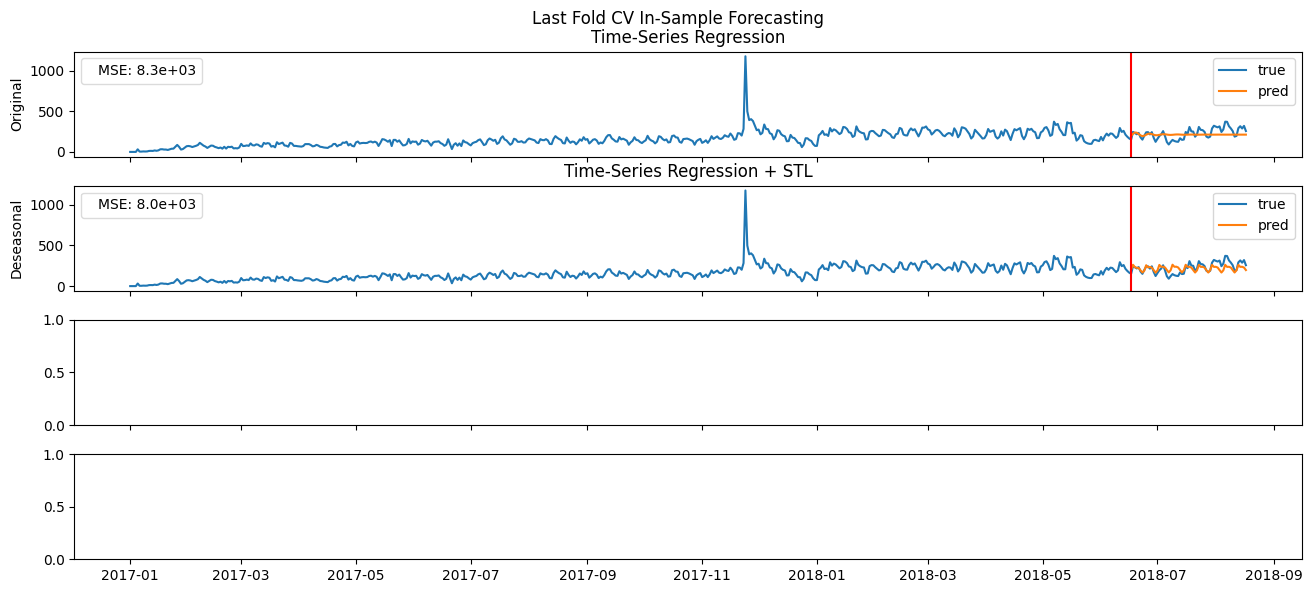

In [ ]:
title = 'Time-Series Regression + STL'
data = deseasonal.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, y_test = data.iloc[train_id], data.iloc[test_id]
    gen = TimeseriesGenerator(train, train, length=N_FEATURES, batch_size=1000)
    X_train = gen[0][0]
    y_train = gen[0][1]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    X_pred = y_train[-N_FEATURES:].reshape(1,-1)
    y_pred = np.empty(y_test.shape[0])
    for i in range(len(y_pred)):
        forecast = lr.predict(X_pred)
        X_pred = np.delete(X_pred, 0, 1)
        X_pred = np.concatenate((X_pred, forecast.reshape(-1,1)), 1)
        y_pred[i] = forecast
    last_seasonal = res.seasonal.reindex_like(train).tail(stl.period)
    y_pred = y_pred + np.fromiter(cycle(last_seasonal), count=y_pred.shape[0], dtype=float)
    y_test = y_test + res.seasonal.reindex_like(y_test)
    mse.append(mean_squared_error(y_test, y_pred))
plot(y_test.index, y_pred, mse, title, figs, axs[1])


In [ ]:
record(algo=title, mse=np.mean(mse))

algo          mse
0        Time-Series Regression  8334.514194
1  Time-Series Regression + STL  8015.765220

/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])
/tmp/ipython-input-1283899695.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = forecast
/tmp/ipython-input-1283899695.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = forecast
/tmp/ipython-input-1283899695.py:17: DeprecationWarning: Con

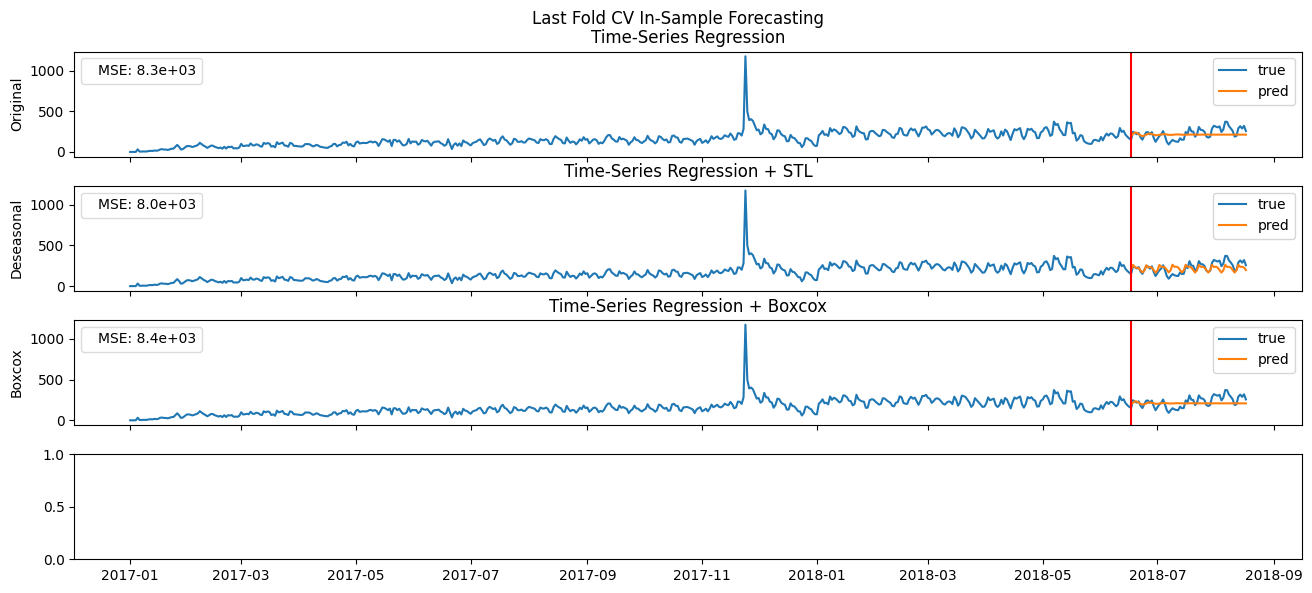

In [ ]:
title = 'Time-Series Regression + Boxcox'
data = bc_history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, y_test = data.iloc[train_id], data.iloc[test_id]
    gen = TimeseriesGenerator(train, train, length=N_FEATURES, batch_size=1000)
    X_train = gen[0][0]
    y_train = gen[0][1]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    X_pred = y_train[-N_FEATURES:].reshape(1,-1)
    y_pred = np.empty(y_test.shape[0])
    for i in range(len(y_pred)):
        forecast = lr.predict(X_pred)
        X_pred = np.delete(X_pred, 0, 1)
        X_pred = np.concatenate((X_pred, forecast.reshape(-1,1)), 1)
        y_pred[i] = forecast
    y_pred = inv_boxcox1p(y_pred, lmbda)
    y_test = inv_boxcox1p(y_test, lmbda)
    mse.append(mean_squared_error(y_test, y_pred))
plot(y_test.index, y_pred, mse, title, figs, axs[2])


In [ ]:
record(algo=title, mse=np.mean(mse))

algo          mse
0           Time-Series Regression  8334.514194
1     Time-Series Regression + STL  8015.765220
2  Time-Series Regression + Boxcox  8361.963924

/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])
/tmp/ipython-input-960942293.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = forecast
/tmp/ipython-input-960942293.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = forecast
/tmp/ipython-input-960942293.py:17: DeprecationWarning: Conver

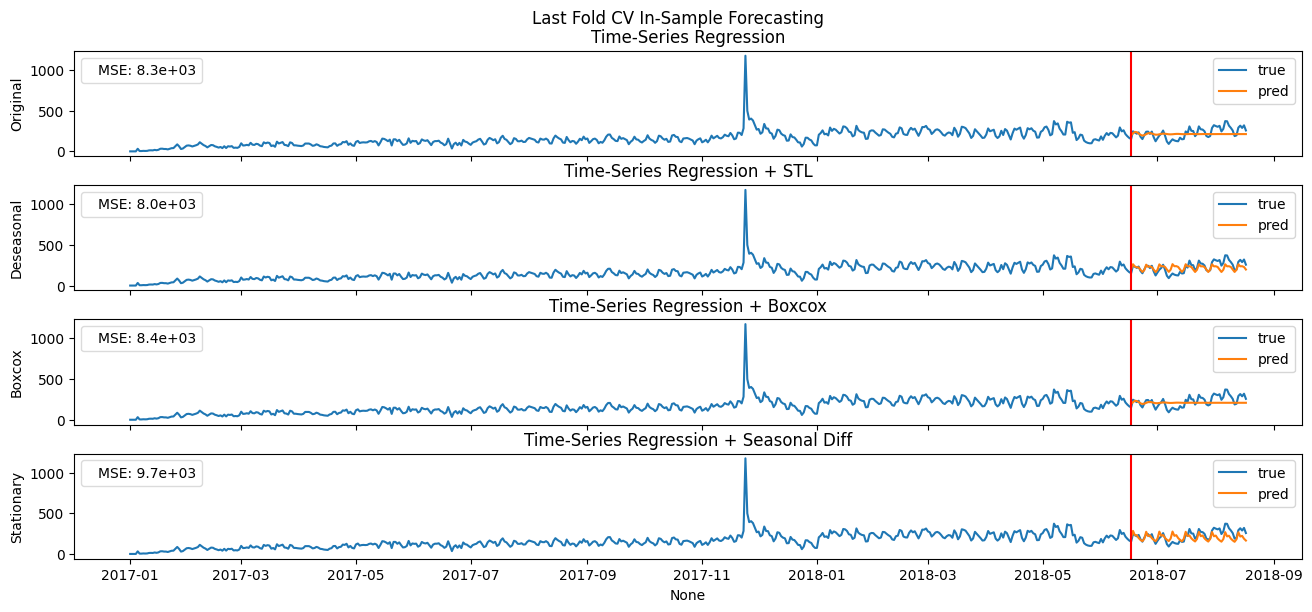

In [ ]:
title = 'Time-Series Regression + Seasonal Diff'
data = diff_history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, y_test = data.iloc[train_id], data.iloc[test_id]
    gen = TimeseriesGenerator(train, train, length=N_FEATURES, batch_size=1000)
    X_train = gen[0][0]
    y_train = gen[0][1]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    X_pred = y_train[-N_FEATURES:].reshape(1,-1)
    y_pred = np.empty(y_test.shape[0])
    for i in range(len(y_pred)):
        forecast = lr.predict(X_pred)
        X_pred = np.delete(X_pred, 0, 1)
        X_pred = np.concatenate((X_pred, forecast.reshape(-1,1)), 1)
        y_pred[i] = forecast
    xi = history.reindex_like(train).tail(N_FEATURES)
    y_pred = diff_inv_fix(y_pred, xi).iloc[N_FEATURES:]
    y_test = diff_inv_fix(y_test, xi).iloc[N_FEATURES:]
    mse.append(mean_squared_error(y_test, y_pred))
plot(data.iloc[test_id].index, y_pred, np.mean(mse), title, figs, axs[3])

In [ ]:
record(algo=title, mse=np.mean(mse))

algo          mse
0                  Time-Series Regression  8334.514194
1            Time-Series Regression + STL  8015.765220
2         Time-Series Regression + Boxcox  8361.963924
3  Time-Series Regression + Seasonal Diff  9664.568433

In [ ]:
figs, axs = plt.subplots(nrows=4, sharex=True, figsize=(13,6))
figs.suptitle('Last Fold CV In-Sample Forecasting')
figs.align_ylabels()
figs.tight_layout()
plt.close()

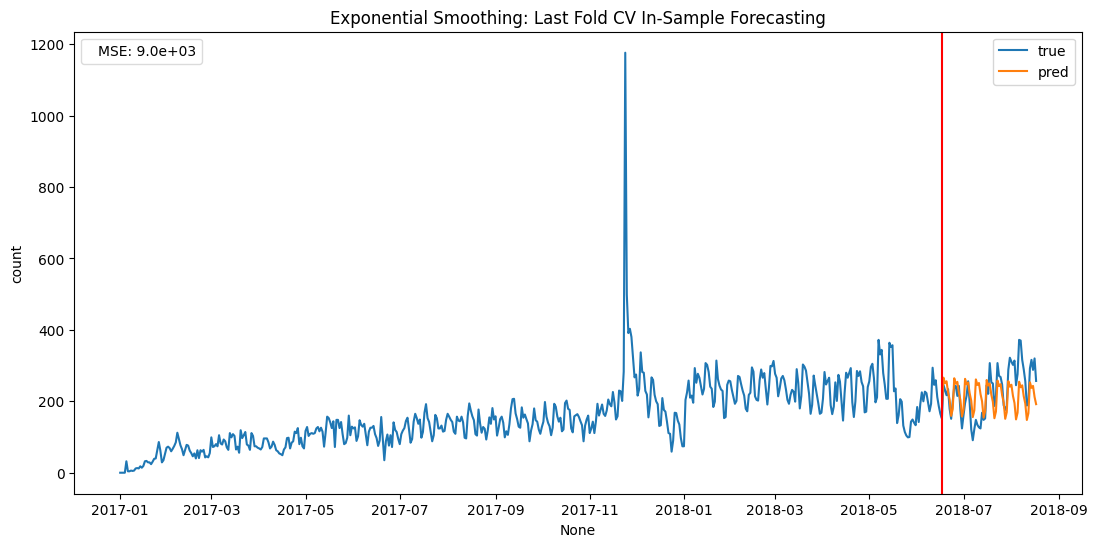

In [ ]:
title = 'Exponential Smoothing'
data = history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit(method='ls')
    pred = ES.forecast(test.shape[0])
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title)

In [ ]:
def gscv(alpha, beta, gamma):
    global history
    data = history.copy()
    mse = []
    for train_id, test_id in tscv.split(data):
        train, test = data.iloc[train_id], data.iloc[test_id]
        ES = (
            ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
            .fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, method='ls')
        )
        pred = ES.forecast(test.shape[0])
        mse.append(mean_squared_error(pred, test))
    return np.mean(mse)

alphas = betas = gammas = np.arange(1, step=0.1)
tuning = pd.DataFrame(product(alphas, betas, gammas), columns=['alpha', 'beta', 'gamma'])
tuning

alpha  beta  gamma
0      0.0   0.0    0.0
1      0.0   0.0    0.1
2      0.0   0.0    0.2
3      0.0   0.0    0.3
4      0.0   0.0    0.4
..     ...   ...    ...
995    0.9   0.9    0.5
996    0.9   0.9    0.6
997    0.9   0.9    0.7
998    0.9   0.9    0.8
999    0.9   0.9    0.9

[1000 rows x 3 columns]

In [ ]:
%%time
tuning['mse'] = tuning.apply(lambda x: gscv(x.alpha, x.beta, x.gamma), axis=1)

CPU times: user 47.4 s, sys: 55.5 ms, total: 47.4 s
Wall time: 47.7 s


In [ ]:
tuning.query('mse == mse.min()')

alpha  beta  gamma          mse
208    0.2   0.0    0.8  7571.135916

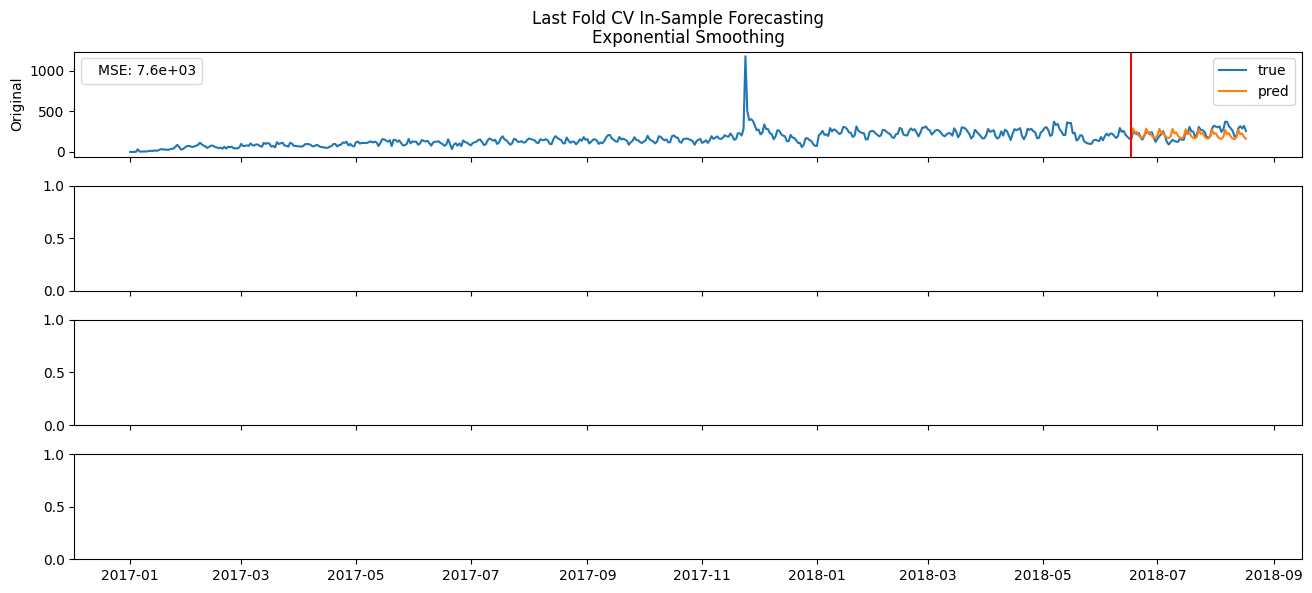

In [ ]:
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = (
        ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
        .fit(smoothing_level=0.2, smoothing_trend=0, smoothing_seasonal=0.8, method='ls')
    )
    pred = ES.forecast(test.shape[0])
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[0])

In [ ]:
record(algo=title, mse=np.mean(mse))

algo          mse
0                  Time-Series Regression  8334.514194
1            Time-Series Regression + STL  8015.765220
2         Time-Series Regression + Boxcox  8361.963924
3  Time-Series Regression + Seasonal Diff  9664.568433
4                   Exponential Smoothing  7571.135916

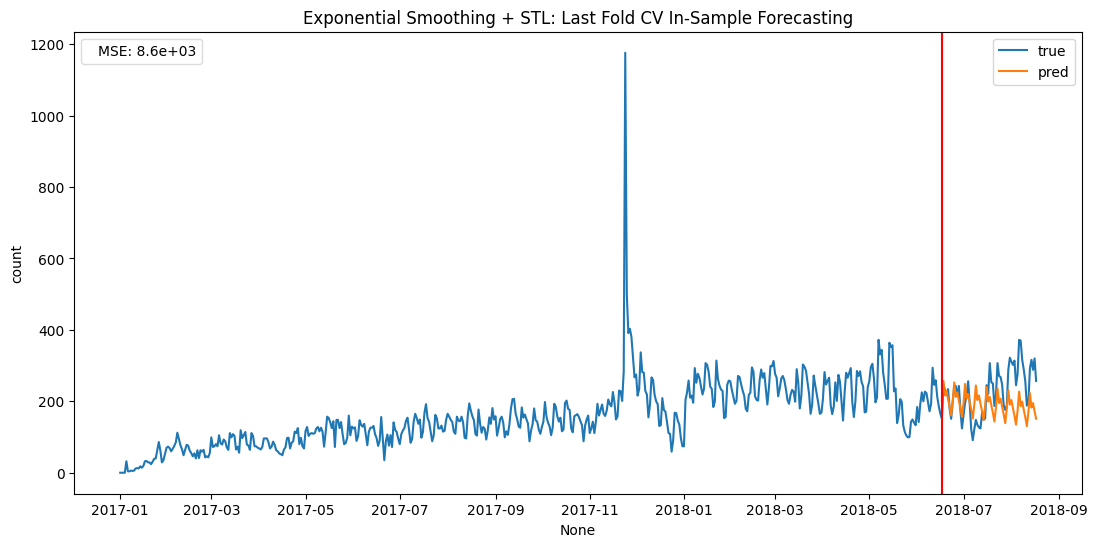

In [ ]:
title = 'Exponential Smoothing + STL'
data = history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = ExponentialSmoothing
    model_kwargs = dict(trend='add', seasonal='add', seasonal_periods=7)
    fit_kwargs = dict(method='ls')
    stlf = STLForecast(train, ES, model_kwargs=model_kwargs).fit(fit_kwargs=fit_kwargs)
    pred = stlf.forecast(test.shape[0])
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title)


In [ ]:
def gscv(alpha, beta, gamma):
    global history
    data = history.copy()
    mse = []
    for train_id, test_id in tscv.split(data):
        train, test = data.iloc[train_id], data.iloc[test_id]
        ES = ExponentialSmoothing
        model_kwargs = dict(trend='add', seasonal='add', seasonal_periods=7)
        fit_kwargs = dict(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, method='ls')
        stlf = STLForecast(train, ES, model_kwargs=model_kwargs).fit(fit_kwargs=fit_kwargs)
        pred = stlf.forecast(test.shape[0])
        mse.append(mean_squared_error(pred, test))
    return np.mean(mse)

alphas = betas = gammas = np.arange(1, step=0.1)
tuning = pd.DataFrame(product(alphas, betas, gammas), columns=['alpha', 'beta', 'gamma'])
tuning

alpha  beta  gamma
0      0.0   0.0    0.0
1      0.0   0.0    0.1
2      0.0   0.0    0.2
3      0.0   0.0    0.3
4      0.0   0.0    0.4
..     ...   ...    ...
995    0.9   0.9    0.5
996    0.9   0.9    0.6
997    0.9   0.9    0.7
998    0.9   0.9    0.8
999    0.9   0.9    0.9

[1000 rows x 3 columns]

In [ ]:
%%time
tuning['mse'] = tuning.apply(lambda x: gscv(x.alpha, x.beta, x.gamma), axis=1)

CPU times: user 55.4 s, sys: 59.6 ms, total: 55.5 s
Wall time: 58.7 s


In [ ]:
tuning.query('mse == mse.min()')

alpha  beta  gamma          mse
208    0.2   0.0    0.8  7620.672864

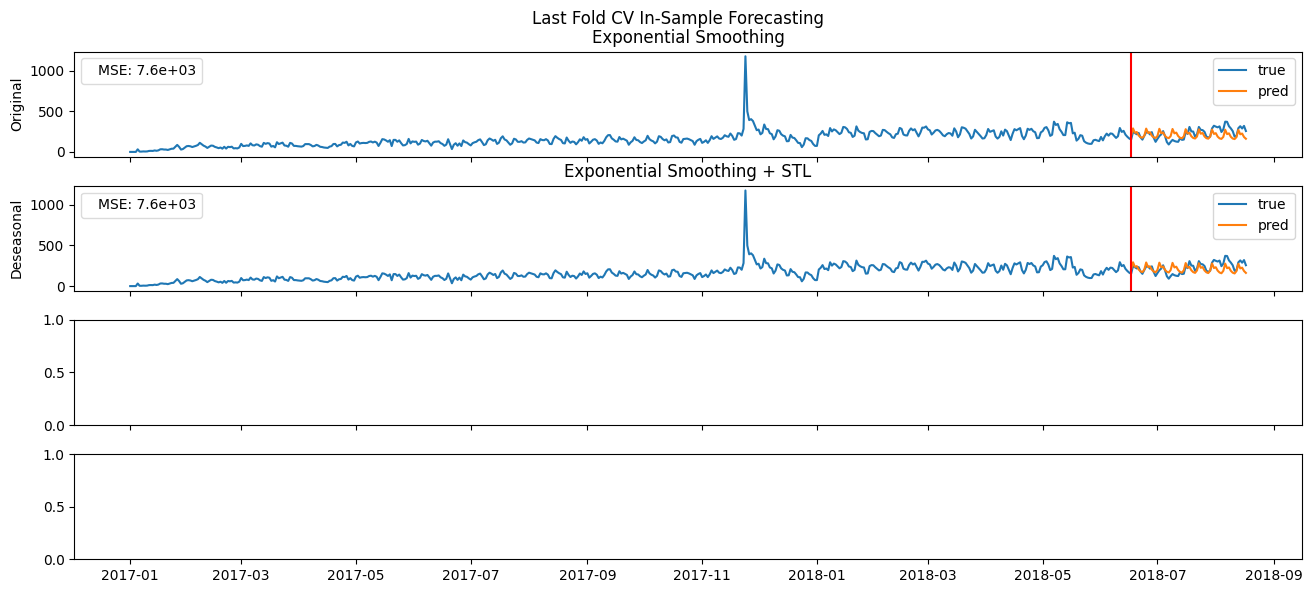

In [ ]:
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = ExponentialSmoothing
    model_kwargs = dict(trend='add', seasonal='add', seasonal_periods=7)
    fit_kwargs = dict(smoothing_level=0.2, smoothing_trend=0, smoothing_seasonal=0.8, method='ls')
    stlf = STLForecast(train, ES, model_kwargs=model_kwargs).fit(fit_kwargs=fit_kwargs)
    pred = stlf.forecast(test.shape[0])
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[1])

In [ ]:
record(algo=title, mse=np.mean(mse))

algo          mse
0                  Time-Series Regression  8334.514194
1            Time-Series Regression + STL  8015.765220
2         Time-Series Regression + Boxcox  8361.963924
3  Time-Series Regression + Seasonal Diff  9664.568433
4                   Exponential Smoothing  7571.135916
5             Exponential Smoothing + STL  7620.672864

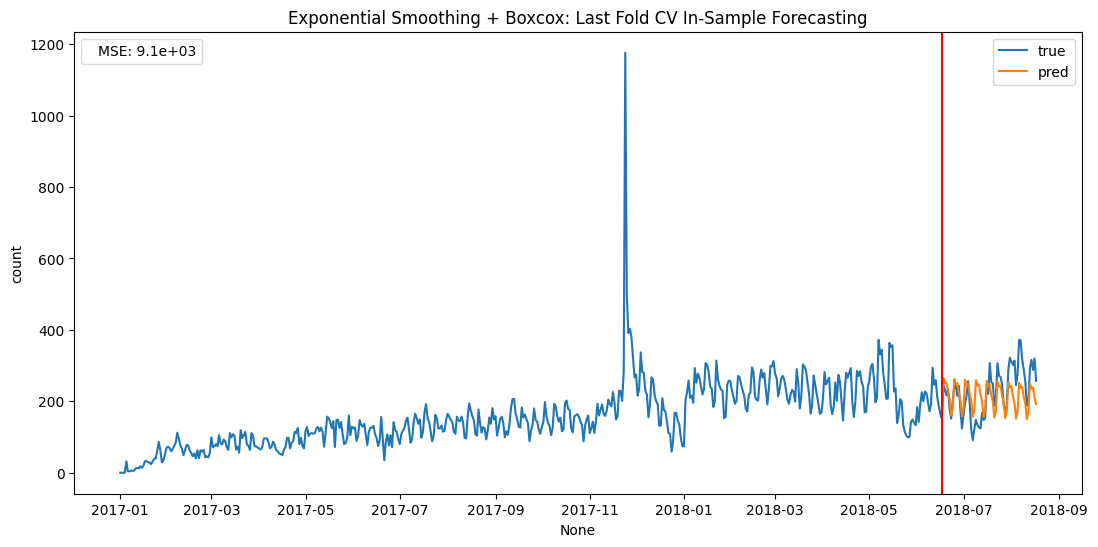

In [ ]:
title = 'Exponential Smoothing + Boxcox'
data = bc_history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = (
        ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
        .fit(method='ls')
    )
    pred = ES.forecast(test.shape[0])
    pred = inv_boxcox1p(pred, lmbda)
    test = inv_boxcox1p(test, lmbda)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title)

In [ ]:
def gscv(alpha, beta, gamma):
    global bc_history
    data = bc_history.copy()
    mse = []
    for train_id, test_id in tscv.split(data):
        train, test = data.iloc[train_id], data.iloc[test_id]
        ES = (
            ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
            .fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, method='ls')
        )
        pred = ES.forecast(test.shape[0])
        pred = inv_boxcox1p(pred, lmbda)
        test = inv_boxcox1p(test, lmbda)
        try:
            mse.append(mean_squared_error(pred, test))
        except ValueError:
            return np.nan
    return np.mean(mse)

alphas = betas = gammas = np.arange(1, step=0.1)
tuning = pd.DataFrame(product(alphas, betas, gammas), columns=['alpha', 'beta', 'gamma'])
tuning

alpha  beta  gamma
0      0.0   0.0    0.0
1      0.0   0.0    0.1
2      0.0   0.0    0.2
3      0.0   0.0    0.3
4      0.0   0.0    0.4
..     ...   ...    ...
995    0.9   0.9    0.5
996    0.9   0.9    0.6
997    0.9   0.9    0.7
998    0.9   0.9    0.8
999    0.9   0.9    0.9

[1000 rows x 3 columns]

In [ ]:
%%time
tuning['mse'] = tuning.apply(lambda x: gscv(x.alpha, x.beta, x.gamma), axis=1)

CPU times: user 46.3 s, sys: 73.6 ms, total: 46.4 s
Wall time: 1min


In [ ]:
tuning.query('mse == mse.min()')

alpha  beta  gamma          mse
209    0.2   0.0    0.9  7574.385797

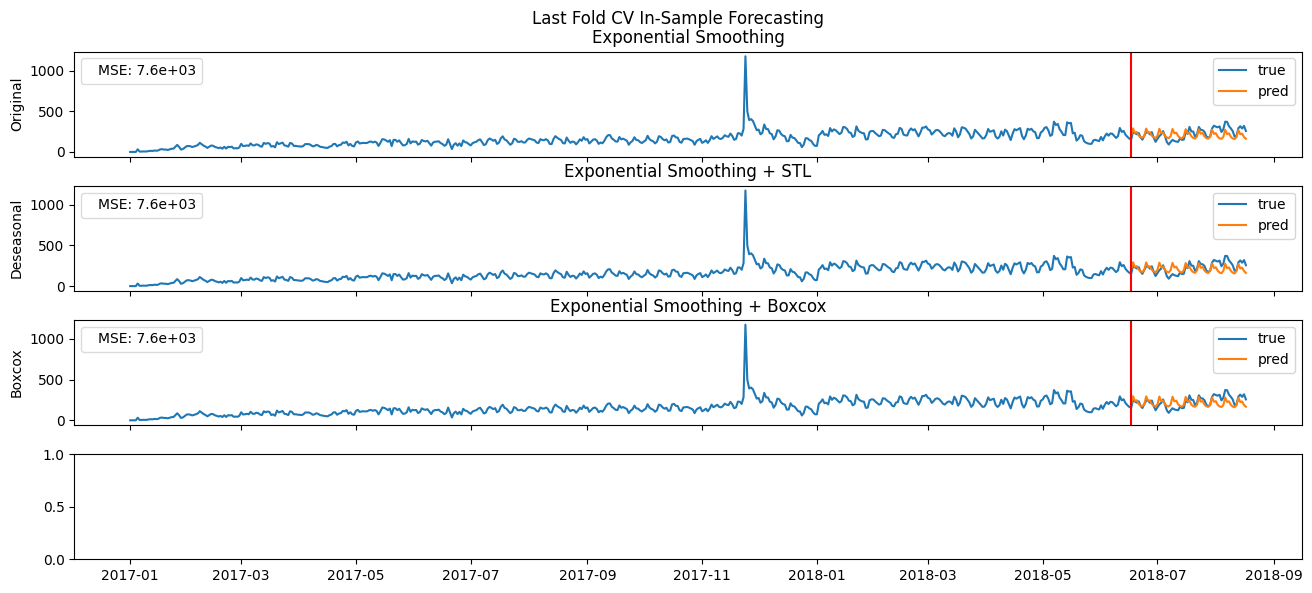

In [ ]:
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = (
        ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
        .fit(smoothing_level=0.2, smoothing_trend=0, smoothing_seasonal=0.9, method='ls')
    )
    pred = ES.forecast(test.shape[0])
    pred = inv_boxcox1p(pred, lmbda)
    test = inv_boxcox1p(test, lmbda)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[2])

In [ ]:
record(algo=title, mse=np.mean(mse))

algo          mse
0                  Time-Series Regression  8334.514194
1            Time-Series Regression + STL  8015.765220
2         Time-Series Regression + Boxcox  8361.963924
3  Time-Series Regression + Seasonal Diff  9664.568433
4                   Exponential Smoothing  7571.135916
5             Exponential Smoothing + STL  7620.672864
6          Exponential Smoothing + Boxcox  7574.385797

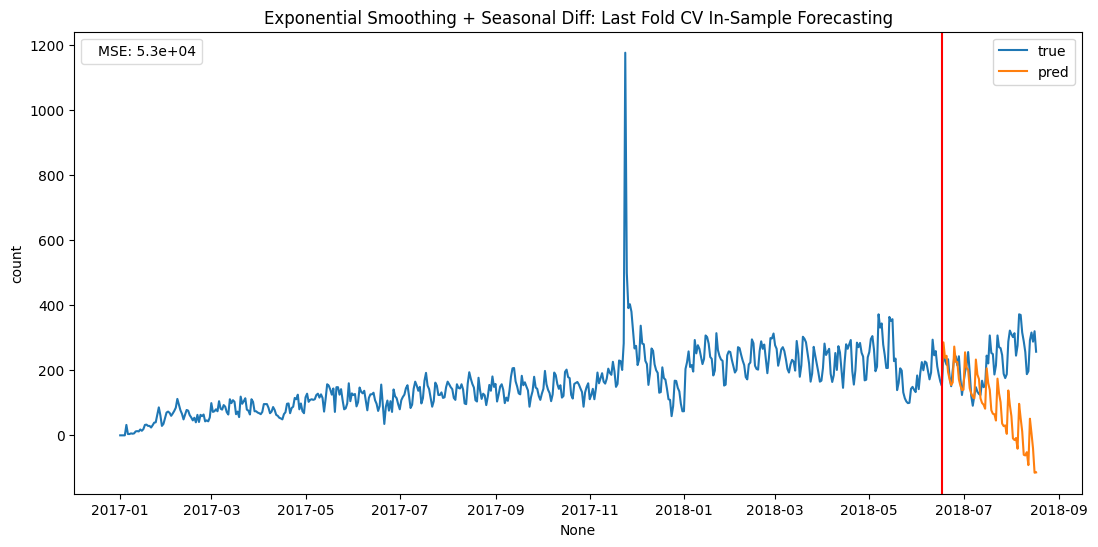

In [ ]:
title = 'Exponential Smoothing + Seasonal Diff'
data = diff_history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = (
        ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
        .fit(method='ls')
    )
    pred = ES.forecast(test.shape[0])
    xi = history.reindex_like(train).tail(N_FEATURES)
    pred = diff_inv_fix(pred, xi).iloc[N_FEATURES:]
    test = diff_inv_fix(test, xi).iloc[N_FEATURES:]
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title)

In [ ]:
def gscv(alpha, beta, gamma):
    global diff_history
    data = diff_history.copy()
    mse = []
    for train_id, test_id in tscv.split(data):
        train, test = data.iloc[train_id], data.iloc[test_id]
        ES = (
            ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
            .fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, method='ls')
        )
        pred = ES.forecast(test.shape[0])
        xi = history.reindex_like(train).tail(N_FEATURES)
        pred = diff_inv_fix(pred, xi).iloc[N_FEATURES:]
        test = diff_inv_fix(test, xi).iloc[N_FEATURES:]
        mse.append(mean_squared_error(pred, test))
    return np.mean(mse)

alphas = betas = gammas = np.arange(1, step=0.1)
tuning = pd.DataFrame(product(alphas, betas, gammas), columns=['alpha', 'beta', 'gamma'])
tuning

alpha  beta  gamma
0      0.0   0.0    0.0
1      0.0   0.0    0.1
2      0.0   0.0    0.2
3      0.0   0.0    0.3
4      0.0   0.0    0.4
..     ...   ...    ...
995    0.9   0.9    0.5
996    0.9   0.9    0.6
997    0.9   0.9    0.7
998    0.9   0.9    0.8
999    0.9   0.9    0.9

[1000 rows x 3 columns]

In [ ]:
%%time
tuning['mse'] = tuning.apply(lambda x: gscv(x.alpha, x.beta, x.gamma), axis=1)

CPU times: user 1min 19s, sys: 129 ms, total: 1min 19s
Wall time: 1min 41s


In [ ]:
tuning.query('mse == mse.min()')

alpha  beta  gamma           mse
0    0.0   0.0    0.0  15305.015701

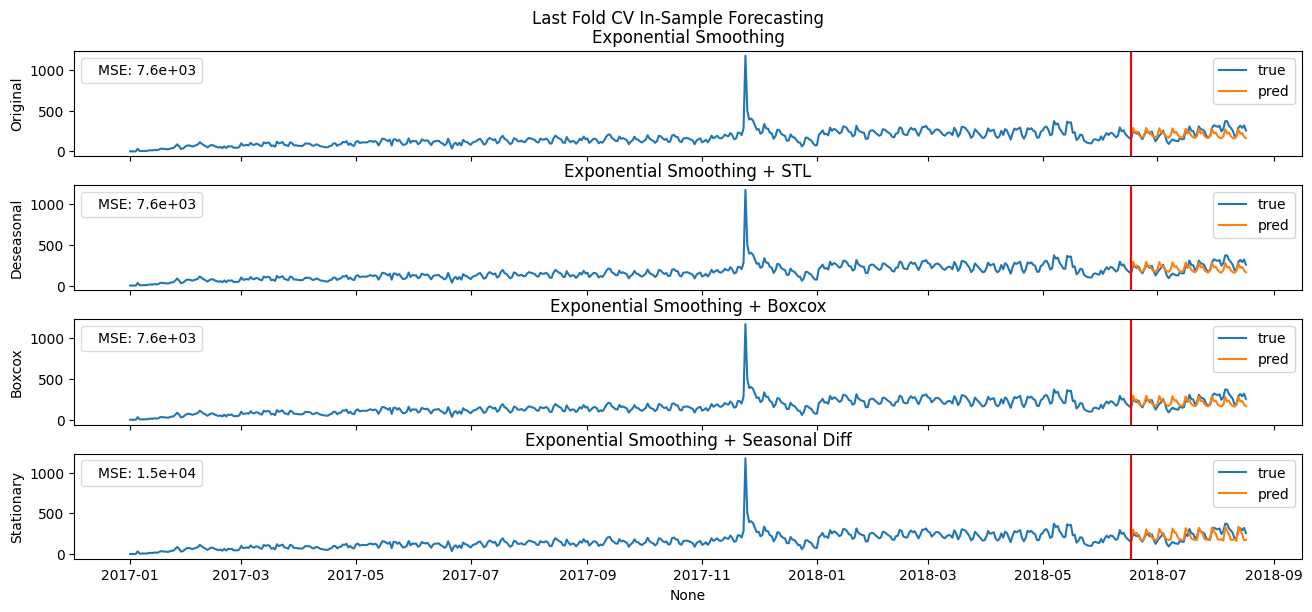

In [ ]:
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    ES = (
        ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
        .fit(smoothing_level=0, smoothing_trend=0.1, smoothing_seasonal=0, method='ls')
    )
    pred = ES.forecast(test.shape[0])
    xi = history.reindex_like(train).tail(N_FEATURES)
    pred = diff_inv_fix(pred, xi).iloc[N_FEATURES:]
    test = diff_inv_fix(test, xi).iloc[N_FEATURES:]
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[3])

In [ ]:
record(algo=title, mse=np.mean(mse))


algo           mse
0                  Time-Series Regression   8334.514194
1            Time-Series Regression + STL   8015.765220
2         Time-Series Regression + Boxcox   8361.963924
3  Time-Series Regression + Seasonal Diff   9664.568433
4                   Exponential Smoothing   7571.135916
5             Exponential Smoothing + STL   7620.672864
6          Exponential Smoothing + Boxcox   7574.385797
7   Exponential Smoothing + Seasonal Diff  15305.018516

In [ ]:
figs, axs = plt.subplots(nrows=4, sharex=True, figsize=(13,6))
figs.suptitle('Last Fold CV In-Sample Forecasting')
figs.align_ylabels()
figs.tight_layout()
plt.close()

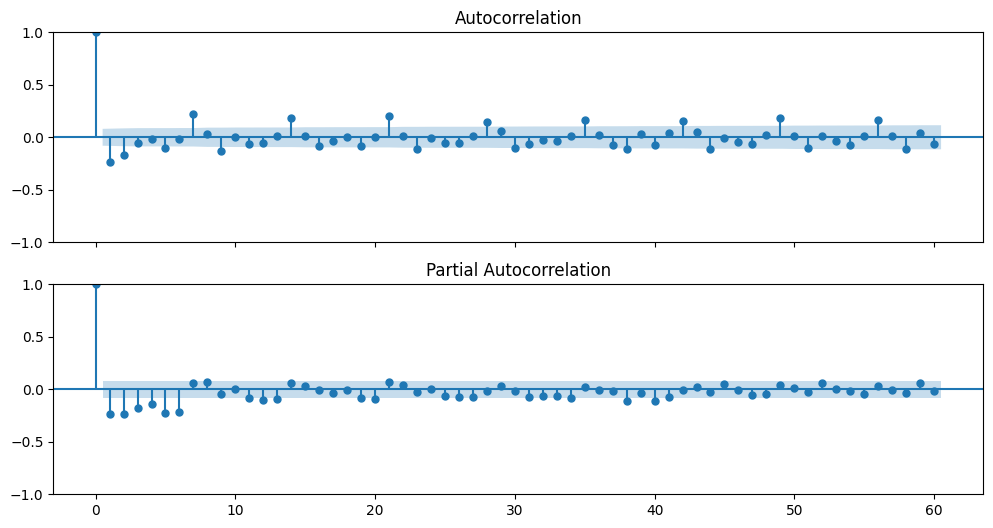

In [ ]:
fig, ax = plt.subplots(2, figsize=(12, 6), sharex=True)
plot_acf(history.diff().dropna(), ax=ax[0], lags=60)
plot_pacf(history.diff().dropna(), ax=ax[1], lags=60)
plt.show()

In [ ]:
%%time
data = history.copy()
aa = auto_arima(data, m=7)
aa

CPU times: user 1min, sys: 43.4 s, total: 1min 43s
Wall time: 1min


ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 0, 2, 7),
      suppress_warnings=True)

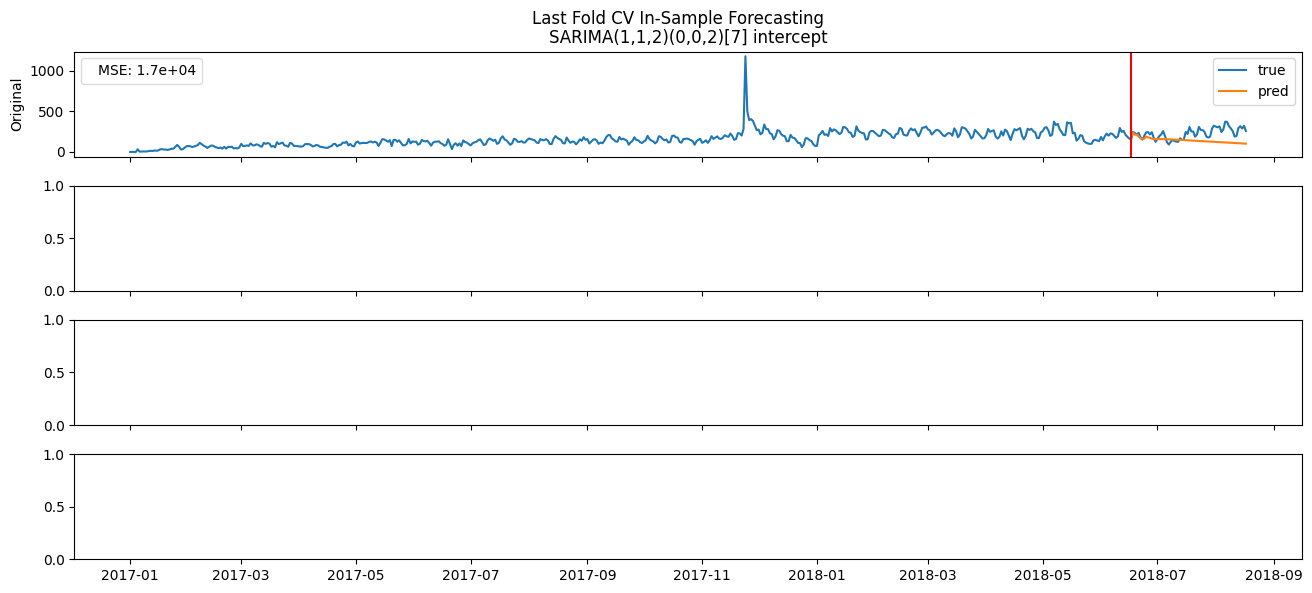

In [ ]:
mse = []
if aa.seasonal_order[-1] == 0:
    title = f'ARIMA{aa.order}'
else:
    title = 'S' + aa.__str__().strip()
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    aa.fit(train)
    pred = aa.predict(test.shape[0])
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[0])

In [ ]:
record(algo='Auto ARIMA', mse=np.mean(mse))

algo           mse
0                  Time-Series Regression   8334.514194
1            Time-Series Regression + STL   8015.765220
2         Time-Series Regression + Boxcox   8361.963924
3  Time-Series Regression + Seasonal Diff   9664.568433
4                   Exponential Smoothing   7571.135916
5             Exponential Smoothing + STL   7620.672864
6          Exponential Smoothing + Boxcox   7574.385797
7   Exponential Smoothing + Seasonal Diff  15305.018516
8                              Auto ARIMA  17063.124523

In [ ]:
%%time
data = deseasonal.copy()
aa = auto_arima(data, seasonal=False)
aa

CPU times: user 7.53 s, sys: 6.75 s, total: 14.3 s
Wall time: 12.8 s


ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True)

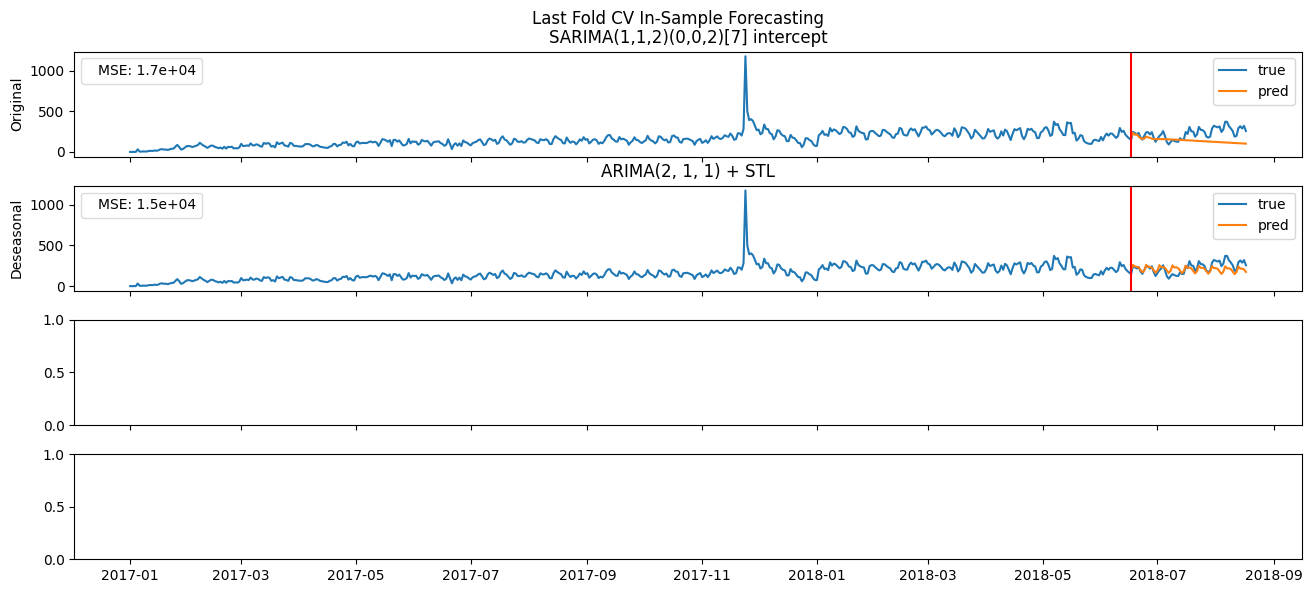

In [ ]:
mse = []
if aa.seasonal_order[-1] == 0:
    title = f'ARIMA{aa.order} + STL'
else:
    title = 'S' + aa.__str__().strip() + ' + STL'
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    aa.fit(train)
    pred = aa.predict(test.shape[0])
    last_seasonal = res.seasonal.reindex_like(train).tail(stl.period)
    pred = pred + np.fromiter(cycle(last_seasonal), count=pred.shape[0], dtype=float)
    test = test + res.seasonal.reindex_like(test)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[1])

In [ ]:
record(algo='Auto ARIMA + STL', mse=np.mean(mse))

algo           mse
0                  Time-Series Regression   8334.514194
1            Time-Series Regression + STL   8015.765220
2         Time-Series Regression + Boxcox   8361.963924
3  Time-Series Regression + Seasonal Diff   9664.568433
4                   Exponential Smoothing   7571.135916
5             Exponential Smoothing + STL   7620.672864
6          Exponential Smoothing + Boxcox   7574.385797
7   Exponential Smoothing + Seasonal Diff  15305.018516
8                              Auto ARIMA  17063.124523
9                        Auto ARIMA + STL  15493.928189

In [ ]:
%%time
data = bc_history.copy()
aa = auto_arima(data, m=7)
aa

CPU times: user 1min 45s, sys: 1min 23s, total: 3min 8s
Wall time: 2min 54s


ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

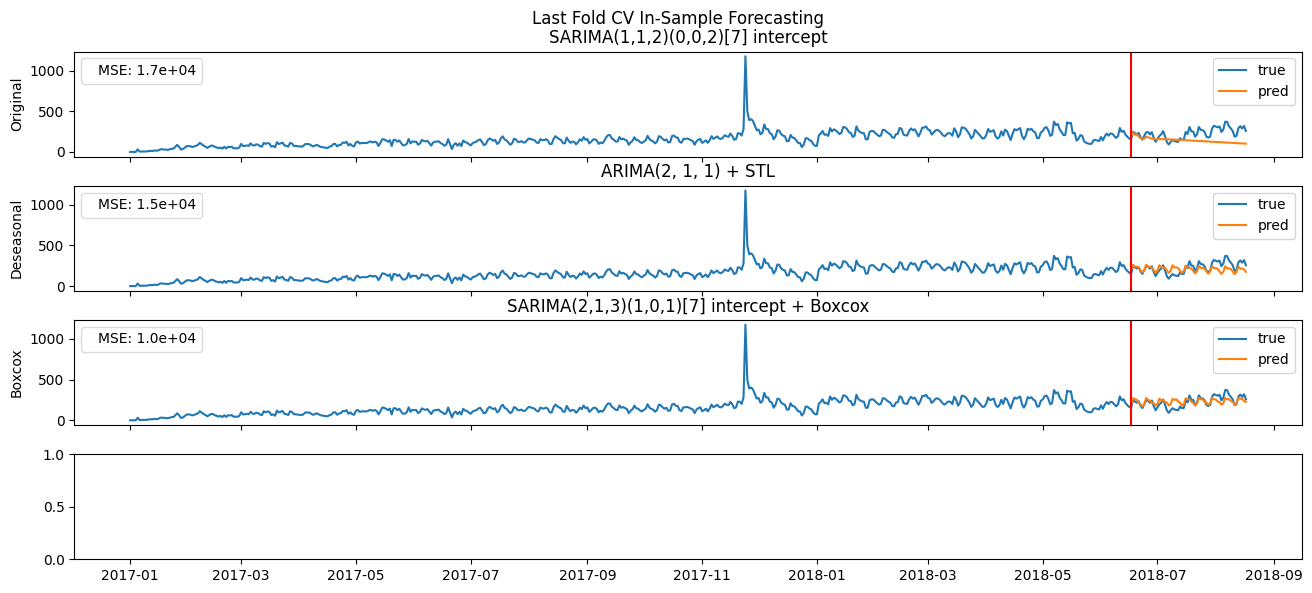

In [ ]:
mse = []
if aa.seasonal_order[-1] == 0:
    title = f'ARIMA{aa.order} + Boxcox'
else:
    title = 'S' + aa.__str__().strip() + ' + Boxcox'
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    aa.fit(train)
    pred = aa.predict(test.shape[0])
    pred = inv_boxcox1p(pred, lmbda)
    test = inv_boxcox1p(test, lmbda)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[2])

In [ ]:
record(algo='Auto ARIMA + Boxcox', mse=np.mean(mse))

algo           mse
0                   Time-Series Regression   8334.514194
1             Time-Series Regression + STL   8015.765220
2          Time-Series Regression + Boxcox   8361.963924
3   Time-Series Regression + Seasonal Diff   9664.568433
4                    Exponential Smoothing   7571.135916
5              Exponential Smoothing + STL   7620.672864
6           Exponential Smoothing + Boxcox   7574.385797
7    Exponential Smoothing + Seasonal Diff  15305.018516
8                               Auto ARIMA  17063.124523
9                         Auto ARIMA + STL  15493.928189
10                     Auto ARIMA + Boxcox  10255.590852

In [ ]:
%%time
data = diff_history.copy()
aa = auto_arima(data, seasonal=False)
aa

CPU times: user 20.7 s, sys: 17.8 s, total: 38.5 s
Wall time: 38.4 s


ARIMA(order=(4, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

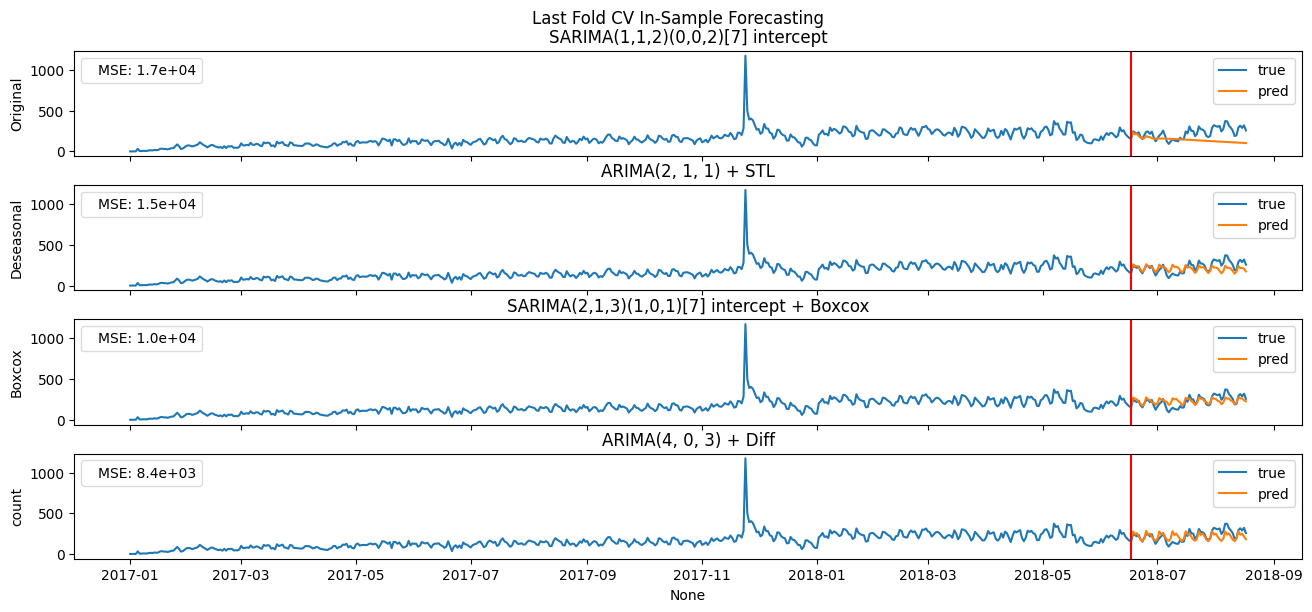

In [ ]:
mse = []
if aa.seasonal_order[-1] == 0:
    title = f'ARIMA{aa.order} + Diff'
else:
    title = 'S' + aa.__str__().strip() + ' + Diff'
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]
    aa.fit(train)
    pred = aa.predict(test.shape[0])
    xi = history.reindex_like(train).tail(N_FEATURES)
    pred = diff_inv_fix(pred, xi).iloc[N_FEATURES:]
    test = diff_inv_fix(test, xi).iloc[N_FEATURES:]
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[3])

In [ ]:
record(algo='Auto ARIMA + Seasonal Diff', mse=np.mean(mse))

algo           mse
0                   Time-Series Regression   8334.514194
1             Time-Series Regression + STL   8015.765220
2          Time-Series Regression + Boxcox   8361.963924
3   Time-Series Regression + Seasonal Diff   9664.568433
4                    Exponential Smoothing   7571.135916
5              Exponential Smoothing + STL   7620.672864
6           Exponential Smoothing + Boxcox   7574.385797
7    Exponential Smoothing + Seasonal Diff  15305.018516
8                               Auto ARIMA  17063.124523
9                         Auto ARIMA + STL  15493.928189
10                     Auto ARIMA + Boxcox  10255.590852
11              Auto ARIMA + Seasonal Diff   8442.516627

In [ ]:
figs, axs = plt.subplots(nrows=4, sharex=True, figsize=(13,6))
figs.suptitle('Last Fold CV In-Sample Forecasting')
figs.align_ylabels()
figs.tight_layout()
plt.close()

In [ ]:
def reset_random_seeds():
    global SEED
    os.environ['PYTHONHASHSEED']=str(SEED)
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-2020226355.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

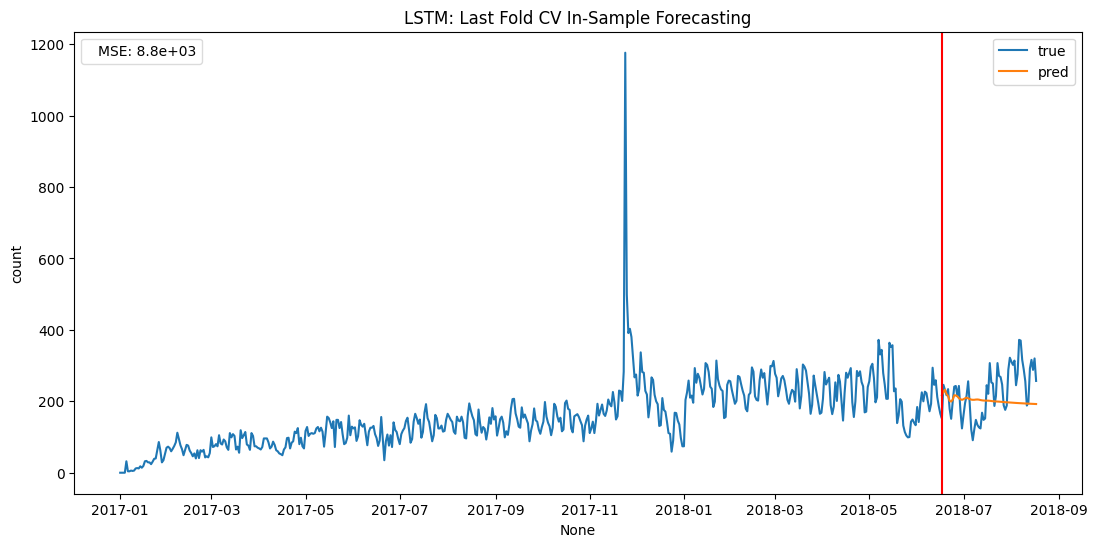

In [ ]:
title = 'LSTM'
data = history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]

    ss = StandardScaler()
    ss.fit(train.values.reshape(-1,1))
    train_input = ss.transform(train.values.reshape(-1,1))

    # First test set prediction using 7 inputs and 1 label: total 8 observations
    test_input = train_input[-(N_FEATURES+1):]
    test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

    clear_session()
    reset_random_seeds()
    model = Sequential()
    model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
    model.add(Dense(1, kernel_initializer='zeros'))

    early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
    pred = np.empty(test.shape[0])
    for i in range(len(pred)):
        prediction = model.predict(test_gen, verbose=False)
        pred[i] = prediction
        test_input = np.delete(test_input, 0, 0)
        test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title)

In [ ]:
def gscv(learning_rate):
    mse = []
    for train_id, test_id in tscv.split(data):
        train, test = data.iloc[train_id], data.iloc[test_id]

        ss = StandardScaler()
        ss.fit(train.values.reshape(-1,1))
        train_input = ss.transform(train.values.reshape(-1,1))

        # First test set prediction using 7 inputs and 1 label: total 8 observations
        test_input = train_input[-(N_FEATURES+1):]
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
        train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

        clear_session()
        reset_random_seeds()
        model = Sequential()
        model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
        model.add(Dense(1, kernel_initializer='zeros'))

        early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
        model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mae'])
        h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
        pred = np.empty(test.shape[0])
        for i in range(len(pred)):
            prediction = model.predict(test_gen, verbose=False)
            pred[i] = prediction
            test_input = np.delete(test_input, 0, 0)
            test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
            test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
        pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
        mse.append(mean_squared_error(pred, test))
    return np.mean(mse)

learning_rates = np.logspace(-3, 1, 5)
tuning = pd.DataFrame(learning_rates, columns=['learning_rate'])
tuning

learning_rate
0          0.001
1          0.010
2          0.100
3          1.000
4         10.000

In [ ]:
%%time
tuning['mse'] = tuning.apply(lambda x: gscv(x.learning_rate), axis=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-1394565907.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

CPU times: user 2min 38s, sys: 6.15 s, total: 2min 44s
Wall time: 2min 50s


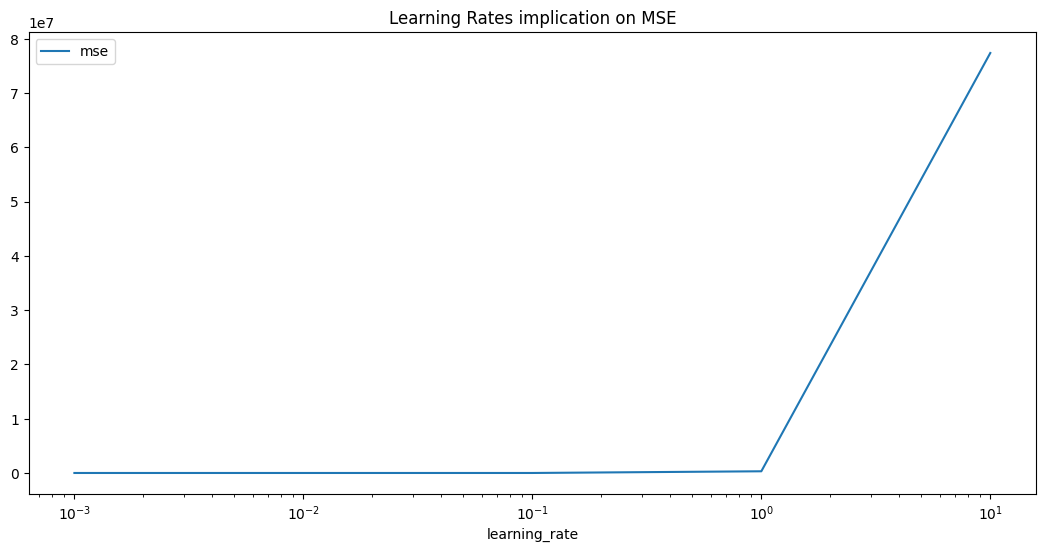

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))
ax = tuning.plot(x='learning_rate', y='mse', ax=ax)
ax.set_xscale('log')
ax.set_title('Learning Rates implication on MSE')
plt.show()

In [ ]:
tuning.query('mse == mse.min()')

learning_rate          mse
0          0.001  8758.981611

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-2863702158.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

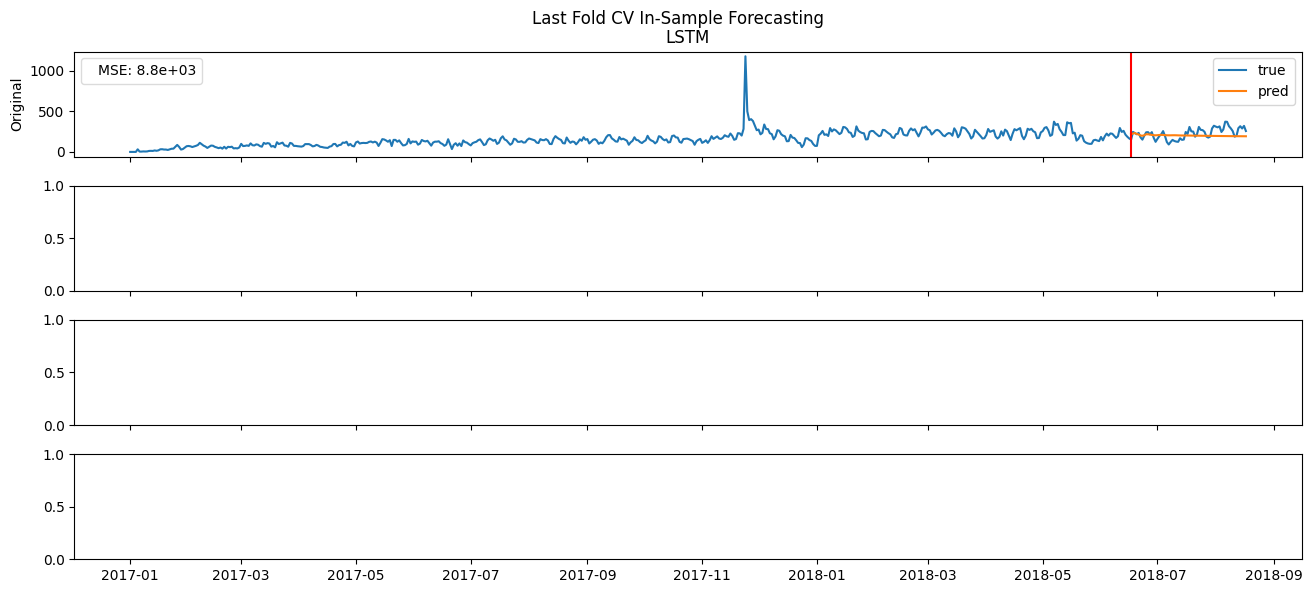

In [ ]:
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]

    ss = StandardScaler()
    ss.fit(train.values.reshape(-1,1))
    train_input = ss.transform(train.values.reshape(-1,1))

    # First test set prediction using 7 inputs and 1 label: total 8 observations
    test_input = train_input[-(N_FEATURES+1):]
    test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

    clear_session()
    reset_random_seeds()
    model = Sequential()
    model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
    model.add(Dense(1, kernel_initializer='zeros'))

    early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])
    h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
    pred = np.empty(test.shape[0])
    for i in range(len(pred)):
        prediction = model.predict(test_gen, verbose=False)
        pred[i] = prediction
        test_input = np.delete(test_input, 0, 0)
        test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[0])

In [ ]:
record(algo=title, mse=np.mean(mse))

algo           mse
0                   Time-Series Regression   8334.514194
1             Time-Series Regression + STL   8015.765220
2          Time-Series Regression + Boxcox   8361.963924
3   Time-Series Regression + Seasonal Diff   9664.568433
4                    Exponential Smoothing   7571.135916
5              Exponential Smoothing + STL   7620.672864
6           Exponential Smoothing + Boxcox   7574.385797
7    Exponential Smoothing + Seasonal Diff  15305.018516
8                               Auto ARIMA  17063.124523
9                         Auto ARIMA + STL  15493.928189
10                     Auto ARIMA + Boxcox  10255.590852
11              Auto ARIMA + Seasonal Diff   8442.516627
12                                    LSTM   8758.981611

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,157 (51.40 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,772 (34.27 KB)

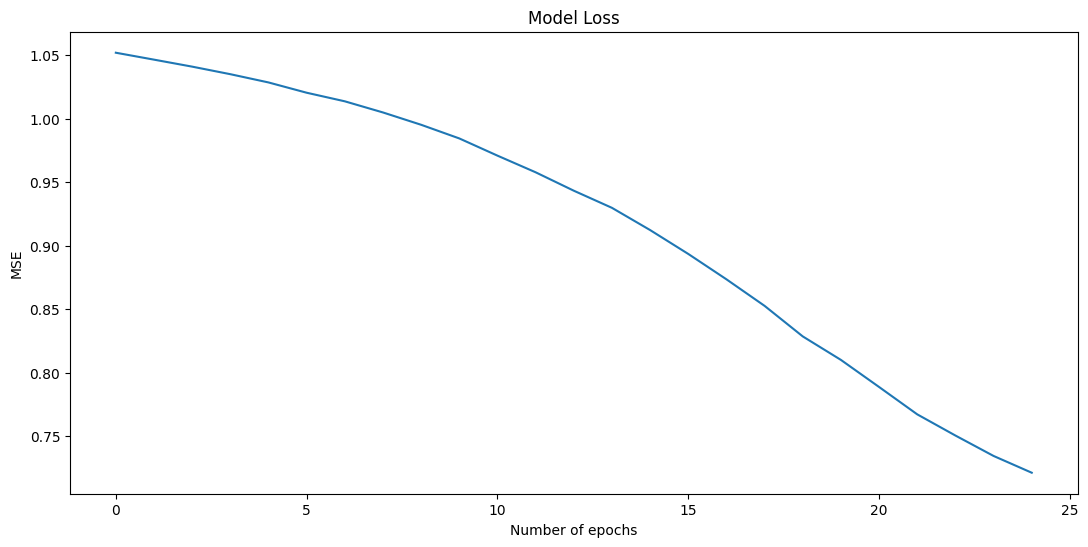

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
sns.lineplot(x=range(len(h.history['loss'])), y=h.history['loss'], ax=ax)
ax.set_xlabel('Number of epochs')
ax.set_ylabel('MSE')
ax.set_title('Model Loss')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-4271098156.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

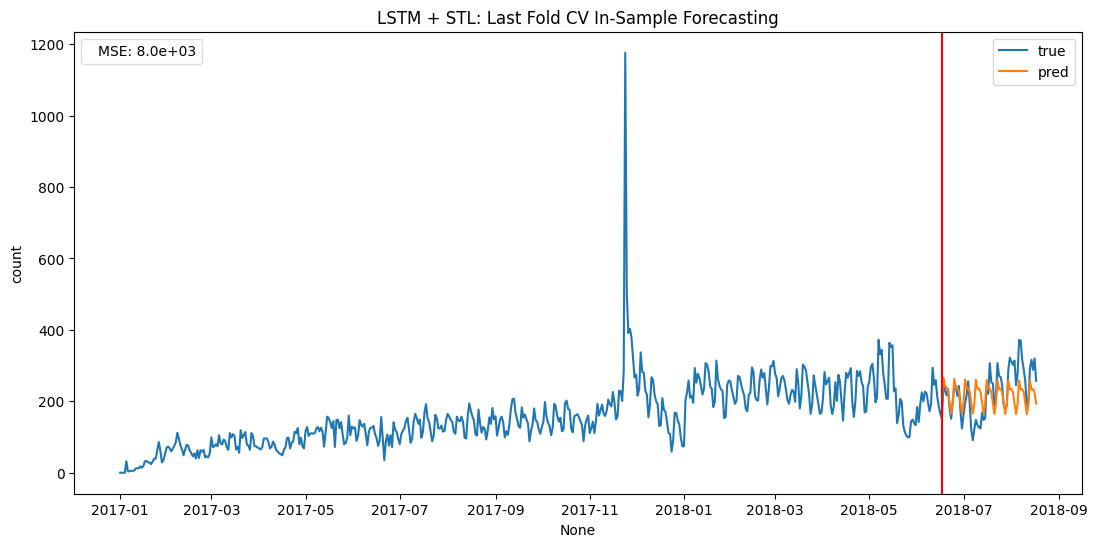

In [ ]:
title = 'LSTM + STL'
data = deseasonal.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]

    ss = StandardScaler()
    ss.fit(train.values.reshape(-1,1))
    train_input = ss.transform(train.values.reshape(-1,1))

    # First test set prediction using 7 inputs and 1 label: total 8 observations
    test_input = train_input[-(N_FEATURES+1):]
    test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

    clear_session()
    reset_random_seeds()
    model = Sequential()
    model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
    model.add(Dense(1, kernel_initializer='zeros'))

    early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
    pred = np.empty(test.shape[0])
    for i in range(len(pred)):
        prediction = model.predict(test_gen, verbose=False)
        pred[i] = prediction
        test_input = np.delete(test_input, 0, 0)
        test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
    last_seasonal = res.seasonal.reindex_like(train).tail(stl.period)
    pred = pred + np.fromiter(cycle(last_seasonal), count=pred.shape[0], dtype=float)
    test = test + res.seasonal.reindex_like(test)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title)


In [ ]:
def gscv(learning_rate):
    global deseasonal
    data = deseasonal.copy()
    mse = []
    for train_id, test_id in tscv.split(data):
        train, test = data.iloc[train_id], data.iloc[test_id]

        ss = StandardScaler()
        ss.fit(train.values.reshape(-1,1))
        train_input = ss.transform(train.values.reshape(-1,1))

        # First test set prediction using 7 inputs and 1 label: total 8 observations
        test_input = train_input[-(N_FEATURES+1):]
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
        train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

        clear_session()
        reset_random_seeds()
        model = Sequential()
        model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
        model.add(Dense(1, kernel_initializer='zeros'))

        early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
        model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mae'])
        h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
        pred = np.empty(test.shape[0])
        for i in range(len(pred)):
            prediction = model.predict(test_gen, verbose=False)
            pred[i] = prediction
            test_input = np.delete(test_input, 0, 0)
            test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
            test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
        pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
        last_seasonal = res.seasonal.reindex_like(train).tail(stl.period)
        pred = pred + np.fromiter(cycle(last_seasonal), count=pred.shape[0], dtype=float)
        test = test + res.seasonal.reindex_like(test)
        mse.append(mean_squared_error(pred, test))
    return np.mean(mse)

learning_rates = np.logspace(-3, 1, 5)
tuning = pd.DataFrame(learning_rates, columns=['learning_rate'])
tuning

learning_rate
0          0.001
1          0.010
2          0.100
3          1.000
4         10.000

In [ ]:
%%time
tuning['mse'] = tuning.apply(lambda x: gscv(x.learning_rate), axis=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-1190623199.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

CPU times: user 2min 44s, sys: 6.13 s, total: 2min 51s
Wall time: 2min 53s


In [ ]:
tuning.query('mse == mse.min()')

learning_rate          mse
0          0.001  8000.004588

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-2186902821.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

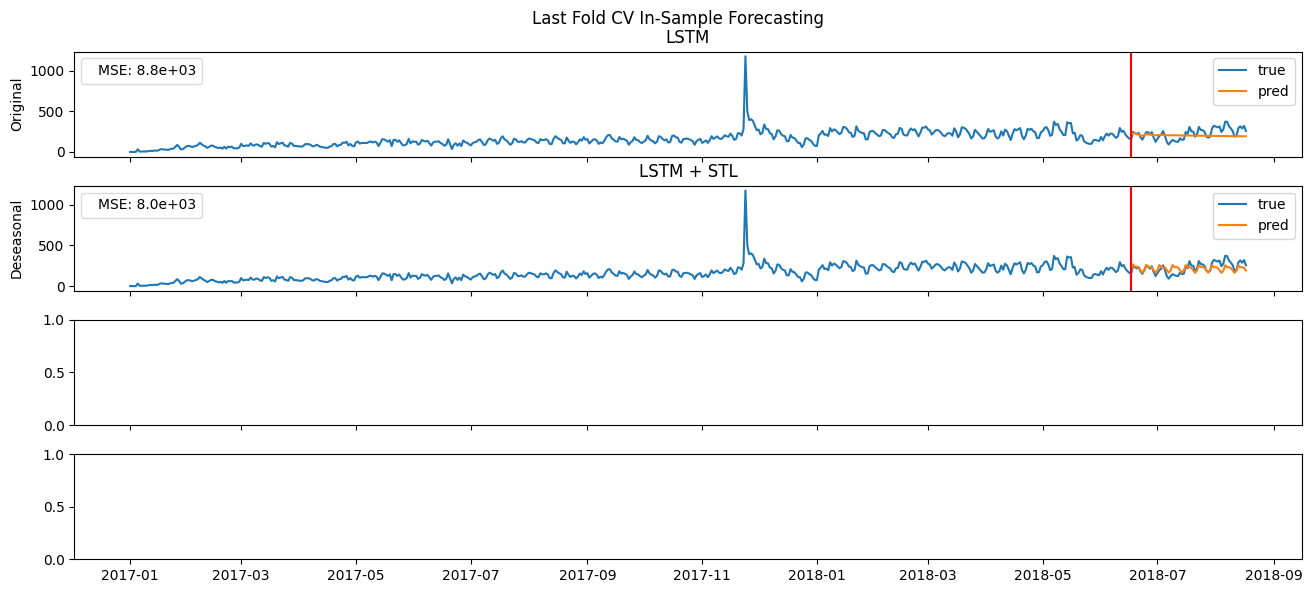

In [ ]:
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]

    ss = StandardScaler()
    ss.fit(train.values.reshape(-1,1))
    train_input = ss.transform(train.values.reshape(-1,1))

    # First test set prediction using 7 inputs and 1 label: total 8 observations
    test_input = train_input[-(N_FEATURES+1):]
    test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

    clear_session()
    tf.random.set_seed(0)
    model = Sequential()
    model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
    model.add(Dense(1, kernel_initializer='zeros'))

    early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])
    h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
    pred = np.empty(test.shape[0])
    for i in range(len(pred)):
        prediction = model.predict(test_gen, verbose=False)
        pred[i] = prediction
        test_input = np.delete(test_input, 0, 0)
        test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
    last_seasonal = res.seasonal.reindex_like(train).tail(stl.period)
    pred = pred + np.fromiter(cycle(last_seasonal), count=pred.shape[0], dtype=float)
    test = test + res.seasonal.reindex_like(test)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[1])

In [ ]:
record(algo=title, mse=np.mean(mse))

algo           mse
0                   Time-Series Regression   8334.514194
1             Time-Series Regression + STL   8015.765220
2          Time-Series Regression + Boxcox   8361.963924
3   Time-Series Regression + Seasonal Diff   9664.568433
4                    Exponential Smoothing   7571.135916
5              Exponential Smoothing + STL   7620.672864
6           Exponential Smoothing + Boxcox   7574.385797
7    Exponential Smoothing + Seasonal Diff  15305.018516
8                               Auto ARIMA  17063.124523
9                         Auto ARIMA + STL  15493.928189
10                     Auto ARIMA + Boxcox  10255.590852
11              Auto ARIMA + Seasonal Diff   8442.516627
12                                    LSTM   8758.981611
13                              LSTM + STL   8034.698043

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-3230332980.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

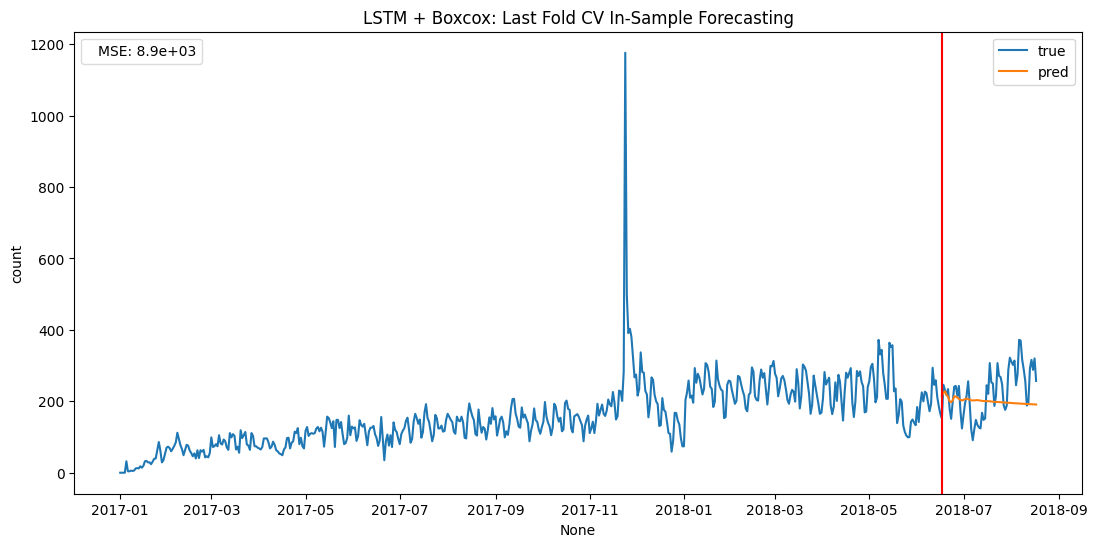

In [ ]:
title = 'LSTM + Boxcox'
data = bc_history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]

    ss = StandardScaler()
    ss.fit(train.values.reshape(-1,1))
    train_input = ss.transform(train.values.reshape(-1,1))

    # First test set prediction using 7 inputs and 1 label: total 8 observations
    test_input = train_input[-(N_FEATURES+1):]
    test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

    clear_session()
    reset_random_seeds()
    model = Sequential()
    model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
    model.add(Dense(1, kernel_initializer='zeros'))

    early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
    pred = np.empty(test.shape[0])
    for i in range(len(pred)):
        prediction = model.predict(test_gen, verbose=False)
        pred[i] = prediction
        test_input = np.delete(test_input, 0, 0)
        test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
    pred = inv_boxcox1p(pred, lmbda)
    test = inv_boxcox1p(test, lmbda)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title)


In [ ]:
def gscv(learning_rate):
    global bc_history
    data = bc_history.copy()
    mse = []
    for train_id, test_id in tscv.split(data):
        train, test = data.iloc[train_id], data.iloc[test_id]

        ss = StandardScaler()
        ss.fit(train.values.reshape(-1,1))
        train_input = ss.transform(train.values.reshape(-1,1))

        # First test set prediction using 7 inputs and 1 label: total 8 observations
        test_input = train_input[-(N_FEATURES+1):]
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
        train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

        clear_session()
        reset_random_seeds()
        model = Sequential()
        model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
        model.add(Dense(1, kernel_initializer='zeros'))

        early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
        model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mae'])
        h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
        pred = np.empty(test.shape[0])
        for i in range(len(pred)):
            prediction = model.predict(test_gen, verbose=False)
            pred[i] = prediction
            test_input = np.delete(test_input, 0, 0)
            test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
            test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
        pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
        pred = inv_boxcox1p(pred, lmbda)
        test = inv_boxcox1p(test, lmbda)
        try:
            mse.append(mean_squared_error(pred, test))
        except ValueError:
            return np.nan
    return np.mean(mse)

learning_rates = np.logspace(-3, 1, 5)
tuning = pd.DataFrame(learning_rates, columns=['learning_rate'])
tuning

learning_rate
0          0.001
1          0.010
2          0.100
3          1.000
4         10.000

In [ ]:
%%time
tuning['mse'] = tuning.apply(lambda x: gscv(x.learning_rate), axis=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-2965537835.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

CPU times: user 2min 26s, sys: 5.56 s, total: 2min 31s
Wall time: 2min 33s


In [ ]:
tuning.query('mse == mse.min()')

learning_rate          mse
0          0.001  8895.359168

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-2195584912.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

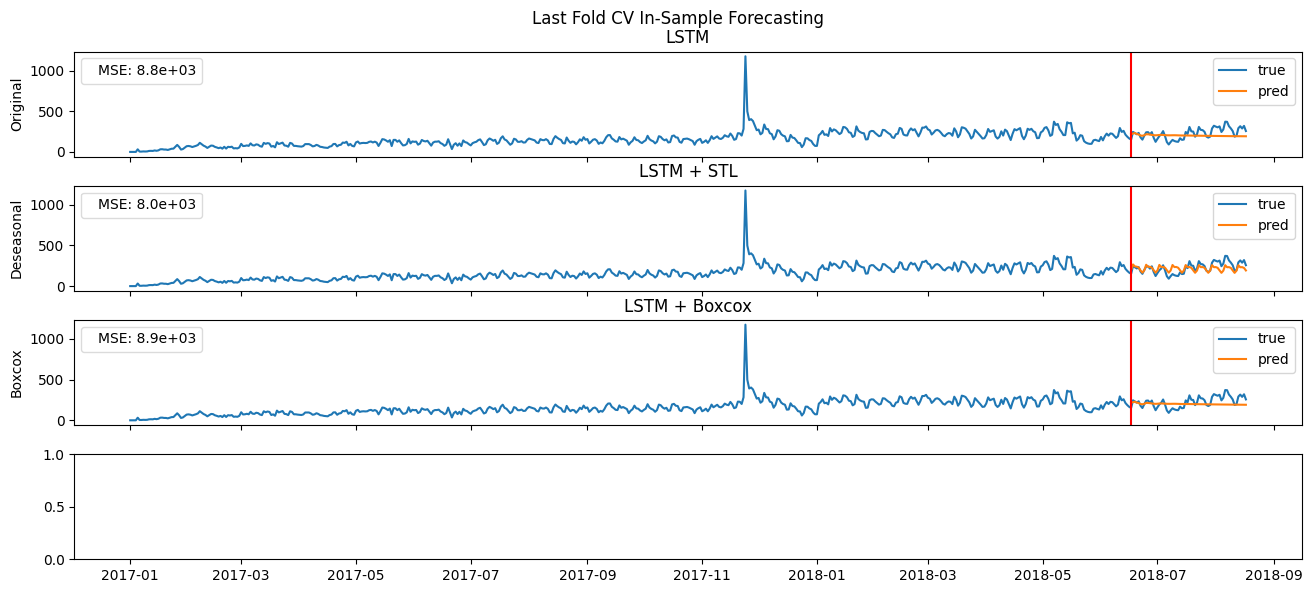

In [ ]:
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]

    ss = StandardScaler()
    ss.fit(train.values.reshape(-1,1))
    train_input = ss.transform(train.values.reshape(-1,1))

    # First test set prediction using 7 inputs and 1 label: total 8 observations
    test_input = train_input[-(N_FEATURES+1):]
    test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

    clear_session()
    reset_random_seeds()
    model = Sequential()
    model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
    model.add(Dense(1, kernel_initializer='zeros'))

    early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])
    h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
    pred = np.empty(test.shape[0])
    for i in range(len(pred)):
        prediction = model.predict(test_gen, verbose=False)
        pred[i] = prediction
        test_input = np.delete(test_input, 0, 0)
        test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
    pred = inv_boxcox1p(pred, lmbda)
    test = inv_boxcox1p(test, lmbda)
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[2])

In [ ]:
record(algo=title, mse=np.mean(mse))

algo           mse
0                   Time-Series Regression   8334.514194
1             Time-Series Regression + STL   8015.765220
2          Time-Series Regression + Boxcox   8361.963924
3   Time-Series Regression + Seasonal Diff   9664.568433
4                    Exponential Smoothing   7571.135916
5              Exponential Smoothing + STL   7620.672864
6           Exponential Smoothing + Boxcox   7574.385797
7    Exponential Smoothing + Seasonal Diff  15305.018516
8                               Auto ARIMA  17063.124523
9                         Auto ARIMA + STL  15493.928189
10                     Auto ARIMA + Boxcox  10255.590852
11              Auto ARIMA + Seasonal Diff   8442.516627
12                                    LSTM   8758.981611
13                              LSTM + STL   8034.698043
14                           LSTM + Boxcox   8895.359168

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-2269159795.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

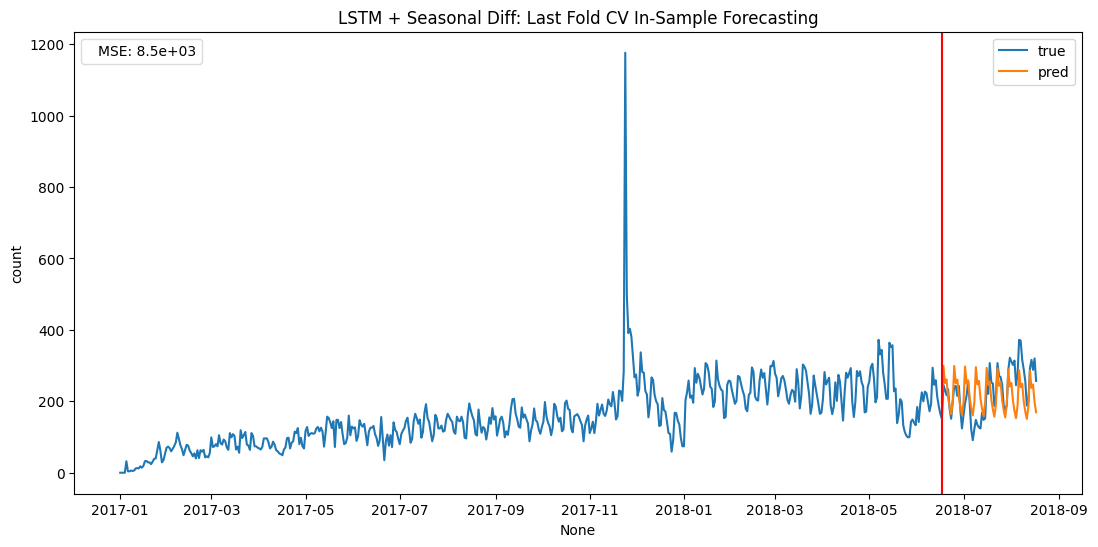

In [ ]:
title = 'LSTM + Seasonal Diff'
data = diff_history.copy()
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]

    ss = StandardScaler()
    ss.fit(train.values.reshape(-1,1))
    train_input = ss.transform(train.values.reshape(-1,1))

    # First test set prediction using 7 inputs and 1 label: total 8 observations
    test_input = train_input[-(N_FEATURES+1):]
    test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

    clear_session()
    reset_random_seeds()
    model = Sequential()
    model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
    model.add(Dense(1, kernel_initializer='zeros'))

    early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
    pred = np.empty(test.shape[0])
    for i in range(len(pred)):
        prediction = model.predict(test_gen, verbose=False)
        pred[i] = prediction
        test_input = np.delete(test_input, 0, 0)
        test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
    xi = history.reindex_like(train).tail(N_FEATURES)
    pred = diff_inv_fix(pred, xi).iloc[N_FEATURES:]
    test = diff_inv_fix(test, xi).iloc[N_FEATURES:]
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title)

In [ ]:
def gscv(learning_rate):
    global diff_history
    data = diff_history.copy()
    mse = []
    for train_id, test_id in tscv.split(data):
        train, test = data.iloc[train_id], data.iloc[test_id]

        ss = StandardScaler()
        ss.fit(train.values.reshape(-1,1))
        train_input = ss.transform(train.values.reshape(-1,1))

        # First test set prediction using 7 inputs and 1 label: total 8 observations
        test_input = train_input[-(N_FEATURES+1):]
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
        train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

        clear_session()
        reset_random_seeds()
        model = Sequential()
        model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
        model.add(Dense(1, kernel_initializer='zeros'))

        early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
        model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mae'])
        h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
        pred = np.empty(test.shape[0])
        for i in range(len(pred)):
            prediction = model.predict(test_gen, verbose=False)
            pred[i] = prediction
            test_input = np.delete(test_input, 0, 0)
            test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
            test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
        pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
        xi = history.reindex_like(train).tail(N_FEATURES)
        pred = diff_inv_fix(pred, xi).iloc[N_FEATURES:]
        test = diff_inv_fix(test, xi).iloc[N_FEATURES:]
        mse.append(mean_squared_error(pred, test))
    return np.mean(mse)

learning_rates = np.logspace(-3, 1, 5)
tuning = pd.DataFrame(learning_rates, columns=['learning_rate'])
tuning

learning_rate
0          0.001
1          0.010
2          0.100
3          1.000
4         10.000

In [ ]:
%%time
tuning['mse'] = tuning.apply(lambda x: gscv(x.learning_rate), axis=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-2111075799.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

CPU times: user 3min 1s, sys: 6.42 s, total: 3min 7s
Wall time: 3min 10s


In [ ]:
tuning.query('mse == mse.min()')

learning_rate          mse
0          0.001  8474.840709

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/tmp/ipython-input-4020392772.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = prediction
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/

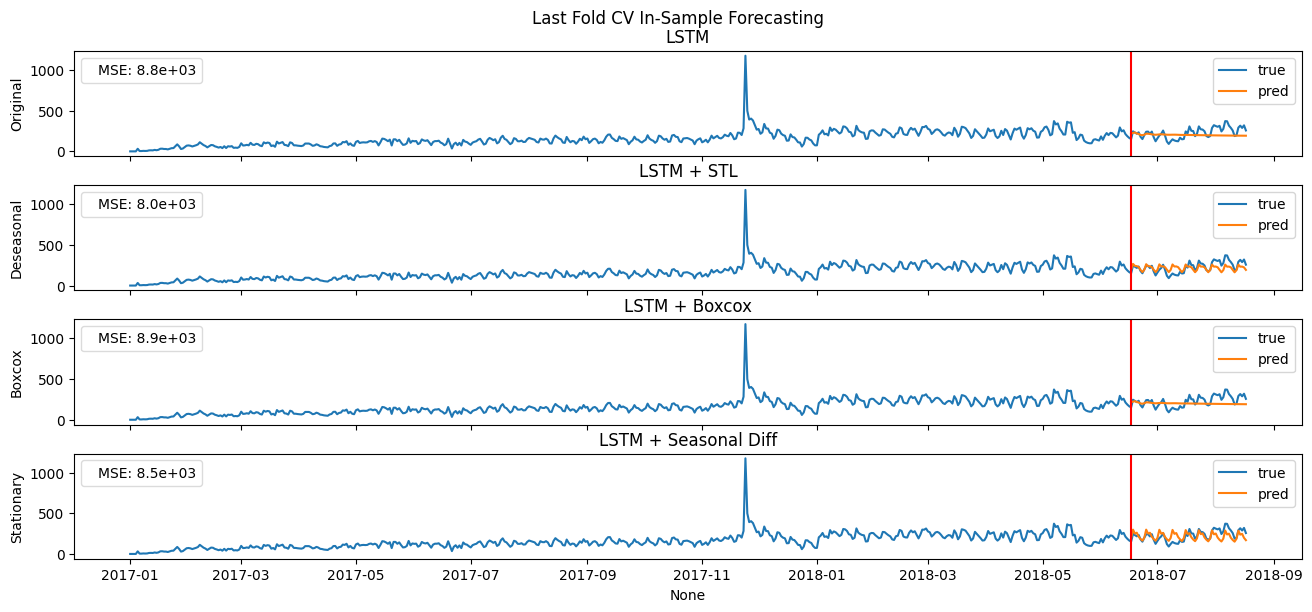

In [ ]:
mse = []
for train_id, test_id in tscv.split(data):
    train, test = data.iloc[train_id], data.iloc[test_id]

    ss = StandardScaler()
    ss.fit(train.values.reshape(-1,1))
    train_input = ss.transform(train.values.reshape(-1,1))

    # First test set prediction using 7 inputs and 1 label: total 8 observations
    test_input = train_input[-(N_FEATURES+1):]
    test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    train_gen = TimeseriesGenerator(train_input, train_input, length=N_FEATURES, batch_size=30)

    clear_session()
    reset_random_seeds()
    model = Sequential()
    model.add(LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False))
    model.add(Dense(1, kernel_initializer='zeros'))

    early_stopping = EarlyStopping(monitor='loss', patience=2, mode='min')
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])
    h = model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[early_stopping], verbose=False)
    pred = np.empty(test.shape[0])
    for i in range(len(pred)):
        prediction = model.predict(test_gen, verbose=False)
        pred[i] = prediction
        test_input = np.delete(test_input, 0, 0)
        test_input = np.concatenate((test_input, np.array(prediction).reshape(-1,1)), axis=0)
        test_gen = TimeseriesGenerator(test_input, test_input, length=N_FEATURES, batch_size=30)
    pred = ss.inverse_transform(pred.reshape(-1,1)).reshape(-1)
    xi = history.reindex_like(train).tail(N_FEATURES)
    pred = diff_inv_fix(pred, xi).iloc[N_FEATURES:]
    test = diff_inv_fix(test, xi).iloc[N_FEATURES:]
    mse.append(mean_squared_error(pred, test))
plot(test.index, pred, mse, title, figs, axs[3])

In [ ]:
record(algo=title, mse=np.mean(mse))

algo           mse
0                   Time-Series Regression   8334.514194
1             Time-Series Regression + STL   8015.765220
2          Time-Series Regression + Boxcox   8361.963924
3   Time-Series Regression + Seasonal Diff   9664.568433
4                    Exponential Smoothing   7571.135916
5              Exponential Smoothing + STL   7620.672864
6           Exponential Smoothing + Boxcox   7574.385797
7    Exponential Smoothing + Seasonal Diff  15305.018516
8                               Auto ARIMA  17063.124523
9                         Auto ARIMA + STL  15493.928189
10                     Auto ARIMA + Boxcox  10255.590852
11              Auto ARIMA + Seasonal Diff   8442.516627
12                                    LSTM   8758.981611
13                              LSTM + STL   8034.698043
14                           LSTM + Boxcox   8895.359168
15                    LSTM + Seasonal Diff   8474.840709

In [ ]:
result = (
    result
    .assign(cat=lambda x: x.algo.apply(lambda s: re.sub(r'([^(\s\+)]+)\s\+.+', r'\g<1>', s)))
    .sort_values('mse')
)

In [ ]:
result.nsmallest(5, 'mse')

algo          mse                     cat
4            Exponential Smoothing  7571.135916   Exponential Smoothing
6   Exponential Smoothing + Boxcox  7574.385797   Exponential Smoothing
5      Exponential Smoothing + STL  7620.672864   Exponential Smoothing
1     Time-Series Regression + STL  8015.765220  Time-Series Regression
13                      LSTM + STL  8034.698043                    LSTM

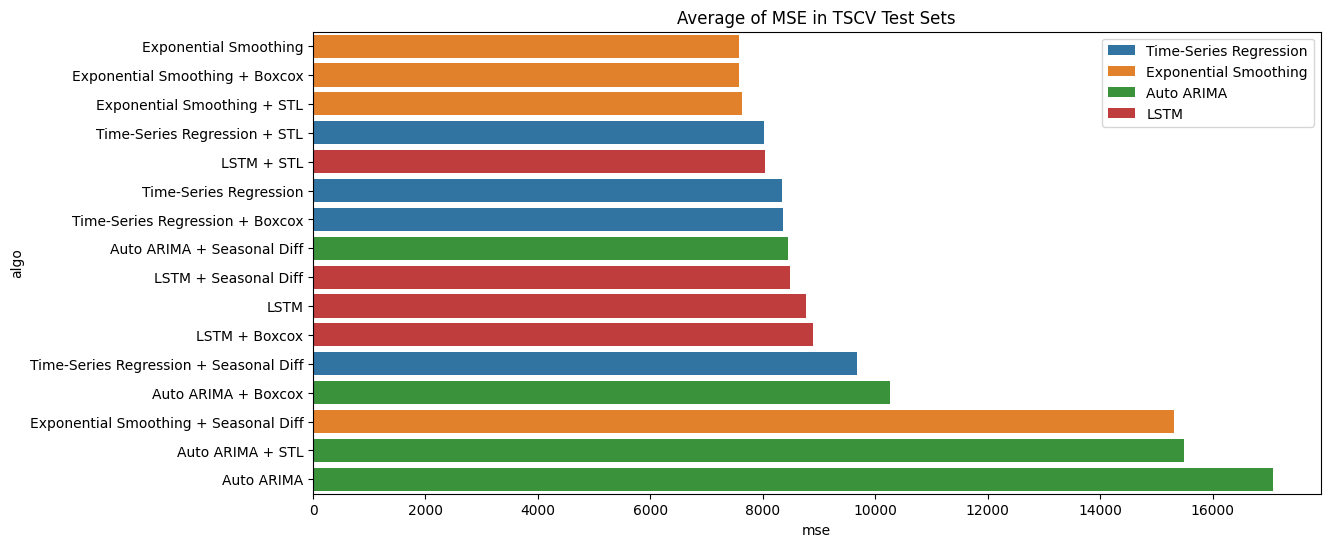

In [ ]:
hue_order = ['Time-Series Regression', 'Exponential Smoothing', 'Auto ARIMA', 'LSTM']
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(data=result, x='mse', y='algo', hue='cat', hue_order=hue_order, orient='h', ax=ax, dodge=False)
ax.set_title('Average of MSE in TSCV Test Sets')
ax.legend().set_title(None)
plt.show()

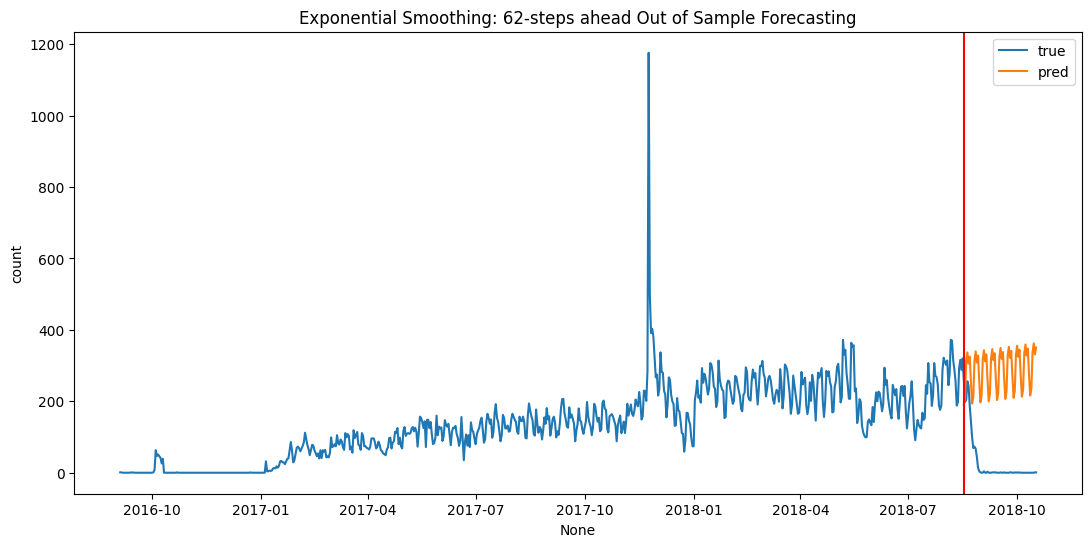

In [ ]:
ES = (
    ExponentialSmoothing(history, trend='add', seasonal='add', seasonal_periods=7)
    .fit(smoothing_level=0.2, smoothing_trend=0, smoothing_seasonal=0.8, method='ls')
)
pred = ES.forecast(pred_period.shape[0])

fig, ax = plt.subplots(figsize=(13,6))
sns.lineplot(x=full_history.index, y=full_history, label='true')
sns.lineplot(x=pred_period, y=pred, label='pred')
ax.axvline(x=pred_period[0], color='red')
ax.set_title('Exponential Smoothing: 62-steps ahead Out of Sample Forecasting')
plt.show()

# New Section

In [15]:
%%capture
!pip install -U pip setuptools wheel cython
!pip install "numpy<2.0" "pandas<2.2" "scipy<1.13" "scikit-learn<1.4" "statsmodels<0.15"
!pip install "pmdarima==2.0.4"

# restart kernel agar C-extensions match header NumPy yg baru dipasang
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [1]:
import os, re, random, warnings
from itertools import cycle
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap


from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.forecasting.stl import STLForecast


import pmdarima as pm


import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


np.random.seed(1234)
random.seed(1234)
tf.random.set_seed(1234)


plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["axes.grid"] = True

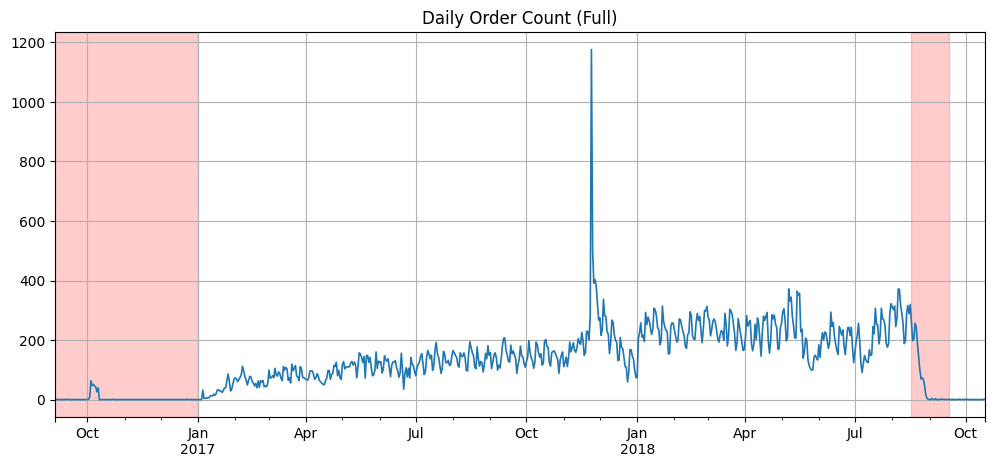

In [50]:
assert "orders" in globals(), "Please define a DataFrame `orders` with column `order_purchase_timestamp`."


full_history = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce').dt.floor('D')
full_history = (
full_history.value_counts().sort_index()
)
# reindex to all days
idx = pd.date_range(full_history.index.min(), full_history.index.max(), freq='D')
full_history = full_history.reindex(idx, fill_value=0).rename("y")


# Optional: cut periods with known anomalies (example windows)
anom_1 = (pd.Timestamp('2016-09-01'), pd.Timestamp('2017-01-01'))
anom_2 = (pd.Timestamp('2018-08-17'), pd.Timestamp('2018-09-17'))


history = full_history[(full_history.index >= anom_1[1]) & (full_history.index < anom_2[0])].copy()
pred_period = pd.date_range(anom_2[0], anom_2[1], freq='D')


fig, ax = plt.subplots()
full_history.plot(ax=ax, lw=1.2)
ax.axvspan(anom_1[0], anom_1[1], color='red', alpha=0.2)
ax.axvspan(anom_2[0], anom_2[1], color='red', alpha=0.2)
ax.set_title('Daily Order Count (Full)')
plt.show()

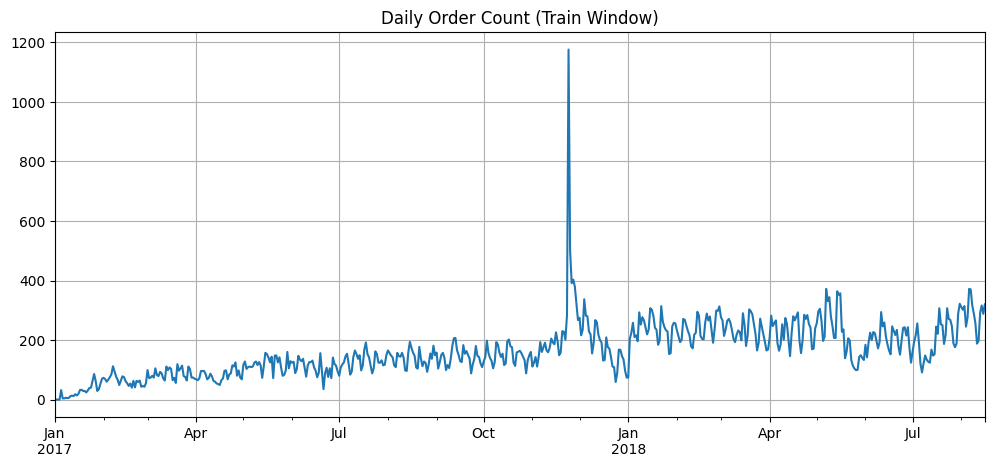

In [16]:
fig, ax = plt.subplots()
history.plot(ax=ax, lw=1.5)
ax.set_title('Daily Order Count (Train Window)')
plt.show()

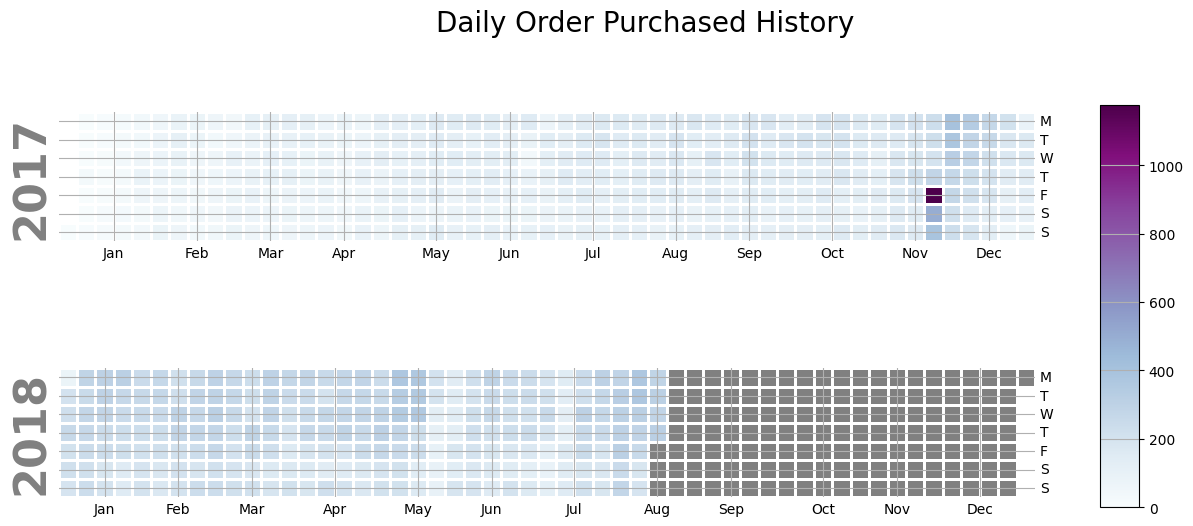

In [18]:
fig, caxs = calmap.calendarplot(history, daylabels='MTWTFSS', fillcolor='grey', cmap='BuPu', fig_kws=dict(figsize=(13, 6)))
fig.suptitle('Daily Order Purchased History', fontsize=20)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.67])
fig.colorbar(caxs[0].get_children()[1], cax=cbar_ax)

plt.show()

In [22]:
H = 7 # horizon per fold (7-day ahead)
N_SPLITS = 5
tscv = TimeSeriesSplit(n_splits=N_SPLITS, test_size=H)

In [26]:
def smape(y_true, y_pred):
  denom = (np.abs(y_true) + np.abs(y_pred))
  return 100*np.mean(2*np.abs(y_pred - y_true) / np.where(denom==0, 1, denom))

def make_lags(y: pd.Series, L: int = 7) -> pd.DataFrame:
  X = np.column_stack([y.shift(i) for i in range(1, L+1)])
  return pd.DataFrame(X, index=y.index, columns=[f"lag{i}" for i in range(1, L+1)])

def eval_metrics(y_true, y_pred):
  return dict(
  MAE=float(mean_absolute_error(y_true, y_pred)),
  RMSE=float(mean_squared_error(y_true, y_pred, squared=False)),
  sMAPE=float(smape(y_true, y_pred)),
)

In [28]:
results = []

# Naive (last value)
ms = []
for tr_idx, te_idx in tscv.split(history):
   y_tr, y_te = history.iloc[tr_idx], history.iloc[te_idx]
   yhat = pd.Series(y_tr.iloc[-1], index=y_te.index)
   ms.append(eval_metrics(y_te, yhat))

avg = {k: np.mean([d[k] for d in ms]) for k in ms[0].keys()}
results.append(dict(Model='Naive', **avg))

# SeasonalNaive (last value from 7 days ago)
ms = []
for tr_idx, te_idx in tscv.split(history):
   y_tr, y_te = history.iloc[tr_idx], history.iloc[te_idx]
   yhat = y_tr.shift(7).reindex(y_te.index)
# if shift creates NaN at start, fill with last known
   yhat = yhat.fillna(y_tr.iloc[-1])
   ms.append(eval_metrics(y_te, yhat))

avg = {k: np.mean([d[k] for d in ms]) for k in ms[0].keys()}
results.append(dict(Model='SeasonalNaive', **avg))

In [29]:
#  Autoregression (Ridge) — simple & strong baseline

ms = []
L = 7
X = make_lags(history, L=L).dropna()
y2 = history.loc[X.index]

for tr_idx, te_idx in tscv.split(X):
    X_tr, X_te = X.iloc[tr_idx], X.iloc[te_idx]
    y_tr, y_te = y2.iloc[tr_idx], y2.iloc[te_idx]

model = Ridge(alpha=1.0)
model.fit(X_tr, y_tr)
yhat = pd.Series(model.predict(X_te), index=y_te.index)
ms.append(eval_metrics(y_te, yhat))

avg = {k: np.mean([d[k] for d in ms]) for k in ms[0].keys()}
results.append(dict(Model='Ridge-AR(L=7)', **avg))

In [30]:
# Holt-Winters
ms = []
for tr_idx, te_idx in tscv.split(history):
    y_tr, y_te = history.iloc[tr_idx], history.iloc[te_idx]
    hw = ExponentialSmoothing(y_tr, trend='add', seasonal='add', seasonal_periods=7).fit(method='ls')
    yhat = hw.forecast(len(y_te))
    ms.append(eval_metrics(y_te, yhat))

avg = {k: np.mean([d[k] for d in ms]) for k in ms[0].keys()}
results.append(dict(Model='HW(add,add,7)', **avg))

# STLForecast + HW
ms = []
for tr_idx, te_idx in tscv.split(history):
    y_tr, y_te = history.iloc[tr_idx], history.iloc[te_idx]
    stlf = STLForecast(y_tr, ExponentialSmoothing, model_kwargs=dict(trend='add', seasonal='add', seasonal_periods=7))
    res = stlf.fit()
    yhat = res.forecast(len(y_te))
    ms.append(eval_metrics(y_te, yhat))

avg = {k: np.mean([d[k] for d in ms]) for k in ms[0].keys()}
results.append(dict(Model='STLForecast+HW(7)', **avg))

In [31]:
# # 7) Auto-ARIMA (pmdarima)

ms = []
for tr_idx, te_idx in tscv.split(history):
    y_tr, y_te = history.iloc[tr_idx], history.iloc[te_idx]
    model = pm.auto_arima(
    y_tr,
    seasonal=True, m=7,
    stepwise=True,
    suppress_warnings=True,
    error_action="ignore",
)
yhat = pd.Series(model.predict(n_periods=len(y_te)), index=y_te.index)
ms.append(eval_metrics(y_te, yhat))


avg = {k: np.mean([d[k] for d in ms]) for k in ms[0].keys()}
results.append(dict(Model='AutoARIMA(m=7)', **avg))

In [40]:
# 8) LSTM (univariate) — leakage-safe, per fold scaling
MAX_EPOCHS = 25
N_FEATURES = 7
BATCH = 32

ms = []
for tr_idx, te_idx in tscv.split(history):
    y_tr, y_te = history.iloc[tr_idx], history.iloc[te_idx]

    # scale on train only
    ss = StandardScaler().fit(y_tr.values.reshape(-1, 1))
    y_tr_s = ss.transform(y_tr.values.reshape(-1, 1))

    train_gen = TimeseriesGenerator(y_tr_s, y_tr_s, length=N_FEATURES, batch_size=BATCH)

    tf.keras.backend.clear_session()
    tf.random.set_seed(1234)

    model = Sequential([
        LSTM(32, input_shape=(N_FEATURES, 1), return_sequences=False),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=1e-3), metrics=['mae'])
    es = EarlyStopping(monitor='loss', patience=2, mode='min', restore_best_weights=True)
    model.fit(train_gen, epochs=MAX_EPOCHS, callbacks=[es], verbose=0)

    # recursive forecast H steps ahead
    last_win = y_tr_s[-N_FEATURES:].copy()
    preds = []
    for _ in range(len(y_te)):
        x_in = last_win.reshape(1, N_FEATURES, 1)
        yhat_s = model.predict(x_in, verbose=0)[0, 0]
        last_win = np.append(last_win[1:], yhat_s)
        preds.append(yhat_s)

    # inverse transform back to original scale
    yhat = ss.inverse_transform(np.array(preds).reshape(-1, 1)).ravel()
    yhat = pd.Series(yhat, index=y_te.index)

    ms.append(eval_metrics(y_te, yhat))

# average metrics across folds
avg = {k: np.mean([d[k] for d in ms]) for k in ms[0].keys()}
results.append(dict(Model='LSTM(32,win=7)', **avg))

               Model        MAE       RMSE      sMAPE
0     AutoARIMA(m=7)  27.166689  33.910159  10.428249
1      Ridge-AR(L=7)  35.894158  40.755486  14.144156
2      HW(add,add,7)  41.346912  47.008183  19.685151
3  STLForecast+HW(7)  53.172686  57.055819  27.511842
4              Naive  51.342857  60.599958  22.669481
5      SeasonalNaive  51.342857  60.599958  22.669481
6     LSTM(32,win=7)  53.373221  63.340113  23.012465


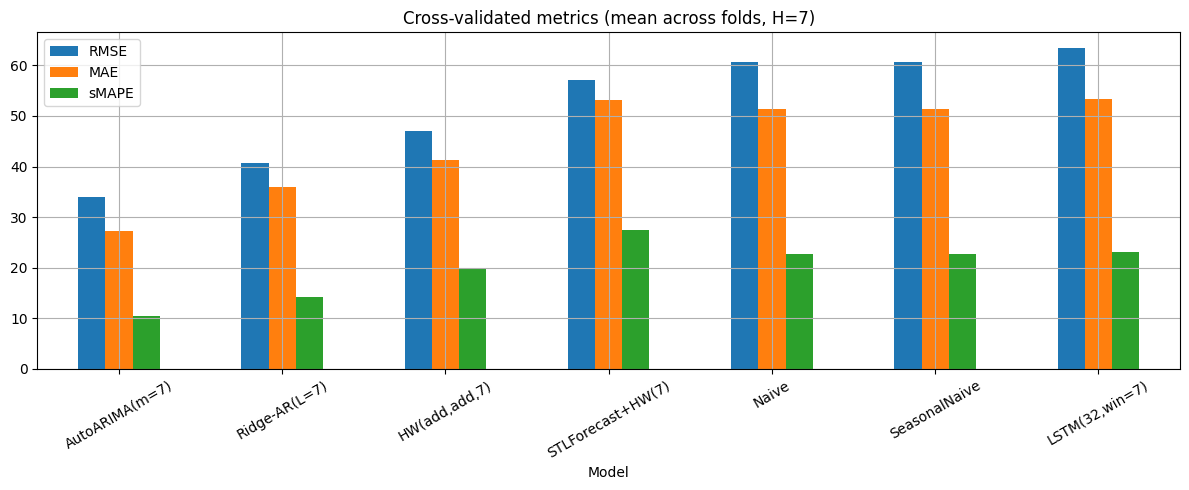

In [41]:
#9) Summary Table & Chart

res_df = pd.DataFrame(results)
res_df = res_df[["Model", "MAE", "RMSE", "sMAPE"]].sort_values("RMSE").reset_index(drop=True)
print(res_df)

ax = res_df.plot(x='Model', y=['RMSE','MAE','sMAPE'], kind='bar', rot=30)
ax.set_title('Cross-validated metrics (mean across folds, H=7)')
plt.tight_layout()
plt.show()

Best by RMSE: AutoARIMA(m=7)


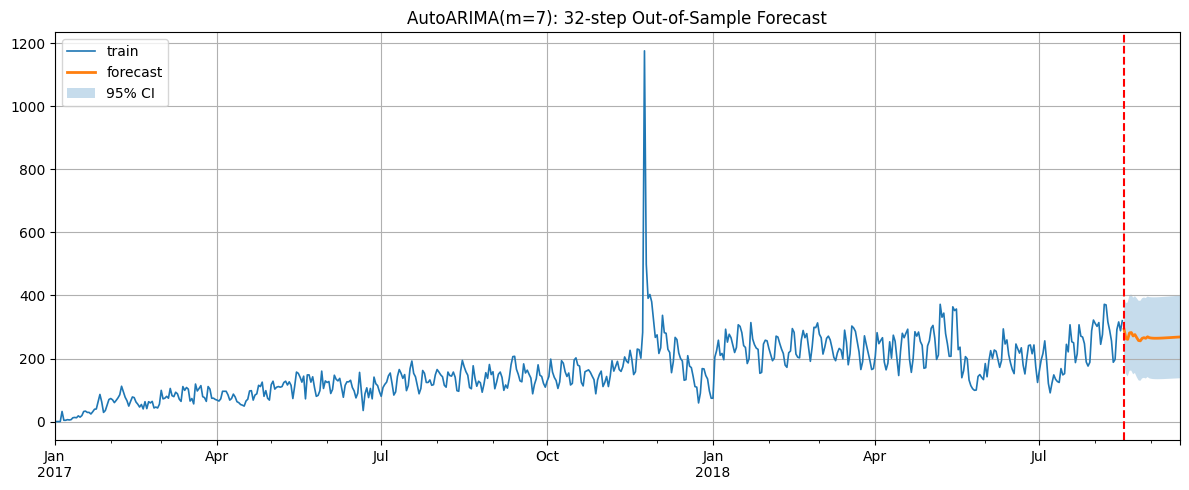

In [52]:
# Example: choose model name by metric
best_by_rmse = res_df.sort_values('RMSE').iloc[0]['Model']
print(f"Best by RMSE: {best_by_rmse}")

ci_low = ci_high = None  # default (hanya AutoARIMA yang punya CI di bawah)

if best_by_rmse.startswith('HW'):
    final_model = ExponentialSmoothing(history, trend='add', seasonal='add', seasonal_periods=7).fit(method='ls')
    fc = final_model.forecast(len(pred_period))
    fc = pd.Series(np.asarray(fc), index=pred_period)

elif best_by_rmse.startswith('STLForecast'):
    stlf = STLForecast(history, ExponentialSmoothing,
                       model_kwargs=dict(trend='add', seasonal='add', seasonal_periods=7))
    final_model = stlf.fit()
    fc = final_model.forecast(len(pred_period))
    fc = pd.Series(np.asarray(fc), index=pred_period)

elif best_by_rmse.startswith('AutoARIMA'):
    final_model = pm.auto_arima(history, seasonal=True, m=7, stepwise=True,
                                suppress_warnings=True, error_action='ignore')
    # ===== forecast + 95% CI =====
    yhat, ci = final_model.predict(n_periods=len(pred_period), return_conf_int=True, alpha=0.05)
    fc = pd.Series(yhat, index=pred_period)
    ci_low  = pd.Series(ci[:, 0], index=pred_period)
    ci_high = pd.Series(ci[:, 1], index=pred_period)

elif best_by_rmse.startswith('Ridge-AR'):
    # Simple re-fit Ridge-AR and roll forward for H=len(pred_period)
    L = 7
    X = make_lags(history, L=L).dropna()
    y2 = history.loc[X.index]
    mdl = Ridge(alpha=1.0).fit(X, y2)

    # recursive forecast
    win = history.iloc[-L:].values.astype(float)  # last L actual values
    preds = []
    for _ in range(len(pred_period)):
        # features order: [lag1, lag2, ..., lagL] == [y_{t-1}, ..., y_{t-L}]
        x = np.array([win[-i] for i in range(1, L + 1)])
        yhat = mdl.predict(x.reshape(1, -1))[0]
        preds.append(yhat)
        win = np.append(win[1:], yhat)
    fc = pd.Series(preds, index=pred_period)

elif best_by_rmse.startswith('LSTM'):
    # Refit LSTM on full history
    ss = StandardScaler().fit(history.values.reshape(-1, 1))
    y_s = ss.transform(history.values.reshape(-1, 1))
    gen = TimeseriesGenerator(y_s, y_s, length=N_FEATURES, batch_size=BATCH)

    tf.keras.backend.clear_session()
    model = Sequential([LSTM(32, input_shape=(N_FEATURES, 1)), Dense(1)])
    model.compile(loss='mse', optimizer=Adam(1e-3))
    model.fit(gen, epochs=MAX_EPOCHS, verbose=0)

    # recursive forecast
    win = y_s[-N_FEATURES:].copy()
    preds = []
    for _ in range(len(pred_period)):
        x_in = win.reshape(1, N_FEATURES, 1)
        yhat_s = model.predict(x_in, verbose=0)[0, 0]
        win = np.append(win[1:], yhat_s)
        preds.append(yhat_s)
    fc = pd.Series(ss.inverse_transform(np.array(preds).reshape(-1, 1)).ravel(), index=pred_period)

else:
    raise ValueError("Unknown best model parser. Adjust selection logic.")

# ===== Plot (akan isi band CI kalau tersedia) =====
fig, ax = plt.subplots()
history.plot(ax=ax, label='train', lw=1.2)
fc.plot(ax=ax, label='forecast', lw=2)

if ci_low is not None and ci_high is not None:
    ax.fill_between(fc.index, ci_low.values, ci_high.values, alpha=0.25, label='95% CI')

ax.axvline(pred_period[0], color='red', ls='--')
ax.set_title(f'{best_by_rmse}: {len(pred_period)}-step Out-of-Sample Forecast')
ax.legend()
plt.tight_layout()
plt.show()
